## Mars Photogrammetry Preprocessing Pipeline

By Christian Tate, Cornell University; Ithaca, NY



In [1]:
# Import python modules

import numpy as np
import cv2, glob, time, os
import matplotlib.pyplot as plt
# from planetaryimage import PDS3Image
# import colour_demosaicing
# from PIL import Image
# import matplotlib.cm as cm
# from scipy import interpolate
# from scipy.spatial.transform import Rotation as R
# import colour_demosaicing
# import pandas as pd

%run MPPP.py

%matplotlib inline

In [16]:
# Set input path to IMG files and search criteria


# Set output directory
directory_output = 'Z:/Mastcam-Z/agisoft/images'

# Set input directory
directory_input  = 'Z:/Mastcam-Z/agisoft/data'

sol = 7

pre = 'Z*0_0'+str(sol)+'*_07'
suf = 'refs_'+str(sol).zfill(3)+'_zcam'

# pre = '*F_0'+str(sol)+'*_07'
# suf = 'refs_'+str(sol).zfill(3)+'_ecam'

# suf = 'refs_test'

sequ_id = ''

path_input      = directory_input
IMG_paths = [] 
if 'F_0' in pre or 'V0' in pre: 
    IMG_paths += sorted( glob.glob(  directory_input + '/datadrive/*/ids/rdr/*/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
    IMG_paths += sorted( glob.glob(  directory_input + '/datadrive/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 
if 'Z' in pre: 
    IMG_paths += sorted( glob.glob(  directory_input + '/zcam/sol_0*00s/' +pre+'*_N*'+sequ_id+'*.IMG' ) ) 

IMG_paths = IMG_paths

print( len(IMG_paths), 'images\n')
IMG_paths

7807 images



['Z:/Mastcam-Z/agisoft/data/zcam\\sol_0700s\\ZL0_0700_0729082888_303RAD_N0330262ZCAM08698_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0700s\\ZL0_0700_0729082952_364RAD_N0330262ZCAM03538_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0700s\\ZL0_0700_0729083334_081RAD_N0330262ZCAM03014_048085A01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0700s\\ZL0_0700_0729093730_894RAD_N0330366ZCAM08699_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0700s\\ZL0_0700_0729093868_894RAD_N0330366ZCAM08699_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0700s\\ZL0_0700_0729093893_894RAD_N0330366ZCAM08699_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0700s\\ZL0_0700_0729093909_894RAD_N0330366ZCAM08699_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0700s\\ZL0_0700_0729093942_894RAD_N0330366ZCAM08699_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0700s\\ZL0_0700_0729093958_894RAD_N0330366ZCAM08699_1100LMA01.IMG',
 'Z:/Mastcam-Z/agisoft/data/zcam\\sol_0700s\\Z

In [12]:
# # # remove dupicates in image set

# names = [ IMG_paths[i][:-5] for i in range(len(IMG_paths)) ]
# duplicates = list( set(  [ names[i] for i, x in enumerate(names) if i != names.index(x)] ))
# print( len( duplicates ))
# for i in range( len( duplicates) ):
#     all_i_paths = sorted( glob.glob( duplicates[i] +'*.IMG'))[::-1]
#     duplicates_i_paths = all_i_paths[1:]
#     print( '\nkeeping  ', os.path.basename( all_i_paths[0] ) )
#     for j in range(len( duplicates_i_paths )):
#         print( 'removing ', os.path.basename( duplicates_i_paths[j] ) )
# #         os.remove( duplicates_i_paths[j] )

7807 images

0 ZL0_0700_0729082888_303RAD_N0330262ZCAM08698_1100LMA01.IMG
sol 700 site 33 drive 262  zenith angle 5410 scale 0.90
 0 ZL0_0700_0729082888_303RAD_N0330262ZCAM08698_1100LMA01.png	-2375.4972	790.7565	40.6345	-38.93	94.41	0


1 ZL0_0700_0729082952_364RAD_N0330262ZCAM03538_1100LMA01.IMG
sol 700 site 33 drive 262  zenith angle 5183 scale 0.90
 1 ZL0_0700_0729082952_364RAD_N0330262ZCAM03538_1100LMA01.png	-2375.5003	790.7609	40.6333	-37.87	90.45	0


2 ZL0_0700_0729083334_081RAD_N0330262ZCAM03014_048085A01.IMG
resizing image size (688, 624, 3) by padding = [ left, right, top, bottom ] = [ 1024, 0, 0, 512 ]
sol 700 site 33 drive 262  zenith angle 2571 scale 0.90
 2 ZL0_0700_0729083334_081RAD_N0330262ZCAM03014_048085A01.png	-2375.2636	790.8764	40.6535	118.23	44.87	0


3 ZL0_0700_0729093730_894RAD_N0330366ZCAM08699_1100LMA01.IMG
sol 700 site 33 drive 366  zenith angle 3245 scale 0.61
 3 ZL0_0700_0729093730_894RAD_N0330366ZCAM08699_1100LMA01.png	-2367.7608	798.8023	43.4306	3.37	56.63

sol 700 site 33 drive 366  zenith angle 3864 scale 0.58
 36 ZL0_0700_0729094480_894RAD_N0330366ZCAM08699_1100LMA01.png	-2367.7538	798.8043	43.4448	7.87	67.44	0


37 ZL0_0700_0729094493_894RAD_N0330366ZCAM08699_1100LMA01.IMG
sol 700 site 33 drive 366  zenith angle 3847 scale 0.58
 37 ZL0_0700_0729094493_894RAD_N0330366ZCAM08699_1100LMA01.png	-2367.7443	798.816	43.4493	13.04	67.14	0


38 ZL0_0700_0729097958_443RAD_N0330366ZCAM07115_1100LMA01.IMG
sol 700 site 33 drive 366  zenith angle 3094 scale 0.39
 38 ZL0_0700_0729097958_443RAD_N0330366ZCAM07115_1100LMA01.png	-2367.6492	798.8648	43.4613	45.49	54.0	0


39 ZL0_0700_0729098021_443RAD_N0330366ZCAM07115_0340LMA01.IMG
sol 700 site 33 drive 366  zenith angle 3094 scale 0.39
 39 ZL0_0700_0729098021_443RAD_N0330366ZCAM07115_0340LMA01.png	-2367.6445	798.8705	43.4552	45.29	54.0	0


40 ZL0_0701_0729169323_864RAD_N0330366ZCAM03539_1100LMA01.IMG
sol 701 site 33 drive 366  zenith angle 3848 scale 0.90
 40 ZL0_0701_0729169323_864RAD_N0330366ZCAM03539

71 ZL0_0702_0729272645_318RAD_N0330402ZCAM08701_1100LMA01.IMG
sol 702 site 33 drive 402  zenith angle 2817 scale 0.55
 71 ZL0_0702_0729272645_318RAD_N0330402ZCAM08701_1100LMA01.png	-2372.0655	805.8194	45.1947	-31.54	49.16	0


72 ZL0_0702_0729272683_348RAD_N0330402ZCAM08701_1100LMA02.IMG
sol 702 site 33 drive 402  zenith angle 2834 scale 0.55
 72 ZL0_0702_0729272683_348RAD_N0330402ZCAM08701_1100LMA02.png	-2372.067	805.8372	45.198	-25.36	49.45	0


73 ZL0_0702_0729272705_318RAD_N0330402ZCAM08701_1100LMA01.IMG
sol 702 site 33 drive 402  zenith angle 2843 scale 0.55
 73 ZL0_0702_0729272705_318RAD_N0330402ZCAM08701_1100LMA01.png	-2372.0659	805.8562	45.2013	-18.82	49.61	0


74 ZL0_0702_0729272720_318RAD_N0330402ZCAM08701_1100LMA01.IMG
sol 702 site 33 drive 402  zenith angle 2611 scale 0.55
 74 ZL0_0702_0729272720_318RAD_N0330402ZCAM08701_1100LMA01.png	-2372.067	805.8242	45.1911	-30.05	45.57	0


75 ZL0_0702_0729272753_318RAD_N0330402ZCAM08701_1100LMA01.IMG
sol 702 site 33 drive 402  zenith ang

107 ZL0_0704_0729436873_645RAD_N0330402ZCAM03014_048085A01.IMG
resizing image size (688, 624, 3) by padding = [ left, right, top, bottom ] = [ 1024, 0, 0, 512 ]
sol 704 site 33 drive 402  zenith angle 2530 scale 0.91
 107 ZL0_0704_0729436873_645RAD_N0330402ZCAM03014_048085A01.png	-2371.7932	805.8166	45.1998	168.35	44.15	0


108 ZL0_0704_0729436919_706RAD_N0330402ZCAM08703_1100LMA02.IMG
sol 704 site 33 drive 402  zenith angle 4063 scale 0.91
 108 ZL0_0704_0729436919_706RAD_N0330402ZCAM08703_1100LMA02.png	-2372.0493	805.7832	45.2099	-42.98	70.9	0


109 ZL0_0704_0729444798_723RAD_N0330402ZCAM08704_1100LMA01.IMG
resizing image size (128, 128, 3) by padding = [ left, right, top, bottom ] = [ 976, 544, 272, 800 ]
sol 704 site 33 drive 402  zenith angle 4505 scale 0.78
 109 ZL0_0704_0729444798_723RAD_N0330402ZCAM08704_1100LMA01.png	-2371.8896	805.9548	45.2482	91.94	78.62	0


110 ZL0_0704_0729444912_723RAD_N0330402ZCAM08704_1100LMA01.IMG
resizing image size (128, 128, 3) by padding = [ left, r

139 ZL0_0707_0729701373_473RAD_N0330430ZCAM08707_1100LMA01.IMG
sol 707 site 33 drive 430  zenith angle 5484 scale 0.90
 139 ZL0_0707_0729701373_473RAD_N0330430ZCAM08707_1100LMA01.png	-2371.9663	805.8464	45.2377	47.96	95.71	0


140 ZL0_0707_0729701386_473RAD_N0330430ZCAM08707_1100LMA01.IMG
sol 707 site 33 drive 430  zenith angle 5454 scale 0.90
 140 ZL0_0707_0729701386_473RAD_N0330430ZCAM08707_1100LMA01.png	-2371.9571	805.8521	45.2384	53.21	95.19	0


141 ZL0_0707_0729701402_474RAD_N0330430ZCAM08707_1100LMA01.IMG
sol 707 site 33 drive 430  zenith angle 5404 scale 0.90
 141 ZL0_0707_0729701402_474RAD_N0330430ZCAM08707_1100LMA01.png	-2371.947	805.8574	45.2388	58.38	94.31	0


142 ZL0_0707_0729701416_473RAD_N0330430ZCAM08707_1100LMA01.IMG
sol 707 site 33 drive 430  zenith angle 5350 scale 0.90
 142 ZL0_0707_0729701416_473RAD_N0330430ZCAM08707_1100LMA01.png	-2371.9365	805.8618	45.2391	63.53	93.37	0


143 ZL0_0707_0729701429_473RAD_N0330430ZCAM08707_1100LMA01.IMG
sol 707 site 33 drive 430  zen

175 ZL0_0707_0729719163_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 4207 scale 0.40
 175 ZL0_0707_0729719163_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4155	830.9431	48.9303	-97.03	73.43	0


176 ZL0_0707_0729719176_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 4253 scale 0.40
 176 ZL0_0707_0729719176_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4271	830.9449	48.9304	-91.87	74.22	0


177 ZL0_0707_0729719191_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 4298 scale 0.40
 177 ZL0_0707_0729719191_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4385	830.9477	48.9307	-86.74	75.01	0


178 ZL0_0707_0729719206_444RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 4344 scale 0.40
 178 ZL0_0707_0729719206_444RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4495	830.9515	48.9311	-81.62	75.81	0


179 ZL0_0707_0729719220_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612

211 ZL0_0707_0729719763_410RAD_N0330612ZCAM08708_1100LMA02.IMG
sol 707 site 33 drive 612  zenith angle 4065 scale 0.37
 211 ZL0_0707_0729719763_410RAD_N0330612ZCAM08708_1100LMA02.png	-2386.4878	830.9723	48.9281	-65.15	70.94	0


212 ZL0_0707_0729719763_410RAD_N0330612ZCAM08708_1100LMA03.IMG
sol 707 site 33 drive 612  zenith angle 4065 scale 0.37
 212 ZL0_0707_0729719763_410RAD_N0330612ZCAM08708_1100LMA03.png	-2386.4878	830.9723	48.9281	-65.15	70.94	0


213 ZL0_0707_0729719777_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 4109 scale 0.37
 213 ZL0_0707_0729719777_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4969	830.9808	48.9293	-59.91	71.71	0


214 ZL0_0707_0729719790_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3904 scale 0.37
 214 ZL0_0707_0729719790_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.5008	830.9834	48.9262	-59.14	68.13	0


215 ZL0_0707_0729719824_394RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612

247 ZL0_0707_0729720354_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3261 scale 0.33
 247 ZL0_0707_0729720354_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4545	830.9492	48.9149	-84.06	56.91	0


248 ZL0_0707_0729720387_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3208 scale 0.33
 248 ZL0_0707_0729720387_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4411	830.9444	48.9143	-90.01	55.98	0


249 ZL0_0707_0729720405_394RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3155 scale 0.33
 249 ZL0_0707_0729720405_394RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4273	830.941	48.914	-96.02	55.06	0


250 ZL0_0707_0729720420_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3104 scale 0.33
 250 ZL0_0707_0729720420_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4133	830.939	48.9138	-102.1	54.16	0


251 ZL0_0707_0729720434_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  z

283 ZL0_0707_0729721005_394RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 2606 scale 0.29
 283 ZL0_0707_0729721005_394RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4528	830.9474	48.9044	-84.6	45.47	0


284 ZL0_0707_0729721024_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 2667 scale 0.29
 284 ZL0_0707_0729721024_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4681	830.9545	48.9053	-77.75	46.55	0


285 ZL0_0707_0729721039_396RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 2728 scale 0.29
 285 ZL0_0707_0729721039_396RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4825	830.9635	48.9065	-71.0	47.62	0


286 ZL0_0707_0729721052_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 2788 scale 0.29
 286 ZL0_0707_0729721052_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4956	830.9741	48.908	-64.36	48.65	0


287 ZL0_0707_0729721067_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  z

319 ZL0_0707_0729721675_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 1935 scale 0.25
 319 ZL0_0707_0729721675_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4915	830.9694	48.8898	-63.72	33.77	0


320 ZL0_0707_0729721687_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 2012 scale 0.25
 320 ZL0_0707_0729721687_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.5085	830.9859	48.8921	-55.12	35.11	0


321 ZL0_0708_0729785883_784RAD_N0330612ZCAM08702_1100LMA01.IMG
sol 708 site 33 drive 612  zenith angle 5438 scale 0.81
 321 ZL0_0708_0729785883_784RAD_N0330612ZCAM08702_1100LMA01.png	-2386.4091	830.9461	48.9398	-91.83	94.91	0


322 ZL0_0708_0729785938_785RAD_N0330612ZCAM08702_1100LMA01.IMG
sol 708 site 33 drive 612  zenith angle 5438 scale 0.81
 322 ZL0_0708_0729785938_785RAD_N0330612ZCAM08702_1100LMA01.png	-2386.4209	830.9473	48.9396	-86.74	94.9	0


323 ZL0_0708_0729785956_818RAD_N0330612ZCAM08702_1100LMA01.IMG
sol 708 site 33 drive 612 

sol 708 site 33 drive 612  zenith angle 5037 scale 0.83
 355 ZL0_0708_0729786388_785RAD_N0330612ZCAM08702_1100LMA01.png	-2386.4523	830.9552	48.9377	-75.45	87.9	0


356 ZL0_0708_0729786401_784RAD_N0330612ZCAM08702_1100LMA01.IMG
sol 708 site 33 drive 612  zenith angle 4985 scale 0.83
 356 ZL0_0708_0729786401_784RAD_N0330612ZCAM08702_1100LMA01.png	-2386.4646	830.9609	48.9377	-70.21	87.0	0


357 ZL0_0708_0729786428_785RAD_N0330612ZCAM08702_1100LMA01.IMG
sol 708 site 33 drive 612  zenith angle 5028 scale 0.83
 357 ZL0_0708_0729786428_785RAD_N0330612ZCAM08702_1100LMA01.png	-2386.4743	830.967	48.9385	-65.07	87.75	0


358 ZL0_0708_0729788576_770RAD_N0330612ZCAM03550_1100LMA01.IMG
sol 708 site 33 drive 612  zenith angle 2904 scale 0.88
 358 ZL0_0708_0729788576_770RAD_N0330612ZCAM03550_1100LMA01.png	-2386.5236	831.0099	48.9126	-46.8	50.68	0


359 ZL0_0708_0729788919_318RAD_N0330612ZCAM03551_1100LMA01.IMG
sol 708 site 33 drive 612  zenith angle 3757 scale 0.88
 359 ZL0_0708_0729788919_318RAD_N033

391 ZL0_0708_0729803828_535RAD_N0331756ZCAM08710_1100LMA01.IMG
sol 708 site 33 drive 1756  zenith angle 4433 scale 0.62
 391 ZL0_0708_0729803828_535RAD_N0331756ZCAM08710_1100LMA01.png	-2535.4815	915.753	62.3147	-91.21	77.36	0


392 ZL0_0708_0729803847_534RAD_N0331756ZCAM08710_1100LMA01.IMG
sol 708 site 33 drive 1756  zenith angle 4422 scale 0.62
 392 ZL0_0708_0729803847_534RAD_N0331756ZCAM08710_1100LMA01.png	-2535.4697	915.7514	62.3151	-96.31	77.17	0


393 ZL0_0708_0729803882_535RAD_N0331756ZCAM08710_1100LMA01.IMG
sol 708 site 33 drive 1756  zenith angle 4411 scale 0.62
 393 ZL0_0708_0729803882_535RAD_N0331756ZCAM08710_1100LMA01.png	-2535.4578	915.751	62.3157	-101.41	76.99	0


394 ZL0_0708_0729803901_535RAD_N0331756ZCAM08710_1100LMA01.IMG
sol 708 site 33 drive 1756  zenith angle 4402 scale 0.62
 394 ZL0_0708_0729803901_535RAD_N0331756ZCAM08710_1100LMA01.png	-2535.4458	915.7517	62.3164	-106.5	76.83	0


395 ZL0_0708_0729803935_535RAD_N0331756ZCAM08710_1100LMA01.IMG
sol 708 site 33 drive 

427 ZL0_0709_0729888288_928RAD_N0332864ZCAM08711_1100LMA01.IMG
sol 709 site 33 drive 2864  zenith angle 2140 scale 0.79
 427 ZL0_0709_0729888288_928RAD_N0332864ZCAM08711_1100LMA01.png	-2702.0188	1010.5193	75.4206	-77.23	37.34	0


428 ZL0_0709_0729888306_928RAD_N0332864ZCAM08711_1100LMA01.IMG
sol 709 site 33 drive 2864  zenith angle 2184 scale 0.79
 428 ZL0_0709_0729888306_928RAD_N0332864ZCAM08711_1100LMA01.png	-2702.0365	1010.5323	75.4227	-69.17	38.11	0


429 ZL0_0709_0729888318_928RAD_N0332864ZCAM08711_1100LMA01.IMG
sol 709 site 33 drive 2864  zenith angle 2254 scale 0.79
 429 ZL0_0709_0729888318_928RAD_N0332864ZCAM08711_1100LMA01.png	-2702.0647	1010.5654	75.4273	-53.37	39.34	0


430 ZL0_0709_0729888335_928RAD_N0332864ZCAM08711_1100LMA01.IMG
sol 709 site 33 drive 2864  zenith angle 2471 scale 0.79
 430 ZL0_0709_0729888335_928RAD_N0332864ZCAM08711_1100LMA01.png	-2702.067	1010.5707	75.4325	-51.32	43.12	0


431 ZL0_0709_0729888366_928RAD_N0332864ZCAM08711_1100LMA01.IMG
sol 709 site 33 dr

463 ZL0_0710_0729980187_206RAD_N0332864ZCAM08712_1100LMA01.IMG
sol 710 site 33 drive 2864  zenith angle 3213 scale 0.68
 463 ZL0_0710_0729980187_206RAD_N0332864ZCAM08712_1100LMA01.png	-2702.0261	1010.5278	75.4418	-73.1	56.07	0


464 ZL0_0710_0729980201_239RAD_N0332864ZCAM08712_1100LMA01.IMG
sol 710 site 33 drive 2864  zenith angle 3180 scale 0.67
 464 ZL0_0710_0729980201_239RAD_N0332864ZCAM08712_1100LMA01.png	-2702.0136	1010.5194	75.4404	-79.11	55.5	0


465 ZL0_0710_0729980214_206RAD_N0332864ZCAM08712_1100LMA01.IMG
sol 710 site 33 drive 2864  zenith angle 3145 scale 0.67
 465 ZL0_0710_0729980214_206RAD_N0332864ZCAM08712_1100LMA01.png	-2702.0	1010.5125	75.4395	-85.15	54.89	0


466 ZL0_0710_0729980248_206RAD_N0332864ZCAM08712_1100LMA01.IMG
sol 710 site 33 drive 2864  zenith angle 3109 scale 0.67
 466 ZL0_0710_0729980248_206RAD_N0332864ZCAM08712_1100LMA01.png	-2701.9859	1010.5071	75.4383	-91.24	54.25	0


467 ZL0_0710_0729980268_206RAD_N0332864ZCAM08712_1100LMA01.IMG
sol 710 site 33 drive 

499 ZL0_0710_0729980825_159RAD_N0332864ZCAM08713_1100LMA03.IMG
sol 710 site 33 drive 2864  zenith angle 5269 scale 0.65
 499 ZL0_0710_0729980825_159RAD_N0332864ZCAM08713_1100LMA03.png	-2701.9061	1010.7526	75.489	102.46	91.96	0


500 ZL0_0710_0729980849_159RAD_N0332864ZCAM08713_1100LMA01.IMG
sol 710 site 33 drive 2864  zenith angle 5207 scale 0.64
 500 ZL0_0710_0729980849_159RAD_N0332864ZCAM08713_1100LMA01.png	-2701.9137	1010.7548	75.4892	97.86	90.88	0


501 ZL0_0710_0729980881_159RAD_N0332864ZCAM08713_1100LMA01.IMG
sol 710 site 33 drive 2864  zenith angle 5283 scale 0.64
 501 ZL0_0710_0729980881_159RAD_N0332864ZCAM08713_1100LMA01.png	-2701.9262	1010.7569	75.4901	92.57	92.19	0


502 ZL0_0710_0729980961_159RAD_N0332864ZCAM08713_1100LMA02.IMG
sol 710 site 33 drive 2864  zenith angle 5333 scale 0.64
 502 ZL0_0710_0729980961_159RAD_N0332864ZCAM08713_1100LMA02.png	-2701.9372	1010.7577	75.4907	87.8	93.06	0


503 ZL0_0710_0729980975_159RAD_N0332864ZCAM08713_1100LMA02.IMG
sol 710 site 33 drive 

535 ZL0_0710_0729981217_159RAD_N0332864ZCAM08713_1100LMA02.IMG
sol 710 site 33 drive 2864  zenith angle 5401 scale 0.63
 535 ZL0_0710_0729981217_159RAD_N0332864ZCAM08713_1100LMA02.png	-2701.9174	1010.7551	75.4901	98.36	94.25	0


536 ZL0_0710_0729981289_159RAD_N0332864ZCAM08713_1100LMA01.IMG
sol 710 site 33 drive 2864  zenith angle 5204 scale 0.63
 536 ZL0_0710_0729981289_159RAD_N0332864ZCAM08713_1100LMA01.png	-2701.896	1010.7492	75.488	106.86	90.82	0


537 ZL0_0710_0729981300_159RAD_N0332864ZCAM08713_1100LMA01.IMG
sol 710 site 33 drive 2864  zenith angle 5024 scale 0.62
 537 ZL0_0710_0729981300_159RAD_N0332864ZCAM08713_1100LMA01.png	-2701.8816	1010.743	75.4861	112.44	87.67	0


538 ZL0_0710_0729981300_159RAD_N0332864ZCAM08713_1100LMA02.IMG
sol 710 site 33 drive 2864  zenith angle 5024 scale 0.62
 538 ZL0_0710_0729981300_159RAD_N0332864ZCAM08713_1100LMA02.png	-2701.8816	1010.743	75.4861	112.44	87.67	0


539 ZL0_0710_0729981311_160RAD_N0332864ZCAM08713_1100LMA01.IMG
sol 710 site 33 drive 

570 ZL0_0711_0730055370_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 5402 scale 0.89
 570 ZL0_0711_0730055370_803RAD_N0332864ZCAM08714_1100LMA01.png	-2701.989	1010.5181	75.4669	-75.54	94.27	0


571 ZL0_0711_0730055382_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 5438 scale 0.89
 571 ZL0_0711_0730055382_803RAD_N0332864ZCAM08714_1100LMA01.png	-2701.9769	1010.5141	75.4663	-80.88	94.9	0


572 ZL0_0711_0730055382_803RAD_N0332864ZCAM08714_1100LMA02.IMG
sol 711 site 33 drive 2864  zenith angle 5438 scale 0.89
 572 ZL0_0711_0730055382_803RAD_N0332864ZCAM08714_1100LMA02.png	-2701.9769	1010.5141	75.4663	-80.88	94.9	0


573 ZL0_0711_0730055394_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 5429 scale 0.89
 573 ZL0_0711_0730055394_803RAD_N0332864ZCAM08714_1100LMA01.png	-2701.9654	1010.5115	75.4656	-86.12	94.74	0


574 ZL0_0711_0730055407_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 driv

606 ZL0_0711_0730055645_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 5300 scale 0.89
 606 ZL0_0711_0730055645_803RAD_N0332864ZCAM08714_1100LMA01.png	-2701.8482	1010.5526	75.4658	-143.78	92.5	0


607 ZL0_0711_0730055659_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 5307 scale 0.89
 607 ZL0_0711_0730055659_803RAD_N0332864ZCAM08714_1100LMA01.png	-2701.841	1010.5617	75.4666	-148.84	92.61	0


608 ZL0_0711_0730055671_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 5097 scale 0.89
 608 ZL0_0711_0730055671_803RAD_N0332864ZCAM08714_1100LMA01.png	-2701.8427	1010.5587	75.4655	-148.84	88.95	0


609 ZL0_0711_0730055685_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 4886 scale 0.89
 609 ZL0_0711_0730055685_803RAD_N0332864ZCAM08714_1100LMA01.png	-2701.8445	1010.5557	75.4641	-148.84	85.28	0


610 ZL0_0711_0730055699_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33

642 ZL0_0711_0730056112_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 5141 scale 0.90
 642 ZL0_0711_0730056112_803RAD_N0332864ZCAM08714_1100LMA01.png	-2701.8262	1010.6797	75.4781	154.14	89.72	0


643 ZL0_0711_0730056127_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 5142 scale 0.90
 643 ZL0_0711_0730056127_803RAD_N0332864ZCAM08714_1100LMA01.png	-2701.8308	1010.69	75.4794	148.92	89.74	0


644 ZL0_0711_0730056140_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 4930 scale 0.90
 644 ZL0_0711_0730056140_803RAD_N0332864ZCAM08714_1100LMA01.png	-2701.8285	1010.6863	75.478	148.93	86.05	0


645 ZL0_0711_0730056154_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 4719 scale 0.90
 645 ZL0_0711_0730056154_803RAD_N0332864ZCAM08714_1100LMA01.png	-2701.8262	1010.6828	75.4763	148.88	82.36	0


646 ZL0_0711_0730056166_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 driv

677 ZL0_0713_0730242075_534RAD_N0333878ZCAM08716_1100LMA01.IMG
sol 713 site 33 drive 3878  zenith angle 5454 scale 0.83
 677 ZL0_0713_0730242075_534RAD_N0333878ZCAM08716_1100LMA01.png	-2749.8585	1153.4353	81.3207	10.22	95.19	0


678 ZL0_0713_0730242087_534RAD_N0333878ZCAM08716_1100LMA01.IMG
sol 713 site 33 drive 3878  zenith angle 5438 scale 0.83
 678 ZL0_0713_0730242087_534RAD_N0333878ZCAM08716_1100LMA01.png	-2749.8603	1153.4247	81.3215	5.11	94.91	0


679 ZL0_0713_0730242099_534RAD_N0333878ZCAM08716_1100LMA01.IMG
sol 713 site 33 drive 3878  zenith angle 5343 scale 0.83
 679 ZL0_0713_0730242099_534RAD_N0333878ZCAM08716_1100LMA01.png	-2749.8614	1153.4156	81.3219	-0.1	93.25	0


680 ZL0_0713_0730242111_534RAD_N0333878ZCAM08716_1100LMA01.IMG
sol 713 site 33 drive 3878  zenith angle 5283 scale 0.83
 680 ZL0_0713_0730242111_534RAD_N0333878ZCAM08716_1100LMA01.png	-2749.8616	1153.4059	81.3224	-5.22	92.2	0


681 ZL0_0713_0730242123_534RAD_N0333878ZCAM08716_1100LMA01.IMG
sol 713 site 33 drive 38

713 ZL0_0713_0730242535_534RAD_N0333878ZCAM08716_1100LMA01.IMG
sol 713 site 33 drive 3878  zenith angle 5019 scale 0.82
 713 ZL0_0713_0730242535_534RAD_N0333878ZCAM08716_1100LMA01.png	-2749.8601	1153.4317	81.3194	4.26	87.58	0


714 ZL0_0713_0730244462_738RAD_N0333878ZCAM07114_0340LMA01.IMG
sol 713 site 33 drive 3878  zenith angle 2075 scale 0.75
 714 ZL0_0713_0730244462_738RAD_N0333878ZCAM07114_0340LMA01.png	-2749.8421	1153.5029	81.266	14.93	36.21	0


715 ZL0_0713_0730244596_738RAD_N0333878ZCAM07114_1100LMA01.IMG
sol 713 site 33 drive 3878  zenith angle 2078 scale 0.75
 715 ZL0_0713_0730244596_738RAD_N0333878ZCAM07114_1100LMA01.png	-2749.8429	1153.498	81.2742	15.18	36.26	0


716 ZL0_0714_0730320682_523RAD_N0333878ZCAM08717_1100LMA01.IMG
sol 714 site 33 drive 3878  zenith angle 5318 scale 0.87
 716 ZL0_0714_0730320682_523RAD_N0333878ZCAM08717_1100LMA01.png	-2749.8436	1153.3439	81.3264	-35.66	92.81	0


717 ZL0_0714_0730320795_522RAD_N0333878ZCAM08717_1100LMA01.IMG
sol 714 site 33 drive 3

749 ZL0_0714_0730321435_524RAD_N0333878ZCAM03556_1100LMA01.IMG
sol 714 site 33 drive 3878  zenith angle 5169 scale 0.88
 749 ZL0_0714_0730321435_524RAD_N0333878ZCAM03556_1100LMA01.png	-2749.8349	1153.4859	81.3154	33.36	90.21	0


750 ZL0_0714_0730321842_348RAD_N0333878ZCAM03014_048085A01.IMG
resizing image size (688, 624, 3) by padding = [ left, right, top, bottom ] = [ 1024, 0, 0, 512 ]
sol 714 site 33 drive 3878  zenith angle 3335 scale 0.89
 750 ZL0_0714_0730321842_348RAD_N0333878ZCAM03014_048085A01.png	-2749.6032	1153.3996	81.2926	163.3	58.21	0


751 ZL0_0714_0730333793_081RAD_N0334752ZCAM07115_1100LMA01.IMG
sol 714 site 33 drive 4752  zenith angle 2248 scale 0.73
 751 ZL0_0714_0730333793_081RAD_N0334752ZCAM07115_1100LMA01.png	-2833.3474	1242.0718	82.5706	15.21	39.24	0


752 ZL0_0714_0730333978_081RAD_N0334752ZCAM07115_0340LMA01.IMG
sol 714 site 33 drive 4752  zenith angle 2246 scale 0.72
 752 ZL0_0714_0730333978_081RAD_N0334752ZCAM07115_0340LMA01.png	-2833.3464	1242.077	82.5627	14.

785 ZL0_0715_0730423583_098RAD_N0340000ZCAM08718_1100LMA01.IMG
sol 715 site 34 drive 0  zenith angle 5145 scale 0.69
 785 ZL0_0715_0730423583_098RAD_N0340000ZCAM08718_1100LMA01.png	-2867.3667	1422.2284	84.9442	-6.76	89.79	0


786 ZL0_0715_0730423610_098RAD_N0340000ZCAM08718_1100LMA01.IMG
sol 715 site 34 drive 0  zenith angle 5136 scale 0.69
 786 ZL0_0715_0730423610_098RAD_N0340000ZCAM08718_1100LMA01.png	-2867.366	1422.2394	84.9442	-1.71	89.63	0


787 ZL0_0715_0730423623_098RAD_N0340000ZCAM08718_1100LMA01.IMG
sol 715 site 34 drive 0  zenith angle 5126 scale 0.69
 787 ZL0_0715_0730423623_098RAD_N0340000ZCAM08718_1100LMA01.png	-2867.3643	1422.2508	84.9442	3.5	89.46	0


788 ZL0_0715_0730423635_098RAD_N0340000ZCAM08718_1100LMA01.IMG
sol 715 site 34 drive 0  zenith angle 5117 scale 0.69
 788 ZL0_0715_0730423635_098RAD_N0340000ZCAM08718_1100LMA01.png	-2867.3615	1422.2619	84.9441	8.72	89.3	0


789 ZL0_0715_0730423648_098RAD_N0340000ZCAM08718_1100LMA01.IMG
sol 715 site 34 drive 0  zenith angle 

sol 716 site 34 drive 0  zenith angle 5533 scale 0.86
 821 ZL0_0716_0730497690_178RAD_N0340000ZCAM08719_1100LMA01.png	-2867.2829	1422.1086	84.9433	-75.14	96.56	0


822 ZL0_0716_0730497703_178RAD_N0340000ZCAM08719_1100LMA01.IMG
sol 716 site 34 drive 0  zenith angle 5532 scale 0.86
 822 ZL0_0716_0730497703_178RAD_N0340000ZCAM08719_1100LMA01.png	-2867.2721	1422.1053	84.9431	-80.38	96.54	0


823 ZL0_0716_0730497716_178RAD_N0340000ZCAM08719_1100LMA01.IMG
sol 716 site 34 drive 0  zenith angle 5524 scale 0.86
 823 ZL0_0716_0730497716_178RAD_N0340000ZCAM08719_1100LMA01.png	-2867.2611	1422.103	84.9428	-85.62	96.41	0


824 ZL0_0716_0730497728_178RAD_N0340000ZCAM08719_1100LMA01.IMG
sol 716 site 34 drive 0  zenith angle 5467 scale 0.86
 824 ZL0_0716_0730497728_178RAD_N0340000ZCAM08719_1100LMA01.png	-2867.2509	1422.1017	84.9423	-90.86	95.4	0


825 ZL0_0716_0730497740_178RAD_N0340000ZCAM08719_1100LMA01.IMG
sol 716 site 34 drive 0  zenith angle 5460 scale 0.86
 825 ZL0_0716_0730497740_178RAD_N0340000

857 ZL0_0716_0730511163_519RAD_N0340952ZCAM08720_1100LMA01.IMG
sol 716 site 34 drive 952  zenith angle 5078 scale 0.74
 857 ZL0_0716_0730511163_519RAD_N0340952ZCAM08720_1100LMA01.png	-2914.4064	1594.8454	88.8439	90.03	88.62	0


858 ZL0_0716_0730511192_519RAD_N0340952ZCAM08720_1100LMA01.IMG
sol 716 site 34 drive 952  zenith angle 5075 scale 0.74
 858 ZL0_0716_0730511192_519RAD_N0340952ZCAM08720_1100LMA01.png	-2914.3949	1594.8436	88.8432	95.24	88.56	0


859 ZL0_0716_0730511209_519RAD_N0340952ZCAM08720_1100LMA01.IMG
sol 716 site 34 drive 952  zenith angle 5050 scale 0.74
 859 ZL0_0716_0730511209_519RAD_N0340952ZCAM08720_1100LMA01.png	-2914.3833	1594.8406	88.8424	100.47	88.14	0


860 ZL0_0716_0730511238_519RAD_N0340952ZCAM08720_1100LMA01.IMG
sol 716 site 34 drive 952  zenith angle 5057 scale 0.74
 860 ZL0_0716_0730511238_519RAD_N0340952ZCAM08720_1100LMA01.png	-2914.3724	1594.8367	88.8418	105.7	88.25	0


861 ZL0_0716_0730511255_519RAD_N0340952ZCAM08720_1100LMA01.IMG
sol 716 site 34 drive 95

893 ZL0_0717_0730606163_456RAD_N0342098ZCAM08724_1100LMA01.IMG
sol 717 site 34 drive 2098  zenith angle 5346 scale 0.44
 893 ZL0_0717_0730606163_456RAD_N0342098ZCAM08724_1100LMA01.png	-3008.7512	1767.817	94.0306	95.49	93.29	0


894 ZL0_0717_0730606176_456RAD_N0342098ZCAM08724_1100LMA01.IMG
sol 717 site 34 drive 2098  zenith angle 5376 scale 0.44
 894 ZL0_0717_0730606176_456RAD_N0342098ZCAM08724_1100LMA01.png	-3008.7399	1767.8146	94.0297	100.81	93.82	0


895 ZL0_0717_0730606249_456RAD_N0342098ZCAM08724_1100LMA01.IMG
sol 717 site 34 drive 2098  zenith angle 5180 scale 0.44
 895 ZL0_0717_0730606249_456RAD_N0342098ZCAM08724_1100LMA01.png	-3008.6849	1767.7847	94.0252	127.23	90.4	0


896 ZL0_0717_0730606265_456RAD_N0342098ZCAM08724_1100LMA01.IMG
sol 717 site 34 drive 2098  zenith angle 5255 scale 0.44
 896 ZL0_0717_0730606265_456RAD_N0342098ZCAM08724_1100LMA01.png	-3008.6951	1767.7931	94.0261	121.95	91.71	0


897 ZL0_0717_0730606277_456RAD_N0342098ZCAM08724_1100LMA01.IMG
sol 717 site 34 driv

929 ZL0_0718_0730678325_428RAD_N0342098ZCAM08725_1100LMA01.IMG
sol 718 site 34 drive 2098  zenith angle 5599 scale 0.91
 929 ZL0_0718_0730678325_428RAD_N0342098ZCAM08725_1100LMA01.png	-3008.8891	1767.7288	94.0481	15.75	97.72	0


930 ZL0_0718_0730678338_428RAD_N0342098ZCAM08725_1100LMA01.IMG
sol 718 site 34 drive 2098  zenith angle 5577 scale 0.91
 930 ZL0_0718_0730678338_428RAD_N0342098ZCAM08725_1100LMA01.png	-3008.8856	1767.7394	94.0472	20.82	97.33	0


931 ZL0_0718_0730678350_428RAD_N0342098ZCAM08725_1100LMA01.IMG
sol 718 site 34 drive 2098  zenith angle 5558 scale 0.91
 931 ZL0_0718_0730678350_428RAD_N0342098ZCAM08725_1100LMA01.png	-3008.8811	1767.7497	94.0463	25.91	97.0	0


932 ZL0_0718_0730678362_428RAD_N0342098ZCAM08725_1100LMA01.IMG
sol 718 site 34 drive 2098  zenith angle 5544 scale 0.91
 932 ZL0_0718_0730678362_428RAD_N0342098ZCAM08725_1100LMA01.png	-3008.8758	1767.7594	94.0453	30.98	96.75	0


933 ZL0_0718_0730678374_429RAD_N0342098ZCAM08725_1100LMA01.IMG
sol 718 site 34 drive 

965 ZL0_0718_0730692785_443RAD_N0343196ZCAM08726_1100LMA01.IMG
sol 718 site 34 drive 3196  zenith angle 5481 scale 0.56
 965 ZL0_0718_0730692785_443RAD_N0343196ZCAM08726_1100LMA01.png	-3199.2459	1825.7967	98.2794	68.71	95.65	0


966 ZL0_0718_0730692799_443RAD_N0343196ZCAM08726_1100LMA01.IMG
sol 718 site 34 drive 3196  zenith angle 5496 scale 0.56
 966 ZL0_0718_0730692799_443RAD_N0343196ZCAM08726_1100LMA01.png	-3199.235	1825.7999	98.2785	73.82	95.92	0


967 ZL0_0718_0730692815_443RAD_N0343196ZCAM08726_1100LMA01.IMG
sol 718 site 34 drive 3196  zenith angle 5287 scale 0.56
 967 ZL0_0718_0730692815_443RAD_N0343196ZCAM08726_1100LMA01.png	-3199.2309	1825.8011	98.2776	74.09	92.26	0


968 ZL0_0718_0730692830_443RAD_N0343196ZCAM08726_1100LMA01.IMG
sol 718 site 34 drive 3196  zenith angle 5271 scale 0.55
 968 ZL0_0718_0730692830_443RAD_N0343196ZCAM08726_1100LMA01.png	-3199.2418	1825.7983	98.2785	69.0	91.99	0


969 ZL0_0718_0730692845_443RAD_N0343196ZCAM08726_1100LMA01.IMG
sol 718 site 34 drive 3

1001 ZL0_0718_0730693463_397RAD_N0343196ZCAM08727_0630LMA01.IMG
sol 718 site 34 drive 3196  zenith angle 4425 scale 0.52
 1001 ZL0_0718_0730693463_397RAD_N0343196ZCAM08727_0630LMA01.png	-3199.2703	1825.7861	98.2788	54.75	77.23	0


1002 ZL0_0718_0730693478_394RAD_N0343196ZCAM08727_0630LMA01.IMG
sol 718 site 34 drive 3196  zenith angle 4437 scale 0.52
 1002 ZL0_0718_0730693478_394RAD_N0343196ZCAM08727_0630LMA01.png	-3199.253	1825.7948	98.2768	63.71	77.44	0


1003 ZL0_0718_0730693510_394RAD_N0343196ZCAM08727_0630LMA01.IMG
sol 718 site 34 drive 3196  zenith angle 4459 scale 0.52
 1003 ZL0_0718_0730693510_394RAD_N0343196ZCAM08727_0630LMA01.png	-3199.2344	1825.8007	98.2751	72.66	77.82	0


1004 ZL0_0718_0730693528_394RAD_N0343196ZCAM08727_0630LMA01.IMG
sol 718 site 34 drive 3196  zenith angle 4491 scale 0.52
 1004 ZL0_0718_0730693528_394RAD_N0343196ZCAM08727_0630LMA01.png	-3199.2153	1825.8036	98.2736	81.58	78.37	0


1005 ZL0_0718_0730693560_394RAD_N0343196ZCAM08727_0630LMA01.IMG
sol 718 site 

1036 ZL0_0719_0730780256_473RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 site 34 drive 4394  zenith angle 5209 scale 0.62
 1036 ZL0_0719_0730780256_473RAD_N0344394ZCAM08729_1100LMA01.png	-3411.5038	1838.8262	111.0893	69.12	90.91	0


1037 ZL0_0719_0730780274_473RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 site 34 drive 4394  zenith angle 5196 scale 0.62
 1037 ZL0_0719_0730780274_473RAD_N0344394ZCAM08729_1100LMA01.png	-3411.5149	1838.8226	111.0902	63.97	90.68	0


1038 ZL0_0719_0730780286_473RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 site 34 drive 4394  zenith angle 5187 scale 0.62
 1038 ZL0_0719_0730780286_473RAD_N0344394ZCAM08729_1100LMA01.png	-3411.5255	1838.8179	111.0911	58.82	90.52	0


1039 ZL0_0719_0730780298_514RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 site 34 drive 4394  zenith angle 5182 scale 0.62
 1039 ZL0_0719_0730780298_514RAD_N0344394ZCAM08729_1100LMA01.png	-3411.5358	1838.8122	111.0922	53.67	90.43	0


1040 ZL0_0719_0730780312_473RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 

1072 ZL0_0719_0730780808_473RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 site 34 drive 4394  zenith angle 5004 scale 0.59
 1072 ZL0_0719_0730780808_473RAD_N0344394ZCAM08729_1100LMA01.png	-3411.5692	1838.7825	111.0968	32.4	87.33	0


1073 ZL0_0719_0730780820_521RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 site 34 drive 4394  zenith angle 4994 scale 0.59
 1073 ZL0_0719_0730780820_521RAD_N0344394ZCAM08729_1100LMA01.png	-3411.5616	1838.7914	111.0953	37.58	87.15	0


1074 ZL0_0719_0730780832_473RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 site 34 drive 4394  zenith angle 4987 scale 0.59
 1074 ZL0_0719_0730780832_473RAD_N0344394ZCAM08729_1100LMA01.png	-3411.5532	1838.7996	111.0938	42.75	87.03	0


1075 ZL0_0719_0730780844_473RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 site 34 drive 4394  zenith angle 4984 scale 0.59
 1075 ZL0_0719_0730780844_473RAD_N0344394ZCAM08729_1100LMA01.png	-3411.5441	1838.807	111.0925	47.93	86.98	0


1076 ZL0_0719_0730780857_473RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 si

1108 ZL0_0719_0730781485_473RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 site 34 drive 4394  zenith angle 5031 scale 0.56
 1108 ZL0_0719_0730781485_473RAD_N0344394ZCAM08729_1100LMA01.png	-3411.5722	1838.6362	111.1171	-41.09	87.8	0


1109 ZL0_0719_0730781485_473RAD_N0344394ZCAM08729_1100LMA02.IMG
sol 719 site 34 drive 4394  zenith angle 5031 scale 0.56
 1109 ZL0_0719_0730781485_473RAD_N0344394ZCAM08729_1100LMA02.png	-3411.5722	1838.6362	111.1171	-41.09	87.8	0


1110 ZL0_0719_0730781498_473RAD_N0344394ZCAM08729_1100LMA02.IMG
sol 719 site 34 drive 4394  zenith angle 5074 scale 0.56
 1110 ZL0_0719_0730781498_473RAD_N0344394ZCAM08729_1100LMA02.png	-3411.565	1838.6271	111.1183	-46.28	88.56	0


1111 ZL0_0719_0730781535_864RAD_N0344394ZCAM07115_1100LMA01.IMG
sol 719 site 34 drive 4394  zenith angle 2407 scale 0.56
 1111 ZL0_0719_0730781535_864RAD_N0344394ZCAM07115_1100LMA01.png	-3411.5405	1838.5818	111.0836	-95.14	42.01	0


1112 ZL0_0719_0730781572_863RAD_N0344394ZCAM07115_0340LMA01.IMG
sol 719

1143 ZL0_0721_0730957994_909RAD_N0345120ZCAM08734_0630LMA01.IMG
sol 721 site 34 drive 5120  zenith angle 4371 scale 0.61
 1143 ZL0_0721_0730957994_909RAD_N0345120ZCAM08734_0630LMA01.png	-3442.0067	1766.3416	114.9076	-172.88	76.28	0


1144 ZL0_0721_0730958009_909RAD_N0345120ZCAM08734_0630LMA01.IMG
sol 721 site 34 drive 5120  zenith angle 4296 scale 0.61
 1144 ZL0_0721_0730958009_909RAD_N0345120ZCAM08734_0630LMA01.png	-3442.0152	1766.3233	114.9084	-164.06	74.97	0


1145 ZL0_0721_0730958023_909RAD_N0345120ZCAM08734_0630LMA01.IMG
sol 721 site 34 drive 5120  zenith angle 3935 scale 0.61
 1145 ZL0_0721_0730958023_909RAD_N0345120ZCAM08734_0630LMA01.png	-3442.0174	1766.3154	114.9055	-164.71	68.67	0


1146 ZL0_0721_0730958055_910RAD_N0345120ZCAM08734_0630LMA01.IMG
sol 721 site 34 drive 5120  zenith angle 4013 scale 0.61
 1146 ZL0_0721_0730958055_910RAD_N0345120ZCAM08734_0630LMA01.png	-3442.0073	1766.3342	114.9048	-173.82	70.03	0


1147 ZL0_0721_0730958073_909RAD_N0345120ZCAM08734_0630LMA01.IMG


sol 721 site 34 drive 5120  zenith angle 6120 scale 0.40
 1177 ZL0_0721_0730962005_318RAD_N0345120ZCAM01025_034050A01.png	-3442.0035	1766.4104	114.9097	161.69	106.8	0


1178 ZL0_0721_0730962005_318RAD_N0345120ZCAM01025_034050A02.IMG
resizing image size (1200, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 0, 0 ]
sol 721 site 34 drive 5120  zenith angle 6120 scale 0.40
 1178 ZL0_0721_0730962005_318RAD_N0345120ZCAM01025_034050A02.png	-3442.0035	1766.4104	114.9097	161.69	106.8	0


1179 ZL0_0721_0730962184_318RAD_N0345120ZCAM01025_034050A01.IMG
resizing image size (1200, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 0, 0 ]
sol 721 site 34 drive 5120  zenith angle 6116 scale 0.39
 1179 ZL0_0721_0730962184_318RAD_N0345120ZCAM01025_034050A01.png	-3442.0741	1766.4998	114.8908	104.72	106.73	0


1180 ZL0_0721_0730962184_318RAD_N0345120ZCAM01025_034050A02.IMG
resizing image size (1200, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 0, 0 ]
sol 721 s

1211 ZL0_0724_0731206491_659RAD_N0345120ZCAM08735_1100LMA01.IMG
sol 724 site 34 drive 5120  zenith angle 5246 scale 0.84
 1211 ZL0_0724_0731206491_659RAD_N0345120ZCAM08735_1100LMA01.png	-3442.2188	1766.3031	114.892	-43.05	91.56	0


1212 ZL0_0724_0731206503_659RAD_N0345120ZCAM08735_1100LMA01.IMG
sol 724 site 34 drive 5120  zenith angle 5248 scale 0.84
 1212 ZL0_0724_0731206503_659RAD_N0345120ZCAM08735_1100LMA01.png	-3442.2258	1766.312	114.8901	-37.91	91.58	0


1213 ZL0_0724_0731206515_659RAD_N0345120ZCAM08735_1100LMA01.IMG
sol 724 site 34 drive 5120  zenith angle 5260 scale 0.84
 1213 ZL0_0724_0731206515_659RAD_N0345120ZCAM08735_1100LMA01.png	-3442.2319	1766.3213	114.8884	-32.78	91.8	0


1214 ZL0_0724_0731206527_693RAD_N0345120ZCAM08735_1100LMA01.IMG
sol 724 site 34 drive 5120  zenith angle 5277 scale 0.84
 1214 ZL0_0724_0731206527_693RAD_N0345120ZCAM08735_1100LMA01.png	-3442.2372	1766.3312	114.8866	-27.64	92.09	0


1215 ZL0_0724_0731206541_659RAD_N0345120ZCAM08735_1100LMA01.IMG
sol 724

1245 ZL0_0724_0731216712_317RAD_N0345120ZCAM00073_0790LMA01.IMG
resizing image size (352, 752, 3) by padding = [ left, right, top, bottom ] = [ 240, 656, 448, 400 ]
sol 724 site 34 drive 5120  zenith angle 2473 scale 0.87
 1245 ZL0_0724_0731216712_317RAD_N0345120ZCAM00073_0790LMA01.png	-3441.9862	1766.3884	114.8791	150.8	43.15	0


1246 ZL0_0724_0731216739_317RAD_N0345120ZCAM00073_0630LMA01.IMG
resizing image size (272, 592, 3) by padding = [ left, right, top, bottom ] = [ 368, 688, 480, 448 ]
sol 724 site 34 drive 5120  zenith angle 2472 scale 0.87
 1246 ZL0_0724_0731216739_317RAD_N0345120ZCAM00073_0630LMA01.png	-3441.9854	1766.3867	114.8774	150.77	43.15	0


1247 ZL0_0724_0731216763_317RAD_N0345120ZCAM00073_0480LMA01.IMG
resizing image size (208, 464, 3) by padding = [ left, right, top, bottom ] = [ 464, 720, 512, 480 ]
sol 724 site 34 drive 5120  zenith angle 2472 scale 0.87
 1247 ZL0_0724_0731216763_317RAD_N0345120ZCAM00073_0480LMA01.png	-3441.9824	1766.3816	114.8707	150.72	43.15	0



sol 727 site 36 drive 0  zenith angle 5544 scale 0.60
 1273 ZL0_0727_0731490771_456RAD_N0360000ZCAM08736_1100LMA01.png	-3434.1691	1766.756	112.8563	122.65	96.75	0


1274 ZL0_0727_0731490784_456RAD_N0360000ZCAM08736_1100LMA01.IMG
resizing image size (576, 1648, 3) by padding = [ left, right, top, bottom ] = [ 0, 0, 624, 0 ]
sol 727 site 36 drive 0  zenith angle 5558 scale 0.60
 1274 ZL0_0727_0731490784_456RAD_N0360000ZCAM08736_1100LMA01.png	-3434.1614	1766.7485	112.8581	127.74	96.99	0


1275 ZL0_0727_0731490812_488RAD_N0360000ZCAM08736_1100LMA01.IMG
resizing image size (576, 1648, 3) by padding = [ left, right, top, bottom ] = [ 0, 0, 624, 0 ]
sol 727 site 36 drive 0  zenith angle 5558 scale 0.60
 1275 ZL0_0727_0731490812_488RAD_N0360000ZCAM08736_1100LMA01.png	-3434.1542	1766.7402	112.8599	132.83	96.99	0


1276 ZL0_0727_0731490826_456RAD_N0360000ZCAM08736_1100LMA01.IMG
resizing image size (576, 1648, 3) by padding = [ left, right, top, bottom ] = [ 0, 0, 624, 0 ]
sol 727 site 36 drive 0

sol 727 site 36 drive 0  zenith angle 5247 scale 0.57
 1306 ZL0_0727_0731491371_456RAD_N0360000ZCAM08736_1100LMA01.png	-3434.1557	1766.7442	112.8569	127.78	91.58	0


1307 ZL0_0727_0731491384_456RAD_N0360000ZCAM08736_1100LMA01.IMG
sol 727 site 36 drive 0  zenith angle 5242 scale 0.57
 1307 ZL0_0727_0731491384_456RAD_N0360000ZCAM08736_1100LMA01.png	-3434.1632	1766.7523	112.8551	122.77	91.49	0


1308 ZL0_0727_0731491396_456RAD_N0360000ZCAM08736_1100LMA01.IMG
sol 727 site 36 drive 0  zenith angle 5187 scale 0.57
 1308 ZL0_0727_0731491396_456RAD_N0360000ZCAM08736_1100LMA01.png	-3434.1706	1766.7592	112.853	117.8	90.52	0


1309 ZL0_0727_0731491408_488RAD_N0360000ZCAM08736_1100LMA01.IMG
sol 727 site 36 drive 0  zenith angle 5176 scale 0.57
 1309 ZL0_0727_0731491408_488RAD_N0360000ZCAM08736_1100LMA01.png	-3434.1794	1766.7659	112.8512	112.81	90.33	0


1310 ZL0_0727_0731491421_456RAD_N0360000ZCAM08736_1100LMA01.IMG
sol 727 site 36 drive 0  zenith angle 5162 scale 0.57
 1310 ZL0_0727_0731491421_45

sol 727 site 36 drive 0  zenith angle 3944 scale 0.54
 1342 ZL0_0727_0731491997_456RAD_N0360000ZCAM08736_1100LMA01.png	-3434.1384	1766.7355	112.8421	124.23	68.83	0


1343 ZL0_0727_0731492010_456RAD_N0360000ZCAM08736_1100LMA01.IMG
sol 727 site 36 drive 0  zenith angle 3738 scale 0.54
 1343 ZL0_0727_0731492010_456RAD_N0360000ZCAM08736_1100LMA01.png	-3434.1292	1766.7225	112.8411	129.43	65.23	0


1344 ZL0_0727_0731492038_457RAD_N0360000ZCAM08736_1100LMA01.IMG
sol 727 site 36 drive 0  zenith angle 3735 scale 0.54
 1344 ZL0_0727_0731492038_457RAD_N0360000ZCAM08736_1100LMA01.png	-3434.1234	1766.7096	112.8432	134.93	65.19	0


1345 ZL0_0727_0731492055_456RAD_N0360000ZCAM08736_1100LMA01.IMG
sol 727 site 36 drive 0  zenith angle 3529 scale 0.54
 1345 ZL0_0727_0731492055_456RAD_N0360000ZCAM08736_1100LMA01.png	-3434.1256	1766.7173	112.8391	130.98	61.58	0


1346 ZL0_0728_0731570213_956RAD_N0360000ZCAM08737_1100LMA01.IMG
sol 728 site 36 drive 0  zenith angle 5429 scale 0.90
 1346 ZL0_0728_0731570213_

1376 ZL0_0729_0731668047_582RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive 0  zenith angle 4983 scale 0.61
 1376 ZL0_0729_0731668047_582RAD_N0360000ZCAM08738_1100LMA01.png	-3434.2878	1766.7906	112.839	62.93	86.96	0


1377 ZL0_0729_0731668075_553RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive 0  zenith angle 4943 scale 0.61
 1377 ZL0_0729_0731668075_553RAD_N0360000ZCAM08738_1100LMA01.png	-3434.2984	1766.7868	112.8381	57.93	86.26	0


1378 ZL0_0729_0731668092_553RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive 0  zenith angle 4970 scale 0.61
 1378 ZL0_0729_0731668092_553RAD_N0360000ZCAM08738_1100LMA01.png	-3434.3097	1766.7813	112.8379	52.76	86.74	0


1379 ZL0_0729_0731668105_553RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive 0  zenith angle 4942 scale 0.61
 1379 ZL0_0729_0731668105_553RAD_N0360000ZCAM08738_1100LMA01.png	-3434.3198	1766.7753	112.8375	47.63	86.24	0


1380 ZL0_0729_0731668117_582RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive

1412 ZL0_0729_0731668702_553RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive 0  zenith angle 4328 scale 0.58
 1412 ZL0_0729_0731668702_553RAD_N0360000ZCAM08738_1100LMA01.png	-3434.2349	1766.7988	112.8357	81.04	75.53	0


1413 ZL0_0729_0731668714_553RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive 0  zenith angle 4365 scale 0.58
 1413 ZL0_0729_0731668714_553RAD_N0360000ZCAM08738_1100LMA01.png	-3434.223	1766.7969	112.8374	86.15	76.17	0


1414 ZL0_0729_0731668726_553RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive 0  zenith angle 4399 scale 0.58
 1414 ZL0_0729_0731668726_553RAD_N0360000ZCAM08738_1100LMA01.png	-3434.2109	1766.7938	112.8393	91.39	76.76	0


1415 ZL0_0729_0731668738_553RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive 0  zenith angle 4442 scale 0.58
 1415 ZL0_0729_0731668738_553RAD_N0360000ZCAM08738_1100LMA01.png	-3434.1998	1766.7897	112.8413	96.47	77.53	0


1416 ZL0_0729_0731668752_553RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive

sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1445 ZL0_0729_0731670321_661RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1446 ZL0_0729_0731670321_817RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1446 ZL0_0729_0731670321_817RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1447 ZL0_0729_0731670321_974RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1447 ZL0_0729_0731670321_974RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1448 ZL0_0729_0731670322_131RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1470 ZL0_0729_0731670325_636RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1471 ZL0_0729_0731670325_793RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1471 ZL0_0729_0731670325_793RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1472 ZL0_0729_0731670325_949RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1472 ZL0_0729_0731670325_949RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1473 ZL0_0729_0731670326_160RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1495 ZL0_0729_0731670329_653RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1496 ZL0_0729_0731670329_810RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1496 ZL0_0729_0731670329_810RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1497 ZL0_0729_0731670329_966RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1497 ZL0_0729_0731670329_966RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1498 ZL0_0729_0731670330_123RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1520 ZL0_0729_0731670333_621RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1521 ZL0_0729_0731670333_832RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1521 ZL0_0729_0731670333_832RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1522 ZL0_0729_0731670333_988RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1522 ZL0_0729_0731670333_988RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1523 ZL0_0729_0731670334_145RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1545 ZL0_0729_0731670337_638RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1546 ZL0_0729_0731670337_795RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1546 ZL0_0729_0731670337_795RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1547 ZL0_0729_0731670337_951RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1547 ZL0_0729_0731670337_951RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1548 ZL0_0729_0731670338_108RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1570 ZL0_0729_0731670341_659RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1571 ZL0_0729_0731670341_816RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1571 ZL0_0729_0731670341_816RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1572 ZL0_0729_0731670341_972RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1572 ZL0_0729_0731670341_972RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1573 ZL0_0729_0731670342_129RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1595 ZL0_0729_0731670345_623RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1596 ZL0_0729_0731670345_780RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1596 ZL0_0729_0731670345_780RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1597 ZL0_0729_0731670345_936RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1597 ZL0_0729_0731670345_936RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1598 ZL0_0729_0731670346_093RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1620 ZL0_0729_0731670349_644RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1621 ZL0_0729_0731670349_801RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1621 ZL0_0729_0731670349_801RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1622 ZL0_0729_0731670349_957RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1622 ZL0_0729_0731670349_957RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1623 ZL0_0729_0731670350_114RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1645 ZL0_0729_0731670353_612RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1646 ZL0_0729_0731670353_769RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1646 ZL0_0729_0731670353_769RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1647 ZL0_0729_0731670353_926RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.50
 1647 ZL0_0729_0731670353_926RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1648 ZL0_0729_0731670354_082RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1670 ZL0_0729_0731670357_629RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1671 ZL0_0729_0731670357_786RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1671 ZL0_0729_0731670357_786RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1672 ZL0_0729_0731670357_943RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1672 ZL0_0729_0731670357_943RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1673 ZL0_0729_0731670358_099RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1695 ZL0_0729_0731670361_598RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1696 ZL0_0729_0731670361_754RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1696 ZL0_0729_0731670361_754RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1697 ZL0_0729_0731670361_964RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1697 ZL0_0729_0731670361_964RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1698 ZL0_0729_0731670362_120RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1720 ZL0_0729_0731670365_619RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1721 ZL0_0729_0731670365_775RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1721 ZL0_0729_0731670365_775RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1722 ZL0_0729_0731670365_932RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1722 ZL0_0729_0731670365_932RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1723 ZL0_0729_0731670366_088RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1745 ZL0_0729_0731670369_640RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1746 ZL0_0729_0731670369_796RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1746 ZL0_0729_0731670369_796RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1747 ZL0_0729_0731670369_953RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1747 ZL0_0729_0731670369_953RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1748 ZL0_0729_0731670370_109RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1770 ZL0_0729_0731670373_608RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1771 ZL0_0729_0731670373_764RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1771 ZL0_0729_0731670373_764RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1772 ZL0_0729_0731670373_921RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1772 ZL0_0729_0731670373_921RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1773 ZL0_0729_0731670374_077RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1795 ZL0_0729_0731670377_625RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1796 ZL0_0729_0731670377_781RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1796 ZL0_0729_0731670377_781RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1797 ZL0_0729_0731670377_938RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1797 ZL0_0729_0731670377_938RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1798 ZL0_0729_0731670378_094RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1820 ZL0_0729_0731670381_593RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1821 ZL0_0729_0731670381_749RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1821 ZL0_0729_0731670381_749RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1822 ZL0_0729_0731670381_906RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1822 ZL0_0729_0731670381_906RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1823 ZL0_0729_0731670382_063RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1845 ZL0_0729_0731670385_614RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1846 ZL0_0729_0731670385_770RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1846 ZL0_0729_0731670385_770RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1847 ZL0_0729_0731670385_927RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1847 ZL0_0729_0731670385_927RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1848 ZL0_0729_0731670386_084RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1870 ZL0_0729_0731670389_581RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1871 ZL0_0729_0731670389_738RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1871 ZL0_0729_0731670389_738RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1872 ZL0_0729_0731670389_894RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1872 ZL0_0729_0731670389_894RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1873 ZL0_0729_0731670390_105RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1895 ZL0_0729_0731670393_606RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1896 ZL0_0729_0731670393_763RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1896 ZL0_0729_0731670393_763RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1897 ZL0_0729_0731670393_919RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1897 ZL0_0729_0731670393_919RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1898 ZL0_0729_0731670394_076RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1920 ZL0_0729_0731670397_574RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1921 ZL0_0729_0731670397_789RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1921 ZL0_0729_0731670397_789RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1922 ZL0_0729_0731670397_945RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1922 ZL0_0729_0731670397_945RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1923 ZL0_0729_0731670398_102RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1945 ZL0_0729_0731670401_599RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1946 ZL0_0729_0731670401_756RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1946 ZL0_0729_0731670401_756RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1947 ZL0_0729_0731670401_912RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1947 ZL0_0729_0731670401_912RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1948 ZL0_0729_0731670402_069RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1970 ZL0_0729_0731670405_628RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1971 ZL0_0729_0731670405_785RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1971 ZL0_0729_0731670405_785RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1972 ZL0_0729_0731670405_941RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1972 ZL0_0729_0731670405_941RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1973 ZL0_0729_0731670406_098RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1995 ZL0_0729_0731670409_596RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1996 ZL0_0729_0731670409_753RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1996 ZL0_0729_0731670409_753RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1997 ZL0_0729_0731670409_909RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 1997 ZL0_0729_0731670409_909RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


1998 ZL0_0729_0731670410_066RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2020 ZL0_0729_0731670413_621RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2021 ZL0_0729_0731670413_778RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2021 ZL0_0729_0731670413_778RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2022 ZL0_0729_0731670413_934RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2022 ZL0_0729_0731670413_934RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2023 ZL0_0729_0731670414_091RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2045 ZL0_0729_0731670417_592RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2046 ZL0_0729_0731670417_749RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2046 ZL0_0729_0731670417_749RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2047 ZL0_0729_0731670417_906RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2047 ZL0_0729_0731670417_906RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2048 ZL0_0729_0731670418_062RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2070 ZL0_0729_0731670421_617RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2071 ZL0_0729_0731670421_774RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2071 ZL0_0729_0731670421_774RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2072 ZL0_0729_0731670421_931RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2072 ZL0_0729_0731670421_931RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2073 ZL0_0729_0731670422_087RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2095 ZL0_0729_0731670425_586RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2096 ZL0_0729_0731670425_742RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2096 ZL0_0729_0731670425_742RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2097 ZL0_0729_0731670425_957RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2097 ZL0_0729_0731670425_957RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2098 ZL0_0729_0731670426_113RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2120 ZL0_0729_0731670429_611RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2121 ZL0_0729_0731670429_767RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2121 ZL0_0729_0731670429_767RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2122 ZL0_0729_0731670429_924RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2122 ZL0_0729_0731670429_924RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2123 ZL0_0729_0731670430_080RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2145 ZL0_0729_0731670433_636RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2146 ZL0_0729_0731670433_792RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2146 ZL0_0729_0731670433_792RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2147 ZL0_0729_0731670433_949RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2147 ZL0_0729_0731670433_949RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2148 ZL0_0729_0731670434_105RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2170 ZL0_0729_0731670437_608RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2171 ZL0_0729_0731670437_764RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2171 ZL0_0729_0731670437_764RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2172 ZL0_0729_0731670437_921RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2172 ZL0_0729_0731670437_921RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2173 ZL0_0729_0731670438_077RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2195 ZL0_0729_0731670441_633RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2196 ZL0_0729_0731670441_789RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2196 ZL0_0729_0731670441_789RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2197 ZL0_0729_0731670441_946RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2197 ZL0_0729_0731670441_946RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2198 ZL0_0729_0731670442_102RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2220 ZL0_0729_0731670445_600RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2221 ZL0_0729_0731670445_756RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2221 ZL0_0729_0731670445_756RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2222 ZL0_0729_0731670445_913RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2222 ZL0_0729_0731670445_913RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2223 ZL0_0729_0731670446_070RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2245 ZL0_0729_0731670449_626RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2246 ZL0_0729_0731670449_782RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2246 ZL0_0729_0731670449_782RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2247 ZL0_0729_0731670449_939RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2247 ZL0_0729_0731670449_939RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2248 ZL0_0729_0731670450_096RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2270 ZL0_0729_0731670453_597RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2271 ZL0_0729_0731670453_754RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2271 ZL0_0729_0731670453_754RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2272 ZL0_0729_0731670453_910RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2272 ZL0_0729_0731670453_910RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2273 ZL0_0729_0731670454_121RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2295 ZL0_0729_0731670457_622RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2296 ZL0_0729_0731670457_779RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2296 ZL0_0729_0731670457_779RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2297 ZL0_0729_0731670457_935RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2297 ZL0_0729_0731670457_935RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2298 ZL0_0729_0731670458_092RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2320 ZL0_0729_0731670461_594RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2321 ZL0_0729_0731670461_804RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2321 ZL0_0729_0731670461_804RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2322 ZL0_0729_0731670461_960RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2322 ZL0_0729_0731670461_960RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2323 ZL0_0729_0731670462_117RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2345 ZL0_0729_0731670465_619RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2346 ZL0_0729_0731670465_776RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2346 ZL0_0729_0731670465_776RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2347 ZL0_0729_0731670465_932RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2347 ZL0_0729_0731670465_932RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2348 ZL0_0729_0731670466_089RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2370 ZL0_0729_0731670469_644RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2371 ZL0_0729_0731670469_801RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2371 ZL0_0729_0731670469_801RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2372 ZL0_0729_0731670469_957RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2372 ZL0_0729_0731670469_957RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2373 ZL0_0729_0731670470_114RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2395 ZL0_0729_0731670473_615RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2396 ZL0_0729_0731670473_772RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2396 ZL0_0729_0731670473_772RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2397 ZL0_0729_0731670473_928RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2397 ZL0_0729_0731670473_928RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2398 ZL0_0729_0731670474_085RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2420 ZL0_0729_0731670477_640RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2421 ZL0_0729_0731670477_797RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2421 ZL0_0729_0731670477_797RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2422 ZL0_0729_0731670477_953RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 36 drive 0  zenith angle 5040 scale 0.49
 2422 ZL0_0729_0731670477_953RAD_N0360000ZCAM01529_034050A01.png	-3434.3001	1766.5537	112.869	-77.79	87.96	0


2423 ZL0_0729_0731670478_110RAD_N0360000ZCAM01529_034050A01.IMG
resizing image size (720, 1280, 3) by padding = [ left, right, top, bottom ] = [ 352, 16, 16, 464 ]
sol 729 site 

sol 731 site 36 drive 1610  zenith angle 5214 scale 0.42
 2450 ZL0_0731_0731849165_723RAD_N0361610ZCAM08739_0630LMA01.png	-3607.4582	1675.7175	116.354	-142.08	90.99	0


2451 ZL0_0731_0731849185_724RAD_N0361610ZCAM08739_0630LMA01.IMG
sol 731 site 36 drive 1610  zenith angle 5220 scale 0.42
 2451 ZL0_0731_0731849185_724RAD_N0361610ZCAM08739_0630LMA01.png	-3607.4715	1675.7038	116.3551	-133.3	91.1	0


2452 ZL0_0731_0731849216_723RAD_N0361610ZCAM08739_0630LMA01.IMG
sol 731 site 36 drive 1610  zenith angle 4860 scale 0.42
 2452 ZL0_0731_0731849216_723RAD_N0361610ZCAM08739_0630LMA01.png	-3607.4769	1675.6986	116.3544	-133.27	84.82	0


2453 ZL0_0731_0731849256_723RAD_N0361610ZCAM08739_0630LMA01.IMG
sol 731 site 36 drive 1610  zenith angle 4855 scale 0.42
 2453 ZL0_0731_0731849256_723RAD_N0361610ZCAM08739_0630LMA01.png	-3607.4629	1675.7113	116.3532	-141.88	84.74	0


2454 ZL0_0731_0731849275_724RAD_N0361610ZCAM08739_0630LMA01.IMG
sol 731 site 36 drive 1610  zenith angle 4847 scale 0.42
 2454 ZL0_

2486 ZL0_0731_0731850095_988RAD_N0361610ZCAM08740_1100LMA01.IMG
sol 731 site 36 drive 1610  zenith angle 5020 scale 0.37
 2486 ZL0_0731_0731850095_988RAD_N0361610ZCAM08740_1100LMA01.png	-3607.4896	1675.9053	116.3487	112.94	87.62	0


2487 ZL0_0732_0731936896_520RAD_N0363294ZCAM08741_0340LMA01.IMG
sol 732 site 36 drive 3294  zenith angle 5032 scale 0.48
 2487 ZL0_0732_0731936896_520RAD_N0363294ZCAM08741_0340LMA01.png	-3745.859	1520.5952	123.5762	138.35	87.82	0


2488 ZL0_0732_0731937001_520RAD_N0363294ZCAM08741_0340LMA01.IMG
sol 732 site 36 drive 3294  zenith angle 5034 scale 0.47
 2488 ZL0_0732_0731937001_520RAD_N0363294ZCAM08741_0340LMA01.png	-3745.847	1520.5617	123.5765	154.07	87.85	0


2489 ZL0_0732_0731937022_519RAD_N0363294ZCAM08741_0340LMA01.IMG
sol 732 site 36 drive 3294  zenith angle 5074 scale 0.47
 2489 ZL0_0732_0731937022_519RAD_N0363294ZCAM08741_0340LMA01.png	-3745.8449	1520.5264	123.5775	170.08	88.56	0


2490 ZL0_0732_0731937037_519RAD_N0363294ZCAM08741_0340LMA01.IMG
sol 73

sol 732 site 36 drive 3294  zenith angle 3397 scale 0.42
 2521 ZL0_0732_0731937893_519RAD_N0363294ZCAM08741_0340LMA01.png	-3746.1044	1520.4928	123.5582	-43.69	59.28	0


2522 ZL0_0732_0731937908_519RAD_N0363294ZCAM08741_0340LMA01.IMG
sol 732 site 36 drive 3294  zenith angle 2891 scale 0.42
 2522 ZL0_0732_0731937908_519RAD_N0363294ZCAM08741_0340LMA01.png	-3746.0	1520.3969	123.5473	-107.02	50.46	0


2523 ZL0_0732_0731937958_519RAD_N0363294ZCAM08741_0340LMA01.IMG
sol 732 site 36 drive 3294  zenith angle 2832 scale 0.42
 2523 ZL0_0732_0731937958_519RAD_N0363294ZCAM08741_0340LMA01.png	-3746.0448	1520.4135	123.5468	-87.91	49.42	0


2524 ZL0_0732_0731937979_520RAD_N0363294ZCAM08741_0340LMA01.IMG
sol 732 site 36 drive 3294  zenith angle 2931 scale 0.42
 2524 ZL0_0732_0731937979_520RAD_N0363294ZCAM08741_0340LMA01.png	-3745.9524	1520.396	123.5472	-126.08	51.15	0


2525 ZL0_0732_0731937998_522RAD_N0363294ZCAM08741_0340LMA01.IMG
sol 732 site 36 drive 3294  zenith angle 2970 scale 0.42
 2525 ZL0_073

2557 ZL0_0733_0732010502_864RAD_N0363294ZCAM08743_1100LMA01.IMG
sol 733 site 36 drive 3294  zenith angle 4919 scale 0.92
 2557 ZL0_0733_0732010502_864RAD_N0363294ZCAM08743_1100LMA01.png	-3745.8676	1520.4655	123.5783	-157.1	85.84	0


2558 ZL0_0733_0732010539_863RAD_N0363294ZCAM08743_1100LMA01.IMG
sol 733 site 36 drive 3294  zenith angle 4942 scale 0.92
 2558 ZL0_0733_0732010539_863RAD_N0363294ZCAM08743_1100LMA01.png	-3745.8737	1520.4572	123.5787	-152.24	86.25	0


2559 ZL0_0733_0732010556_864RAD_N0363294ZCAM08743_1100LMA01.IMG
sol 733 site 36 drive 3294  zenith angle 4950 scale 0.92
 2559 ZL0_0733_0732010556_864RAD_N0363294ZCAM08743_1100LMA01.png	-3745.8809	1520.4491	123.5791	-147.22	86.39	0


2560 ZL0_0733_0732010586_863RAD_N0363294ZCAM08743_1100LMA01.IMG
sol 733 site 36 drive 3294  zenith angle 4920 scale 0.92
 2560 ZL0_0733_0732010586_863RAD_N0363294ZCAM08743_1100LMA01.png	-3745.8892	1520.4409	123.5791	-142.19	85.87	0


2561 ZL0_0733_0732010603_864RAD_N0363294ZCAM08743_1100LMA01.IMG
s

2592 ZL0_0736_0732280462_598RAD_N0363294ZCAM08744_1100LMA01.IMG
sol 736 site 36 drive 3294  zenith angle 5091 scale 0.90
 2592 ZL0_0736_0732280462_598RAD_N0363294ZCAM08744_1100LMA01.png	-3745.922	1520.6507	123.5769	106.02	88.85	0


2593 ZL0_0736_0732280474_598RAD_N0363294ZCAM08744_1100LMA01.IMG
sol 736 site 36 drive 3294  zenith angle 5084 scale 0.90
 2593 ZL0_0736_0732280474_598RAD_N0363294ZCAM08744_1100LMA01.png	-3745.9323	1520.6548	123.5769	100.98	88.72	0


2594 ZL0_0736_0732280487_598RAD_N0363294ZCAM08744_1100LMA02.IMG
sol 736 site 36 drive 3294  zenith angle 5077 scale 0.90
 2594 ZL0_0736_0732280487_598RAD_N0363294ZCAM08744_1100LMA02.png	-3745.9429	1520.6579	123.577	95.94	88.6	0


2595 ZL0_0736_0732280499_598RAD_N0363294ZCAM08744_1100LMA01.IMG
sol 736 site 36 drive 3294  zenith angle 5142 scale 0.90
 2595 ZL0_0736_0732280499_598RAD_N0363294ZCAM08744_1100LMA01.png	-3745.9551	1520.6601	123.5775	90.87	89.74	0


2596 ZL0_0736_0732280512_598RAD_N0363294ZCAM08744_1100LMA01.IMG
sol 736 s

2628 ZL0_0736_0732280953_598RAD_N0363294ZCAM08744_1100LMA01.IMG
sol 736 site 36 drive 3294  zenith angle 4920 scale 0.89
 2628 ZL0_0736_0732280953_598RAD_N0363294ZCAM08744_1100LMA01.png	-3745.8498	1520.5648	123.5762	156.53	85.87	0


2629 ZL0_0736_0732280966_598RAD_N0363294ZCAM08744_1100LMA01.IMG
sol 736 site 36 drive 3294  zenith angle 4947 scale 0.89
 2629 ZL0_0736_0732280966_598RAD_N0363294ZCAM08744_1100LMA01.png	-3745.8479	1520.5543	123.5765	161.55	86.34	0


2630 ZL0_0736_0732280979_598RAD_N0363294ZCAM08744_1100LMA01.IMG
sol 736 site 36 drive 3294  zenith angle 4953 scale 0.89
 2630 ZL0_0736_0732280979_598RAD_N0363294ZCAM08744_1100LMA01.png	-3745.8467	1520.543	123.5768	166.59	86.44	0


2631 ZL0_0736_0732281007_598RAD_N0363294ZCAM08744_1100LMA01.IMG
sol 736 site 36 drive 3294  zenith angle 4958 scale 0.89
 2631 ZL0_0736_0732281007_598RAD_N0363294ZCAM08744_1100LMA01.png	-3745.8466	1520.5318	123.577	171.62	86.53	0


2632 ZL0_0736_0732281024_598RAD_N0363294ZCAM08744_1100LMA01.IMG
sol 73

2664 ZL0_0736_0732288864_113RAD_N0363398ZCAM08745_1100LMA01.IMG
sol 736 site 36 drive 3398  zenith angle 2852 scale 0.64
 2664 ZL0_0736_0732288864_113RAD_N0363398ZCAM08745_1100LMA01.png	-3763.4819	1512.3523	123.9043	-104.38	49.78	0


2665 ZL0_0736_0732288900_113RAD_N0363398ZCAM08745_1100LMA01.IMG
sol 736 site 36 drive 3398  zenith angle 2874 scale 0.64
 2665 ZL0_0736_0732288900_113RAD_N0363398ZCAM08745_1100LMA01.png	-3763.4663	1512.3496	123.9045	-110.88	50.16	0


2666 ZL0_0736_0732288920_113RAD_N0363398ZCAM08745_1100LMA01.IMG
sol 736 site 36 drive 3398  zenith angle 2895 scale 0.63
 2666 ZL0_0736_0732288920_113RAD_N0363398ZCAM08745_1100LMA01.png	-3763.4504	1512.3487	123.9045	-117.34	50.53	0


2667 ZL0_0736_0732288934_098RAD_N0363398ZCAM08745_1100LMA01.IMG
sol 736 site 36 drive 3398  zenith angle 2915 scale 0.63
 2667 ZL0_0736_0732288934_098RAD_N0363398ZCAM08745_1100LMA01.png	-3763.4345	1512.3496	123.9044	-123.77	50.87	0


2668 ZL0_0736_0732288945_113RAD_N0363398ZCAM08745_1100LMA01.IMG


sol 737 site 37 drive 0  zenith angle 5260 scale 0.92
 2699 ZL0_0737_0732365496_818RAD_N0370000ZCAM08746_1100LMA01.png	-3761.9881	1517.3502	122.774	11.7	91.81	0


2700 ZL0_0737_0732365555_832RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 5257 scale 0.92
 2700 ZL0_0737_0732365555_832RAD_N0370000ZCAM08746_1100LMA01.png	-3761.9907	1517.3396	122.7746	6.67	91.75	0


2701 ZL0_0737_0732365575_832RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 5257 scale 0.92
 2701 ZL0_0737_0732365575_832RAD_N0370000ZCAM08746_1100LMA01.png	-3761.9925	1517.3284	122.7753	1.46	91.75	0


2702 ZL0_0737_0732365587_832RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 5255 scale 0.92
 2702 ZL0_0737_0732365587_832RAD_N0370000ZCAM08746_1100LMA01.png	-3761.9932	1517.3171	122.776	-3.74	91.72	0


2703 ZL0_0737_0732365601_832RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 5255 scale 0.92
 2703 ZL0_0737_0732365601_832RAD_N0

2733 ZL0_0737_0732365964_831RAD_N0370000ZCAM08746_1100LMA04.IMG
sol 737 site 37 drive 0  zenith angle 5250 scale 0.92
 2733 ZL0_0737_0732365964_831RAD_N0370000ZCAM08746_1100LMA04.png	-3761.783	1517.223	122.7792	-140.96	91.62	0


2734 ZL0_0737_0732365977_832RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 5259 scale 0.92
 2734 ZL0_0737_0732365977_832RAD_N0370000ZCAM08746_1100LMA01.png	-3761.7908	1517.2165	122.7798	-136.11	91.78	0


2735 ZL0_0737_0732365989_831RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 5244 scale 0.92
 2735 ZL0_0737_0732365989_831RAD_N0370000ZCAM08746_1100LMA01.png	-3761.8	1517.2098	122.7802	-131.09	91.52	0


2736 ZL0_0737_0732366019_818RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 5174 scale 0.92
 2736 ZL0_0737_0732366019_818RAD_N0370000ZCAM08746_1100LMA01.png	-3761.8109	1517.2032	122.7803	-125.92	90.29	0


2737 ZL0_0737_0732366051_818RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 d

2769 ZL0_0737_0732366683_831RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 5060 scale 0.92
 2769 ZL0_0737_0732366683_831RAD_N0370000ZCAM08746_1100LMA01.png	-3761.8227	1517.1975	122.78	-121.1	88.3	0


2770 ZL0_0737_0732366696_831RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 5028 scale 0.92
 2770 ZL0_0737_0732366696_831RAD_N0370000ZCAM08746_1100LMA01.png	-3761.813	1517.2014	122.7794	-126.35	87.74	0


2771 ZL0_0737_0732366727_818RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 5035 scale 0.92
 2771 ZL0_0737_0732366727_818RAD_N0370000ZCAM08746_1100LMA01.png	-3761.803	1517.2069	122.779	-131.58	87.87	0


2772 ZL0_0737_0732366744_831RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 5048 scale 0.92
 2772 ZL0_0737_0732366744_831RAD_N0370000ZCAM08746_1100LMA01.png	-3761.7937	1517.2131	122.7786	-136.61	88.1	0


2773 ZL0_0737_0732366757_831RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 driv

2805 ZL0_0737_0732367413_223RAD_N0370000ZCAM08747_1100LMA02.IMG
sol 737 site 37 drive 0  zenith angle 3546 scale 0.92
 2805 ZL0_0737_0732367413_223RAD_N0370000ZCAM08747_1100LMA02.png	-3761.8411	1517.1817	122.7618	-125.34	61.89	0


2806 ZL0_0737_0732367432_239RAD_N0370000ZCAM08747_1100LMA02.IMG
sol 737 site 37 drive 0  zenith angle 3562 scale 0.92
 2806 ZL0_0737_0732367432_239RAD_N0370000ZCAM08747_1100LMA02.png	-3761.8279	1517.1851	122.7616	-130.97	62.16	0


2807 ZL0_0737_0732367443_239RAD_N0370000ZCAM08747_1100LMA02.IMG
sol 737 site 37 drive 0  zenith angle 3755 scale 0.91
 2807 ZL0_0737_0732367443_239RAD_N0370000ZCAM08747_1100LMA02.png	-3761.8385	1517.1835	122.7648	-125.34	65.53	0


2808 ZL0_0737_0732367475_223RAD_N0370000ZCAM08747_1100LMA02.IMG
sol 737 site 37 drive 0  zenith angle 3769 scale 0.91
 2808 ZL0_0737_0732367475_223RAD_N0370000ZCAM08747_1100LMA02.png	-3761.8259	1517.1871	122.7645	-130.82	65.78	0


2809 ZL0_0737_0732367490_239RAD_N0370000ZCAM08747_1100LMA01.IMG
sol 737 site

2839 ZL0_0738_0732457899_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 4916 scale 0.90
 2839 ZL0_0738_0732457899_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.9681	1517.2381	122.7787	-46.62	85.8	0


2840 ZL0_0738_0732457911_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 4930 scale 0.90
 2840 ZL0_0738_0732457911_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.961	1517.2296	122.7791	-51.67	86.04	0


2841 ZL0_0738_0732457923_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 4945 scale 0.90
 2841 ZL0_0738_0732457923_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.9531	1517.2219	122.7796	-56.71	86.3	0


2842 ZL0_0738_0732457936_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 4960 scale 0.90
 2842 ZL0_0738_0732457936_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.9446	1517.2148	122.78	-61.75	86.57	0


2843 ZL0_0738_0732457950_488RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive

2875 ZL0_0738_0732458389_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 4516 scale 0.89
 2875 ZL0_0738_0732458389_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.9658	1517.2319	122.7756	-53.85	78.81	0


2876 ZL0_0738_0732458402_456RAD_N0370000ZCAM08748_1100LMA04.IMG
sol 738 site 37 drive 0  zenith angle 4531 scale 0.89
 2876 ZL0_0738_0732458402_456RAD_N0370000ZCAM08748_1100LMA04.png	-3761.958	1517.2237	122.7761	-58.94	79.07	0


2877 ZL0_0738_0732458415_456RAD_N0370000ZCAM08748_1100LMA04.IMG
sol 738 site 37 drive 0  zenith angle 4547 scale 0.89
 2877 ZL0_0738_0732458415_456RAD_N0370000ZCAM08748_1100LMA04.png	-3761.9496	1517.2161	122.7765	-64.03	79.35	0


2878 ZL0_0738_0732458429_456RAD_N0370000ZCAM08748_1100LMA04.IMG
sol 738 site 37 drive 0  zenith angle 4563 scale 0.89
 2878 ZL0_0738_0732458429_456RAD_N0370000ZCAM08748_1100LMA04.png	-3761.9406	1517.2093	122.7769	-69.13	79.64	0


2879 ZL0_0738_0732458442_456RAD_N0370000ZCAM08748_1100LMA04.IMG
sol 738 site 37 d

2911 ZL0_0738_0732458865_456RAD_N0370000ZCAM08748_1100LMA03.IMG
sol 738 site 37 drive 0  zenith angle 4264 scale 0.88
 2911 ZL0_0738_0732458865_456RAD_N0370000ZCAM08748_1100LMA03.png	-3761.9879	1517.2658	122.7714	-37.65	74.41	0


2912 ZL0_0738_0732458878_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 4051 scale 0.88
 2912 ZL0_0738_0732458878_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.9917	1517.2721	122.7685	-36.32	70.7	0


2913 ZL0_0738_0732458894_456RAD_N0370000ZCAM08748_1100LMA03.IMG
sol 738 site 37 drive 0  zenith angle 4063 scale 0.88
 2913 ZL0_0738_0732458894_456RAD_N0370000ZCAM08748_1100LMA03.png	-3761.9873	1517.2611	122.7692	-41.62	70.91	0


2914 ZL0_0738_0732458909_456RAD_N0370000ZCAM08748_1100LMA03.IMG
sol 738 site 37 drive 0  zenith angle 4077 scale 0.88
 2914 ZL0_0738_0732458909_456RAD_N0370000ZCAM08748_1100LMA03.png	-3761.9819	1517.2505	122.7698	-46.89	71.15	0


2915 ZL0_0738_0732458924_456RAD_N0370000ZCAM08748_1100LMA03.IMG
sol 738 site 37 d

2947 ZL0_0738_0732459361_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 3893 scale 0.87
 2947 ZL0_0738_0732459361_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.9743	1517.2361	122.7678	-56.08	67.94	0


2948 ZL0_0738_0732459375_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 3878 scale 0.87
 2948 ZL0_0738_0732459375_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.9811	1517.2462	122.7672	-50.69	67.67	0


2949 ZL0_0738_0732459387_488RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 3863 scale 0.87
 2949 ZL0_0738_0732459387_488RAD_N0370000ZCAM08748_1100LMA01.png	-3761.9868	1517.2567	122.7666	-45.31	67.42	0


2950 ZL0_0738_0732459405_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 3850 scale 0.87
 2950 ZL0_0738_0732459405_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.9917	1517.268	122.7659	-39.9	67.19	0


2951 ZL0_0738_0732459419_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 dr

sol 738 site 37 drive 0  zenith angle 5200 scale 0.59
 2980 ZL0_0738_0732467383_081RAD_N0370000ZCAM05141_063070A01.png	-3761.9242	1517.2039	122.7815	-62.92	90.75	0


2981 ZL0_0738_0732467387_081RAD_N0370000ZCAM05141_063065A01.IMG
resizing image size (992, 1616, 3) by padding = [ left, right, top, bottom ] = [ 16, 16, 64, 144 ]
sol 738 site 37 drive 0  zenith angle 5200 scale 0.59
 2981 ZL0_0738_0732467387_081RAD_N0370000ZCAM05141_063065A01.png	-3761.9242	1517.2039	122.7815	-62.92	90.75	0


2982 ZL0_0738_0732467391_081RAD_N0370000ZCAM05141_063060A01.IMG
resizing image size (992, 1616, 3) by padding = [ left, right, top, bottom ] = [ 16, 16, 64, 144 ]
sol 738 site 37 drive 0  zenith angle 5200 scale 0.59
 2982 ZL0_0738_0732467391_081RAD_N0370000ZCAM05141_063060A01.png	-3761.9242	1517.2039	122.7815	-62.92	90.75	0


2983 ZL0_0738_0732467395_081RAD_N0370000ZCAM05141_063055A01.IMG
resizing image size (992, 1616, 3) by padding = [ left, right, top, bottom ] = [ 16, 16, 64, 144 ]
sol 738 site 

3014 ZL0_0739_0732546413_081RAD_N0370000ZCAM08750_1100LMA01.IMG
sol 739 site 37 drive 0  zenith angle 5144 scale 0.90
 3014 ZL0_0739_0732546413_081RAD_N0370000ZCAM08750_1100LMA01.png	-3761.7444	1517.3377	122.7713	159.99	89.77	0


3015 ZL0_0739_0732546426_081RAD_N0370000ZCAM08750_1100LMA01.IMG
sol 739 site 37 drive 0  zenith angle 5137 scale 0.90
 3015 ZL0_0739_0732546426_081RAD_N0370000ZCAM08750_1100LMA01.png	-3761.7469	1517.3485	122.7707	154.97	89.64	0


3016 ZL0_0739_0732546439_081RAD_N0370000ZCAM08750_1100LMA01.IMG
sol 739 site 37 drive 0  zenith angle 5128 scale 0.90
 3016 ZL0_0739_0732546439_081RAD_N0370000ZCAM08750_1100LMA01.png	-3761.7503	1517.359	122.77	149.94	89.49	0


3017 ZL0_0739_0732546452_081RAD_N0370000ZCAM08750_1100LMA01.IMG
sol 739 site 37 drive 0  zenith angle 5117 scale 0.90
 3017 ZL0_0739_0732546452_081RAD_N0370000ZCAM08750_1100LMA01.png	-3761.7546	1517.3692	122.7694	144.91	89.31	0


3018 ZL0_0739_0732546466_098RAD_N0370000ZCAM08750_1100LMA01.IMG
sol 739 site 37 dri

3050 ZL0_0739_0732546882_081RAD_N0370000ZCAM08750_1100LMA01.IMG
sol 739 site 37 drive 0  zenith angle 4527 scale 0.90
 3050 ZL0_0739_0732546882_081RAD_N0370000ZCAM08750_1100LMA01.png	-3761.7408	1517.2937	122.768	173.87	79.01	0


3051 ZL0_0739_0732546895_081RAD_N0370000ZCAM08750_1100LMA01.IMG
sol 739 site 37 drive 0  zenith angle 4529 scale 0.90
 3051 ZL0_0739_0732546895_081RAD_N0370000ZCAM08750_1100LMA01.png	-3761.7432	1517.2823	122.7687	178.96	79.05	0


3052 ZL0_0739_0732546907_081RAD_N0370000ZCAM08750_1100LMA01.IMG
sol 739 site 37 drive 0  zenith angle 4530 scale 0.90
 3052 ZL0_0739_0732546907_081RAD_N0370000ZCAM08750_1100LMA01.png	-3761.7466	1517.2712	122.7694	-175.95	79.06	0


3053 ZL0_0739_0732546919_081RAD_N0370000ZCAM08750_1100LMA01.IMG
sol 739 site 37 drive 0  zenith angle 4529 scale 0.90
 3053 ZL0_0739_0732546919_081RAD_N0370000ZCAM08750_1100LMA01.png	-3761.751	1517.2604	122.77	-170.86	79.04	0


3054 ZL0_0739_0732546931_081RAD_N0370000ZCAM08750_1100LMA01.IMG
sol 739 site 37 dr

3086 ZL0_0741_0732723882_693RAD_N0370000ZCAM03580_0340LMA01.IMG
sol 741 site 37 drive 0  zenith angle 2979 scale 0.90
 3086 ZL0_0741_0732723882_693RAD_N0370000ZCAM03580_0340LMA01.png	-3761.97	1517.2148	122.7475	-73.73	52.0	0


3087 ZL0_0741_0732723961_303RAD_N0370000ZCAM03579_0340LMA01.IMG
sol 741 site 37 drive 0  zenith angle 3697 scale 0.90
 3087 ZL0_0741_0732723961_303RAD_N0370000ZCAM03579_0340LMA01.png	-3761.9067	1517.1824	122.7613	-99.97	64.53	0


3088 ZL0_0741_0732724377_303RAD_N0370000ZCAM03579_0340LMA01.IMG
sol 741 site 37 drive 0  zenith angle 2945 scale 0.90
 3088 ZL0_0741_0732724377_303RAD_N0370000ZCAM03579_0340LMA01.png	-3761.9156	1517.18	122.747	-100.9	51.4	0


3089 ZL0_0741_0732724527_014RAD_N0370000ZCAM03581_1100LMA01.IMG
sol 741 site 37 drive 0  zenith angle 4038 scale 0.89
 3089 ZL0_0741_0732724527_014RAD_N0370000ZCAM03581_1100LMA01.png	-3761.9561	1517.2155	122.7696	-67.94	70.47	0


3090 ZL0_0741_0732724891_410RAD_N0370000ZCAM03014_048085A01.IMG
resizing image size (68

3118 ZL0_0743_0732896836_569RAD_N0370000ZCAM08753_1100LMA01.IMG
sol 743 site 37 drive 0  zenith angle 3953 scale 0.91
 3118 ZL0_0743_0732896836_569RAD_N0370000ZCAM08753_1100LMA01.png	-3761.7566	1517.2329	122.7655	-161.93	69.0	0


3119 ZL0_0743_0732896851_569RAD_N0370000ZCAM08753_1100LMA01.IMG
sol 743 site 37 drive 0  zenith angle 3949 scale 0.91
 3119 ZL0_0743_0732896851_569RAD_N0370000ZCAM08753_1100LMA01.png	-3761.7651	1517.2233	122.7661	-156.55	68.91	0


3120 ZL0_0743_0732896865_569RAD_N0370000ZCAM08753_1100LMA01.IMG
sol 743 site 37 drive 0  zenith angle 3942 scale 0.91
 3120 ZL0_0743_0732896865_569RAD_N0370000ZCAM08753_1100LMA01.png	-3761.7744	1517.2145	122.7667	-151.16	68.8	0


3121 ZL0_0743_0732896879_569RAD_N0370000ZCAM08753_1100LMA01.IMG
sol 743 site 37 drive 0  zenith angle 3934 scale 0.91
 3121 ZL0_0743_0732896879_569RAD_N0370000ZCAM08753_1100LMA01.png	-3761.7846	1517.2067	122.7673	-145.78	68.65	0


3122 ZL0_0743_0732896892_569RAD_N0370000ZCAM08753_1100LMA01.IMG
sol 743 site 3

3154 ZL0_0743_0732906181_597RAD_N0370000ZCAM08754_1100LMA01.IMG
sol 743 site 37 drive 0  zenith angle 4636 scale 0.80
 3154 ZL0_0743_0732906181_597RAD_N0370000ZCAM08754_1100LMA01.png	-3761.983	1517.3423	122.7748	1.66	80.91	0


3155 ZL0_0743_0732906194_597RAD_N0370000ZCAM08754_1100LMA01.IMG
sol 743 site 37 drive 0  zenith angle 4635 scale 0.80
 3155 ZL0_0743_0732906194_597RAD_N0370000ZCAM08754_1100LMA01.png	-3761.9801	1517.3531	122.7741	6.75	80.9	0


3156 ZL0_0743_0732906207_597RAD_N0370000ZCAM08754_1100LMA01.IMG
sol 743 site 37 drive 0  zenith angle 4440 scale 0.79
 3156 ZL0_0743_0732906207_597RAD_N0370000ZCAM08754_1100LMA01.png	-3761.9527	1517.4018	122.769	30.41	77.49	0


3157 ZL0_0743_0732906225_597RAD_N0370000ZCAM08754_1100LMA01.IMG
sol 743 site 37 drive 0  zenith angle 4434 scale 0.79
 3157 ZL0_0743_0732906225_597RAD_N0370000ZCAM08754_1100LMA01.png	-3761.9601	1517.3931	122.7696	25.26	77.38	0


3158 ZL0_0743_0732906238_597RAD_N0370000ZCAM08754_1100LMA01.IMG
sol 743 site 37 drive 0  

3190 ZL0_0743_0732906658_597RAD_N0370000ZCAM08754_1100LMA01.IMG
sol 743 site 37 drive 0  zenith angle 4005 scale 0.78
 3190 ZL0_0743_0732906658_597RAD_N0370000ZCAM08754_1100LMA01.png	-3761.9737	1517.3765	122.766	11.99	69.89	0


3191 ZL0_0743_0732906671_597RAD_N0370000ZCAM08754_1100LMA01.IMG
sol 743 site 37 drive 0  zenith angle 4004 scale 0.78
 3191 ZL0_0743_0732906671_597RAD_N0370000ZCAM08754_1100LMA01.png	-3761.9789	1517.3659	122.7667	6.68	69.88	0


3192 ZL0_0743_0732906684_597RAD_N0370000ZCAM08754_1100LMA01.IMG
sol 743 site 37 drive 0  zenith angle 4005 scale 0.78
 3192 ZL0_0743_0732906684_597RAD_N0370000ZCAM08754_1100LMA01.png	-3761.9831	1517.3548	122.7674	1.35	69.9	0


3193 ZL0_0743_0732906696_639RAD_N0370000ZCAM08754_1100LMA01.IMG
sol 743 site 37 drive 0  zenith angle 4008 scale 0.78
 3193 ZL0_0743_0732906696_639RAD_N0370000ZCAM08754_1100LMA01.png	-3761.9862	1517.3434	122.7681	-3.96	69.95	0


3194 ZL0_0743_0732906709_597RAD_N0370000ZCAM08754_1100LMA01.IMG
sol 743 site 37 drive 0 

3225 ZL0_0746_0733161574_081RAD_N0370000ZCAM00026_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.89
 3225 ZL0_0746_0733161574_081RAD_N0370000ZCAM00026_0260LMA02.png	-3761.9032	1517.1946	122.7905	-83.41	104.51	0


3226 ZL0_0746_0733161671_082RAD_N0370000ZCAM00026_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.89
 3226 ZL0_0746_0733161671_082RAD_N0370000ZCAM00026_0260LMA02.png	-3761.9032	1517.1946	122.7905	-83.41	104.51	0


3227 ZL0_0746_0733161675_081RAD_N0370000ZCAM00026_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.89
 3227 ZL0_0746_0733161675_081RAD_N0370000ZCAM00026_0260LMA02.png	-3761.9032	1517.1946	122.7905	-83.41	104.51	0


3228

3250 ZL0_0746_0733161772_081RAD_N0370000ZCAM00026_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.90
 3250 ZL0_0746_0733161772_081RAD_N0370000ZCAM00026_0260LMA02.png	-3761.9032	1517.1946	122.7905	-83.41	104.51	0


3251 ZL0_0746_0733161777_081RAD_N0370000ZCAM00026_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.90
 3251 ZL0_0746_0733161777_081RAD_N0370000ZCAM00026_0260LMA02.png	-3761.9032	1517.1946	122.7905	-83.41	104.51	0


3252 ZL0_0746_0733161781_081RAD_N0370000ZCAM00026_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.90
 3252 ZL0_0746_0733161781_081RAD_N0370000ZCAM00026_0260LMA02.png	-3761.9032	1517.1946	122.7905	-83.41	104.51	0


3253

3275 ZL0_0746_0733161875_081RAD_N0370000ZCAM00026_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.90
 3275 ZL0_0746_0733161875_081RAD_N0370000ZCAM00026_0260LMA02.png	-3761.9032	1517.1946	122.7905	-83.41	104.51	0


3276 ZL0_0746_0733161878_081RAD_N0370000ZCAM00026_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.90
 3276 ZL0_0746_0733161878_081RAD_N0370000ZCAM00026_0260LMA02.png	-3761.9032	1517.1946	122.7905	-83.41	104.51	0


3277 ZL0_0746_0733161882_081RAD_N0370000ZCAM00026_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.90
 3277 ZL0_0746_0733161882_081RAD_N0370000ZCAM00026_0260LMA02.png	-3761.9032	1517.1946	122.7905	-83.41	104.51	0


3278

3300 ZL0_0746_0733162073_081RAD_N0370000ZCAM00026_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.90
 3300 ZL0_0746_0733162073_081RAD_N0370000ZCAM00026_0260LMA02.png	-3761.9032	1517.1946	122.7905	-83.41	104.51	0


3301 ZL0_0746_0733162076_081RAD_N0370000ZCAM00026_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.90
 3301 ZL0_0746_0733162076_081RAD_N0370000ZCAM00026_0260LMA02.png	-3761.9032	1517.1946	122.7905	-83.41	104.51	0


3302 ZL0_0746_0733162079_081RAD_N0370000ZCAM00026_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.90
 3302 ZL0_0746_0733162079_081RAD_N0370000ZCAM00026_0260LMA02.png	-3761.9032	1517.1946	122.7905	-83.41	104.51	0


3303

3325 ZL0_0746_0733162174_081RAD_N0370000ZCAM00026_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.90
 3325 ZL0_0746_0733162174_081RAD_N0370000ZCAM00026_0260LMA02.png	-3761.9032	1517.1946	122.7905	-83.41	104.51	0


3326 ZL0_0746_0733162178_081RAD_N0370000ZCAM00026_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.90
 3326 ZL0_0746_0733162178_081RAD_N0370000ZCAM00026_0260LMA02.png	-3761.9032	1517.1946	122.7905	-83.41	104.51	0


3327 ZL0_0746_0733162182_081RAD_N0370000ZCAM00026_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.90
 3327 ZL0_0746_0733162182_081RAD_N0370000ZCAM00026_0260LMA02.png	-3761.9032	1517.1946	122.7905	-83.41	104.51	0


3328

3350 ZL0_0746_0733162270_081RAD_N0370000ZCAM00026_0260LMA01.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.90
 3350 ZL0_0746_0733162270_081RAD_N0370000ZCAM00026_0260LMA01.png	-3761.9032	1517.1946	122.7905	-83.41	104.51	0


3351 ZL0_0746_0733162273_081RAD_N0370000ZCAM00026_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.90
 3351 ZL0_0746_0733162273_081RAD_N0370000ZCAM00026_0260LMA02.png	-3761.9032	1517.1946	122.7905	-83.41	104.51	0


3352 ZL0_0746_0733162277_081RAD_N0370000ZCAM00026_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.90
 3352 ZL0_0746_0733162277_081RAD_N0370000ZCAM00026_0260LMA02.png	-3761.9032	1517.1946	122.7905	-83.41	104.51	0


3353

3375 ZL0_0746_0733162548_707RAD_N0370000ZCAM00027_0810LMA01.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.91
 3375 ZL0_0746_0733162548_707RAD_N0370000ZCAM00027_0810LMA01.png	-3761.8652	1517.1881	122.7784	-80.41	104.5	0


3376 ZL0_0746_0733162551_707RAD_N0370000ZCAM00027_0790LMA01.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.91
 3376 ZL0_0746_0733162551_707RAD_N0370000ZCAM00027_0790LMA01.png	-3761.8643	1517.1879	122.7781	-80.41	104.51	0


3377 ZL0_0746_0733162555_707RAD_N0370000ZCAM00027_0780LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5990 scale 0.91
 3377 ZL0_0746_0733162555_707RAD_N0370000ZCAM00027_0780LMA02.png	-3761.866	1517.1883	122.7787	-80.43	104.54	0


3378 Z

3400 ZL0_0746_0733162656_707RAD_N0370000ZCAM00027_0440LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.91
 3400 ZL0_0746_0733162656_707RAD_N0370000ZCAM00027_0440LMA02.png	-3761.8865	1517.1922	122.7844	-80.53	104.49	0


3401 ZL0_0746_0733162660_707RAD_N0370000ZCAM00027_0430LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5987 scale 0.91
 3401 ZL0_0746_0733162660_707RAD_N0370000ZCAM00027_0430LMA02.png	-3761.888	1517.1925	122.7848	-80.54	104.49	0


3402 ZL0_0746_0733162664_707RAD_N0370000ZCAM00027_0420LMA01.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5987 scale 0.91
 3402 ZL0_0746_0733162664_707RAD_N0370000ZCAM00027_0420LMA01.png	-3761.8896	1517.1927	122.7852	-80.54	104.49	0


3403 

3425 ZL0_0746_0733162762_706RAD_N0370000ZCAM00027_0260LMA01.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5989 scale 0.91
 3425 ZL0_0746_0733162762_706RAD_N0370000ZCAM00027_0260LMA01.png	-3761.9089	1517.1964	122.7905	-80.56	104.52	0


3426 ZL0_0746_0733162767_706RAD_N0370000ZCAM00027_1100LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5990 scale 0.91
 3426 ZL0_0746_0733162767_706RAD_N0370000ZCAM00027_1100LMA02.png	-3761.8863	1517.1924	122.7843	-80.39	104.54	0


3427 ZL0_0746_0733162863_706RAD_N0370000ZCAM00027_1090LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5990 scale 0.91
 3427 ZL0_0746_0733162863_706RAD_N0370000ZCAM00027_1090LMA02.png	-3761.8856	1517.1922	122.7841	-80.39	104.54	0


3428

3450 ZL0_0746_0733162957_706RAD_N0370000ZCAM00027_0650LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5989 scale 0.91
 3450 ZL0_0746_0733162957_706RAD_N0370000ZCAM00027_0650LMA02.png	-3761.8719	1517.1898	122.7807	-80.45	104.52	0


3451 ZL0_0746_0733162962_706RAD_N0370000ZCAM00027_0630LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.91
 3451 ZL0_0746_0733162962_706RAD_N0370000ZCAM00027_0630LMA02.png	-3761.8722	1517.1899	122.7808	-80.44	104.5	0


3452 ZL0_0746_0733162967_706RAD_N0370000ZCAM00027_0630LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5988 scale 0.91
 3452 ZL0_0746_0733162967_706RAD_N0370000ZCAM00027_0630LMA02.png	-3761.8727	1517.19	122.7809	-80.43	104.49	0


3453 ZL

3475 ZL0_0746_0733163063_706RAD_N0370000ZCAM00027_0340LMA03.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5987 scale 0.91
 3475 ZL0_0746_0733163063_706RAD_N0370000ZCAM00027_0340LMA03.png	-3761.8977	1517.1941	122.7874	-80.55	104.48	0


3476 ZL0_0746_0733163067_706RAD_N0370000ZCAM00027_0340LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5987 scale 0.91
 3476 ZL0_0746_0733163067_706RAD_N0370000ZCAM00027_0340LMA02.png	-3761.898	1517.1942	122.7875	-80.55	104.48	0


3477 ZL0_0746_0733163071_706RAD_N0370000ZCAM00027_0330LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5987 scale 0.91
 3477 ZL0_0746_0733163071_706RAD_N0370000ZCAM00027_0330LMA02.png	-3761.8983	1517.1943	122.7876	-80.56	104.48	0


3478 

3503 ZL0_0746_0733182719_069RAD_N0370000ZCAM00020_0260LMA01.IMG
sol 746 site 37 drive 0  zenith angle 7255 scale 0.30
 3503 ZL0_0746_0733182719_069RAD_N0370000ZCAM00020_0260LMA01.png	-3761.862	1517.4386	122.7799	93.85	126.61	0


3504 ZL0_0747_0733256243_159RAD_N0370000ZCAM00064_1000LMA01.IMG
resizing image size (128, 320, 3) by padding = [ left, right, top, bottom ] = [ 688, 640, 128, 944 ]
sol 747 site 37 drive 0  zenith angle 3844 scale 0.91
 3504 ZL0_0747_0733256243_159RAD_N0370000ZCAM00064_1000LMA01.png	-3761.7949	1517.4219	122.7559	108.27	67.08	0


3505 ZL0_0747_0733256254_159RAD_N0370000ZCAM00064_1000LMA01.IMG
sol 747 site 37 drive 0  zenith angle 3844 scale 0.91
 3505 ZL0_0747_0733256254_159RAD_N0370000ZCAM00064_1000LMA01.png	-3761.7949	1517.4219	122.7559	108.27	67.08	0


3506 ZL0_0747_0733256270_339RAD_N0370000ZCAM00064_1000LMA01.IMG
resizing image size (1184, 1584, 3) by padding = [ left, right, top, bottom ] = [ 32, 32, 16, 0 ]
sol 747 site 37 drive 0  zenith angle 3844 scale

3529 ZL0_0747_0733256862_625RAD_N0370000ZCAM00065_1100LMA02.IMG
resizing image size (1184, 1584, 3) by padding = [ left, right, top, bottom ] = [ 32, 32, 16, 0 ]
sol 747 site 37 drive 0  zenith angle 3853 scale 0.90
 3529 ZL0_0747_0733256862_625RAD_N0370000ZCAM00065_1100LMA02.png	-3761.7883	1517.4196	122.753	108.26	67.24	0


3530 ZL0_0747_0733256863_449RAD_N0370000ZCAM00065_1100LMA02.IMG
resizing image size (1184, 1584, 3) by padding = [ left, right, top, bottom ] = [ 32, 32, 16, 0 ]
sol 747 site 37 drive 0  zenith angle 3853 scale 0.90
 3530 ZL0_0747_0733256863_449RAD_N0370000ZCAM00065_1100LMA02.png	-3761.7882	1517.4196	122.7529	108.26	67.24	0


3531 ZL0_0747_0733256864_273RAD_N0370000ZCAM00065_1100LMA01.IMG
resizing image size (1184, 1584, 3) by padding = [ left, right, top, bottom ] = [ 32, 32, 16, 0 ]
sol 747 site 37 drive 0  zenith angle 3853 scale 0.90
 3531 ZL0_0747_0733256864_273RAD_N0370000ZCAM00065_1100LMA01.png	-3761.7882	1517.4196	122.7529	108.26	67.24	0


3532 ZL0_0747_073

3555 ZL0_0748_0733353341_058RAD_N0370000ZCAM01531_1100LMA01.IMG
resizing image size (800, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 48, 352 ]
sol 748 site 37 drive 0  zenith angle 5282 scale 0.67
 3555 ZL0_0748_0733353341_058RAD_N0370000ZCAM01531_1100LMA01.png	-3761.9416	1517.2112	122.7808	-61.29	92.17	0


3556 ZL0_0748_0733353348_773RAD_N0370000ZCAM01531_1100LMA01.IMG
resizing image size (800, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 48, 352 ]
sol 748 site 37 drive 0  zenith angle 5282 scale 0.67
 3556 ZL0_0748_0733353348_773RAD_N0370000ZCAM01531_1100LMA01.png	-3761.9416	1517.2112	122.7808	-61.29	92.17	0


3557 ZL0_0748_0733353356_488RAD_N0370000ZCAM01531_1100LMA01.IMG
resizing image size (800, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 48, 352 ]
sol 748 site 37 drive 0  zenith angle 5282 scale 0.67
 3557 ZL0_0748_0733353356_488RAD_N0370000ZCAM01531_1100LMA01.png	-3761.9416	1517.2112	122.7808	-61.29	92.17	0


3558 ZL0_0748

3582 ZL0_0750_0733520190_331RAD_N0370000ZCAM03014_048085A01.IMG
resizing image size (688, 624, 3) by padding = [ left, right, top, bottom ] = [ 1024, 0, 0, 512 ]
sol 750 site 37 drive 0  zenith angle 3193 scale 0.92
 3582 ZL0_0750_0733520190_331RAD_N0370000ZCAM03014_048085A01.png	-3761.7839	1517.4177	122.7441	111.34	55.73	0


3583 ZL0_0751_0733608165_738RAD_N0370000ZCAM08757_1100LMA01.IMG
sol 751 site 37 drive 0  zenith angle 2407 scale 0.92
 3583 ZL0_0751_0733608165_738RAD_N0370000ZCAM08757_1100LMA01.png	-3761.8844	1517.174	122.7422	-114.31	42.01	0


3584 ZL0_0751_0733608233_770RAD_N0370000ZCAM03592_1100LMA01.IMG
sol 751 site 37 drive 0  zenith angle 2564 scale 0.92
 3584 ZL0_0751_0733608233_770RAD_N0370000ZCAM03592_1100LMA01.png	-3761.9136	1517.1811	122.7459	-101.31	44.75	0


3585 ZL0_0751_0733608617_206RAD_N0370000ZCAM03014_048085A01.IMG
resizing image size (688, 624, 3) by padding = [ left, right, top, bottom ] = [ 1024, 0, 0, 512 ]
sol 751 site 37 drive 0  zenith angle 3180 scale 

3617 ZL0_0753_0733801380_769RAD_N0371798ZCAM08758_1100LMA01.IMG
sol 753 site 37 drive 1798  zenith angle 4847 scale 0.45
 3617 ZL0_0753_0733801380_769RAD_N0371798ZCAM08758_1100LMA01.png	-4025.6088	1525.1056	130.0784	85.36	84.58	0


3618 ZL0_0753_0733801397_773RAD_N0371798ZCAM08758_1100LMA01.IMG
sol 753 site 37 drive 1798  zenith angle 4846 scale 0.45
 3618 ZL0_0753_0733801397_773RAD_N0371798ZCAM08758_1100LMA01.png	-4025.6203	1525.1057	130.0793	80.32	84.57	0


3619 ZL0_0753_0733801425_769RAD_N0371798ZCAM08758_1100LMA01.IMG
sol 753 site 37 drive 1798  zenith angle 4652 scale 0.45
 3619 ZL0_0753_0733801425_769RAD_N0371798ZCAM08758_1100LMA01.png	-4025.6111	1525.1063	130.0773	82.74	81.19	0


3620 ZL0_0753_0733801456_769RAD_N0371798ZCAM08758_1100LMA01.IMG
sol 753 site 37 drive 1798  zenith angle 4653 scale 0.45
 3620 ZL0_0753_0733801456_769RAD_N0371798ZCAM08758_1100LMA01.png	-4025.5996	1525.1054	130.0764	87.8	81.2	0


3621 ZL0_0753_0733801473_769RAD_N0371798ZCAM08758_1100LMA01.IMG
sol 753 si

3653 ZL0_0754_0733878120_081RAD_N0371798ZCAM08760_1100LMA01.IMG
sol 754 site 37 drive 1798  zenith angle 5164 scale 0.90
 3653 ZL0_0754_0733878120_081RAD_N0371798ZCAM08760_1100LMA01.png	-4025.678	1524.8734	130.11	-67.8	90.13	0


3654 ZL0_0754_0733878151_081RAD_N0371798ZCAM08760_1100LMA04.IMG
sol 754 site 37 drive 1798  zenith angle 5151 scale 0.90
 3654 ZL0_0754_0733878151_081RAD_N0371798ZCAM08760_1100LMA04.png	-4025.6871	1524.8794	130.1101	-62.54	89.9	0


3655 ZL0_0754_0733878170_081RAD_N0371798ZCAM08760_1100LMA02.IMG
sol 754 site 37 drive 1798  zenith angle 5138 scale 0.90
 3655 ZL0_0754_0733878170_081RAD_N0371798ZCAM08760_1100LMA02.png	-4025.6957	1524.8861	130.11	-57.3	89.66	0


3656 ZL0_0754_0733878183_081RAD_N0371798ZCAM08760_1100LMA02.IMG
sol 754 site 37 drive 1798  zenith angle 5188 scale 0.90
 3656 ZL0_0754_0733878183_081RAD_N0371798ZCAM08760_1100LMA02.png	-4025.7026	1524.8929	130.1102	-51.91	90.55	0


3657 ZL0_0754_0733878196_081RAD_N0371798ZCAM08760_1100LMA02.IMG
sol 754 site

3689 ZL0_0754_0733878726_081RAD_N0371798ZCAM08760_1100LMA02.IMG
sol 754 site 37 drive 1798  zenith angle 4743 scale 0.89
 3689 ZL0_0754_0733878726_081RAD_N0371798ZCAM08760_1100LMA02.png	-4025.7283	1524.9256	130.1059	-37.05	82.77	0


3690 ZL0_0754_0733878748_534RAD_N0371798ZCAM03593_1100LMA01.IMG
sol 754 site 37 drive 1798  zenith angle 5290 scale 0.89
 3690 ZL0_0754_0733878748_534RAD_N0371798ZCAM03593_1100LMA01.png	-4025.6866	1524.8797	130.1108	-60.8	92.33	0


3691 ZL0_0754_0733878993_318RAD_N0371798ZCAM03594_1100LMA01.IMG
sol 754 site 37 drive 1798  zenith angle 5109 scale 0.88
 3691 ZL0_0754_0733878993_318RAD_N0371798ZCAM03594_1100LMA01.png	-4025.7331	1525.021	130.0983	14.68	89.17	0


3692 ZL0_0754_0733879258_678RAD_N0371798ZCAM03595_1100LMA01.IMG
sol 754 site 37 drive 1798  zenith angle 5272 scale 0.88
 3692 ZL0_0754_0733879258_678RAD_N0371798ZCAM03595_1100LMA01.png	-4025.5603	1525.0921	130.0782	110.14	92.0	0


3693 ZL0_0754_0733879529_832RAD_N0371798ZCAM03596_0340LMA01.IMG
sol 754 

3724 ZL0_0757_0734129372_738RAD_N0372562ZCAM08766_1100LMA02.IMG
sol 757 site 37 drive 2562  zenith angle 5101 scale 0.62
 3724 ZL0_0757_0734129372_738RAD_N0372562ZCAM08766_1100LMA02.png	-4138.0287	1581.3975	136.3274	-152.88	89.03	0


3725 ZL0_0757_0734129384_738RAD_N0372562ZCAM08766_1100LMA02.IMG
sol 757 site 37 drive 2562  zenith angle 5087 scale 0.62
 3725 ZL0_0757_0734129384_738RAD_N0372562ZCAM08766_1100LMA02.png	-4138.0357	1581.3874	136.3262	-147.64	88.78	0


3726 ZL0_0757_0734129396_738RAD_N0372562ZCAM08766_1100LMA02.IMG
sol 757 site 37 drive 2562  zenith angle 5087 scale 0.62
 3726 ZL0_0757_0734129396_738RAD_N0372562ZCAM08766_1100LMA02.png	-4138.0436	1581.3782	136.3251	-142.37	88.78	0


3727 ZL0_0757_0734129410_738RAD_N0372562ZCAM08766_1100LMA02.IMG
sol 757 site 37 drive 2562  zenith angle 5106 scale 0.62
 3727 ZL0_0757_0734129410_738RAD_N0372562ZCAM08766_1100LMA02.png	-4138.052	1581.3701	136.3243	-137.2	89.12	0


3728 ZL0_0757_0734129422_738RAD_N0372562ZCAM08766_1100LMA02.IMG
so

sol 757 site 37 drive 2562  zenith angle 5050 scale 0.65
 3759 ZL0_0757_0734129947_331RAD_N0372562ZCAM08767_0630LMA01.png	-4138.1725	1581.345	136.326	-76.4	88.13	0


3760 ZL0_0757_0734129978_332RAD_N0372562ZCAM08767_0630LMA01.IMG
sol 757 site 37 drive 2562  zenith angle 5164 scale 0.65
 3760 ZL0_0757_0734129978_332RAD_N0372562ZCAM08767_0630LMA01.png	-4138.1892	1581.3517	136.3282	-67.84	90.13	0


3761 ZL0_0757_0734129996_331RAD_N0372562ZCAM08767_0630LMA01.IMG
sol 757 site 37 drive 2562  zenith angle 5147 scale 0.65
 3761 ZL0_0757_0734129996_331RAD_N0372562ZCAM08767_0630LMA01.png	-4138.2069	1581.362	136.3305	-59.03	89.82	0


3762 ZL0_0757_0734130011_331RAD_N0372562ZCAM08767_0630LMA01.IMG
sol 757 site 37 drive 2562  zenith angle 5190 scale 0.65
 3762 ZL0_0757_0734130011_331RAD_N0372562ZCAM08767_0630LMA01.png	-4138.2215	1581.3741	136.3332	-50.33	90.58	0


3763 ZL0_0757_0734130025_331RAD_N0372562ZCAM08767_0630LMA01.IMG
sol 757 site 37 drive 2562  zenith angle 5120 scale 0.65
 3763 ZL0_0757_

3794 ZL0_0758_0734225338_443RAD_N0372562ZCAM08768_0340LMA01.IMG
sol 758 site 37 drive 2562  zenith angle 4033 scale 0.87
 3794 ZL0_0758_0734225338_443RAD_N0372562ZCAM08768_0340LMA01.png	-4138.1946	1581.3446	136.31	-83.69	70.38	0


3795 ZL0_0758_0734225354_443RAD_N0372562ZCAM08768_0340LMA01.IMG
sol 758 site 37 drive 2562  zenith angle 4300 scale 0.87
 3795 ZL0_0758_0734225354_443RAD_N0372562ZCAM08768_0340LMA01.png	-4138.2248	1581.3654	136.3174	-68.01	75.05	0


3796 ZL0_0758_0734225371_443RAD_N0372562ZCAM08768_0340LMA01.IMG
sol 758 site 37 drive 2562  zenith angle 4340 scale 0.87
 3796 ZL0_0758_0734225371_443RAD_N0372562ZCAM08768_0340LMA01.png	-4138.2515	1581.3975	136.3228	-51.08	75.75	0


3797 ZL0_0758_0734225387_443RAD_N0372562ZCAM08768_0340LMA01.IMG
sol 758 site 37 drive 2562  zenith angle 4293 scale 0.87
 3797 ZL0_0758_0734225387_443RAD_N0372562ZCAM08768_0340LMA01.png	-4138.2671	1581.4351	136.3276	-35.02	74.92	0


3798 ZL0_0758_0734225405_443RAD_N0372562ZCAM08768_0340LMA01.IMG
sol 75

sol 758 site 37 drive 2562  zenith angle 2847 scale 0.89
 3829 ZL0_0758_0734233953_973RAD_N0372562ZCAM03014_048085A02.png	-4138.0604	1581.5777	136.3321	95.86	49.69	0


3830 ZL0_0758_0734238957_519RAD_N0372562ZCAM05143_1100LMA02.IMG
sol 758 site 37 drive 2562  zenith angle 5018 scale 0.75
 3830 ZL0_0758_0734238957_519RAD_N0372562ZCAM05143_1100LMA02.png	-4138.1042	1581.3413	136.3212	-118.26	87.58	0


3831 ZL0_0758_0734238977_520RAD_N0372562ZCAM05143_1100LMA02.IMG
resizing image size (304, 304, 3) by padding = [ left, right, top, bottom ] = [ 976, 368, 512, 384 ]
sol 758 site 37 drive 2562  zenith angle 5018 scale 0.75
 3831 ZL0_0758_0734238977_520RAD_N0372562ZCAM05143_1100LMA02.png	-4138.1038	1581.3414	136.3212	-118.26	87.58	0


3832 ZL0_0758_0734238997_519RAD_N0372562ZCAM05143_1100LMA02.IMG
sol 758 site 37 drive 2562  zenith angle 5018 scale 0.75
 3832 ZL0_0758_0734238997_519RAD_N0372562ZCAM05143_1100LMA02.png	-4138.1038	1581.3414	136.3212	-118.26	87.58	0


3833 ZL0_0758_0734239126_640R

3862 ZL0_0759_0734329176_894RAD_N0373758ZCAM08769_0340LMA01.IMG
sol 759 site 37 drive 3758  zenith angle 4556 scale 0.69
 3862 ZL0_0759_0734329176_894RAD_N0373758ZCAM08769_0340LMA01.png	-3994.7132	1723.3053	132.1914	9.76	79.52	0


3863 ZL0_0759_0734329199_894RAD_N0373758ZCAM08769_0340LMA01.IMG
sol 759 site 37 drive 3758  zenith angle 4585 scale 0.69
 3863 ZL0_0759_0734329199_894RAD_N0373758ZCAM08769_0340LMA01.png	-3994.7261	1723.2703	132.1912	-6.51	80.02	0


3864 ZL0_0759_0734329217_896RAD_N0373758ZCAM08769_0340LMA01.IMG
sol 759 site 37 drive 3758  zenith angle 4608 scale 0.69
 3864 ZL0_0759_0734329217_896RAD_N0373758ZCAM08769_0340LMA01.png	-3994.7286	1723.2333	132.1907	-22.65	80.42	0


3865 ZL0_0759_0734329265_894RAD_N0373758ZCAM08769_0340LMA01.IMG
sol 759 site 37 drive 3758  zenith angle 4622 scale 0.68
 3865 ZL0_0759_0734329265_894RAD_N0373758ZCAM08769_0340LMA01.png	-3994.7206	1723.1971	132.1898	-38.78	80.66	0


3866 ZL0_0759_0734329288_894RAD_N0373758ZCAM08769_0340LMA01.IMG
sol 759

3897 ZL0_0760_0734411886_473RAD_N0373758ZCAM08770_0630LMA02.IMG
sol 760 site 37 drive 3758  zenith angle 1991 scale 0.88
 3897 ZL0_0760_0734411886_473RAD_N0373758ZCAM08770_0630LMA02.png	-3994.6726	1723.3591	132.1645	31.44	34.74	0


3898 ZL0_0760_0734411921_473RAD_N0373758ZCAM08770_0630LMA02.IMG
sol 760 site 37 drive 3758  zenith angle 2018 scale 0.88
 3898 ZL0_0760_0734411921_473RAD_N0373758ZCAM08770_0630LMA02.png	-3994.6995	1723.3366	132.1649	16.88	35.22	0


3899 ZL0_0760_0734411938_488RAD_N0373758ZCAM08770_0630LMA02.IMG
sol 760 site 37 drive 3758  zenith angle 2044 scale 0.88
 3899 ZL0_0760_0734411938_488RAD_N0373758ZCAM08770_0630LMA02.png	-3994.7197	1723.3081	132.165	2.49	35.67	0


3900 ZL0_0760_0734411950_488RAD_N0373758ZCAM08770_0630LMA04.IMG
sol 760 site 37 drive 3758  zenith angle 1964 scale 0.88
 3900 ZL0_0760_0734411950_488RAD_N0373758ZCAM08770_0630LMA04.png	-3994.641	1723.3741	132.1639	46.16	34.27	0


3901 ZL0_0760_0734411968_488RAD_N0373758ZCAM08770_0630LMA04.IMG
sol 760 sit

3932 ZL0_0761_0734499794_613RAD_N0373758ZCAM08771_1100LMA01.IMG
sol 761 site 37 drive 3758  zenith angle 4044 scale 0.89
 3932 ZL0_0761_0734499794_613RAD_N0373758ZCAM08771_1100LMA01.png	-3994.6231	1723.3716	132.1868	60.7	70.57	0


3933 ZL0_0761_0734499808_614RAD_N0373758ZCAM08771_1100LMA01.IMG
sol 761 site 37 drive 3758  zenith angle 4245 scale 0.89
 3933 ZL0_0761_0734499808_614RAD_N0373758ZCAM08771_1100LMA01.png	-3994.6168	1723.3713	132.1893	65.22	74.09	0


3934 ZL0_0761_0734499823_613RAD_N0373758ZCAM08771_1100LMA01.IMG
sol 761 site 37 drive 3758  zenith angle 4254 scale 0.89
 3934 ZL0_0761_0734499823_613RAD_N0373758ZCAM08771_1100LMA01.png	-3994.6283	1723.3691	132.1896	60.02	74.24	0


3935 ZL0_0761_0734499838_613RAD_N0373758ZCAM08771_1100LMA01.IMG
sol 761 site 37 drive 3758  zenith angle 4262 scale 0.89
 3935 ZL0_0761_0734499838_613RAD_N0373758ZCAM08771_1100LMA01.png	-3994.6395	1723.3658	132.1898	54.83	74.39	0


3936 ZL0_0761_0734499851_613RAD_N0373758ZCAM08771_1100LMA01.IMG
sol 761 s

3968 ZL0_0761_0734500294_613RAD_N0373758ZCAM08771_1100LMA01.IMG
sol 761 site 37 drive 3758  zenith angle 4665 scale 0.88
 3968 ZL0_0761_0734500294_613RAD_N0373758ZCAM08771_1100LMA01.png	-3994.6248	1723.3674	132.1939	65.42	81.42	0


3969 ZL0_0761_0734500307_613RAD_N0373758ZCAM08771_1100LMA01.IMG
sol 761 site 37 drive 3758  zenith angle 4673 scale 0.88
 3969 ZL0_0761_0734500307_613RAD_N0373758ZCAM08771_1100LMA01.png	-3994.6356	1723.3645	132.1942	60.36	81.56	0


3970 ZL0_0761_0734500320_613RAD_N0373758ZCAM08771_1100LMA01.IMG
sol 761 site 37 drive 3758  zenith angle 4682 scale 0.88
 3970 ZL0_0761_0734500320_613RAD_N0373758ZCAM08771_1100LMA01.png	-3994.6462	1723.3607	132.1944	55.29	81.71	0


3971 ZL0_0761_0734500332_614RAD_N0373758ZCAM08771_1100LMA01.IMG
sol 761 site 37 drive 3758  zenith angle 4691 scale 0.88
 3971 ZL0_0761_0734500332_614RAD_N0373758ZCAM08771_1100LMA01.png	-3994.6564	1723.3559	132.1946	50.24	81.86	0


3972 ZL0_0761_0734500344_644RAD_N0373758ZCAM08771_1100LMA01.IMG
sol 761 

sol 762 site 37 drive 3758  zenith angle 3168 scale 0.92
 4001 ZL0_0762_0734583922_159RAD_N0373758ZCAM03014_048085A01.png	-3994.5583	1723.1146	132.1688	-127.46	55.29	0


4002 ZL0_0762_0734583988_848RAD_N0373758ZCAM08774_1100LMA01.IMG
sol 762 site 37 drive 3758  zenith angle 5052 scale 0.92
 4002 ZL0_0762_0734583988_848RAD_N0373758ZCAM08774_1100LMA01.png	-3994.5016	1723.3238	132.1928	132.45	88.16	0


4003 ZL0_0762_0734584063_848RAD_N0373758ZCAM08774_1100LMA01.IMG
sol 762 site 37 drive 3758  zenith angle 5070 scale 0.92
 4003 ZL0_0762_0734584063_848RAD_N0373758ZCAM08774_1100LMA01.png	-3994.4949	1723.3149	132.1926	137.68	88.49	0


4004 ZL0_0762_0734584081_889RAD_N0373758ZCAM08774_1100LMA01.IMG
sol 762 site 37 drive 3758  zenith angle 5081 scale 0.92
 4004 ZL0_0762_0734584081_889RAD_N0373758ZCAM08774_1100LMA01.png	-3994.489	1723.3057	132.1923	142.73	88.67	0


4005 ZL0_0762_0734584095_848RAD_N0373758ZCAM08774_1100LMA01.IMG
sol 762 site 37 drive 3758  zenith angle 5083 scale 0.92
 4005 ZL0_0

4037 ZL0_0763_0734669349_473RAD_N0374972ZCAM08776_1100LMA01.IMG
sol 763 site 37 drive 4972  zenith angle 5036 scale 0.88
 4037 ZL0_0763_0734669349_473RAD_N0374972ZCAM08776_1100LMA01.png	-4158.0034	1734.49	140.8433	167.26	87.9	0


4038 ZL0_0763_0734669368_473RAD_N0374972ZCAM08776_1100LMA01.IMG
sol 763 site 37 drive 4972  zenith angle 5059 scale 0.88
 4038 ZL0_0763_0734669368_473RAD_N0374972ZCAM08776_1100LMA01.png	-4158.0028	1734.4786	140.8429	172.48	88.29	0


4039 ZL0_0763_0734669381_473RAD_N0374972ZCAM08776_1100LMA01.IMG
sol 763 site 37 drive 4972  zenith angle 5097 scale 0.88
 4039 ZL0_0763_0734669381_473RAD_N0374972ZCAM08776_1100LMA01.png	-4158.0032	1734.4675	140.8426	177.68	88.95	0


4040 ZL0_0763_0734669394_473RAD_N0374972ZCAM08776_1100LMA01.IMG
sol 763 site 37 drive 4972  zenith angle 5171 scale 0.88
 4040 ZL0_0763_0734669394_473RAD_N0374972ZCAM08776_1100LMA01.png	-4158.0046	1734.4571	140.8426	-177.18	90.25	0


4041 ZL0_0763_0734669406_473RAD_N0374972ZCAM08776_1100LMA01.IMG
sol 76

4072 ZL0_0764_0734773076_534RAD_N0380944ZCAM08777_1100LMA03.IMG
sol 764 site 38 drive 944  zenith angle 4982 scale 0.68
 4072 ZL0_0764_0734773076_534RAD_N0380944ZCAM08777_1100LMA03.png	-4476.049	1920.6404	151.1915	-40.18	86.94	0


4073 ZL0_0764_0734773090_534RAD_N0380944ZCAM08777_1100LMA03.IMG
sol 764 site 38 drive 944  zenith angle 4984 scale 0.68
 4073 ZL0_0764_0734773090_534RAD_N0380944ZCAM08777_1100LMA03.png	-4476.0541	1920.65	151.1915	-35.14	86.97	0


4074 ZL0_0764_0734773109_535RAD_N0380944ZCAM08777_1100LMA03.IMG
sol 764 site 38 drive 944  zenith angle 5006 scale 0.68
 4074 ZL0_0764_0734773109_535RAD_N0380944ZCAM08777_1100LMA03.png	-4476.0582	1920.6597	151.1916	-30.1	87.37	0


4075 ZL0_0764_0734773126_535RAD_N0380944ZCAM08777_1100LMA03.IMG
sol 764 site 38 drive 944  zenith angle 5052 scale 0.68
 4075 ZL0_0764_0734773126_535RAD_N0380944ZCAM08777_1100LMA03.png	-4476.0612	1920.6691	151.1918	-25.05	88.16	0


4076 ZL0_0764_0734773158_521RAD_N0380944ZCAM08777_1100LMA03.IMG
sol 764 site

4108 ZL0_0764_0734773698_534RAD_N0380944ZCAM08777_1100LMA01.IMG
sol 764 site 38 drive 944  zenith angle 5196 scale 0.66
 4108 ZL0_0764_0734773698_534RAD_N0380944ZCAM08777_1100LMA01.png	-4476.0146	1920.8061	151.1904	47.14	90.68	0


4109 ZL0_0764_0734773726_535RAD_N0380944ZCAM08777_1100LMA01.IMG
sol 764 site 38 drive 944  zenith angle 5211 scale 0.66
 4109 ZL0_0764_0734773726_535RAD_N0380944ZCAM08777_1100LMA01.png	-4476.0234	1920.799	151.1906	42.08	90.94	0


4110 ZL0_0764_0734773743_534RAD_N0380944ZCAM08777_1100LMA01.IMG
sol 764 site 38 drive 944  zenith angle 5211 scale 0.66
 4110 ZL0_0764_0734773743_534RAD_N0380944ZCAM08777_1100LMA01.png	-4476.0314	1920.7914	151.1908	37.04	90.95	0


4111 ZL0_0764_0734773756_534RAD_N0380944ZCAM08777_1100LMA01.IMG
sol 764 site 38 drive 944  zenith angle 5233 scale 0.66
 4111 ZL0_0764_0734773756_534RAD_N0380944ZCAM08777_1100LMA01.png	-4476.0388	1920.7827	151.1912	31.99	91.32	0


4112 ZL0_0764_0734773769_534RAD_N0380944ZCAM08777_1100LMA01.IMG
sol 764 site 

sol 765 site 38 drive 1808  zenith angle 5203 scale 0.71
 4143 ZL0_0765_0734861189_098RAD_N0381808ZCAM08780_1100LMA01.png	-4579.6288	2042.4603	151.5186	20.11	90.8	0


4144 ZL0_0765_0734861201_137RAD_N0381808ZCAM08780_1100LMA01.IMG
sol 765 site 38 drive 1808  zenith angle 5197 scale 0.71
 4144 ZL0_0765_0734861201_137RAD_N0381808ZCAM08780_1100LMA01.png	-4579.6232	2042.4702	151.5184	25.32	90.69	0


4145 ZL0_0765_0734861213_098RAD_N0381808ZCAM08780_1100LMA01.IMG
sol 765 site 38 drive 1808  zenith angle 5193 scale 0.71
 4145 ZL0_0765_0734861213_098RAD_N0381808ZCAM08780_1100LMA01.png	-4579.6168	2042.4796	151.5182	30.54	90.63	0


4146 ZL0_0765_0734861225_098RAD_N0381808ZCAM08780_1100LMA01.IMG
sol 765 site 38 drive 1808  zenith angle 5182 scale 0.71
 4146 ZL0_0765_0734861225_098RAD_N0381808ZCAM08780_1100LMA01.png	-4579.6094	2042.4885	151.5179	35.76	90.43	0


4147 ZL0_0765_0734861237_098RAD_N0381808ZCAM08780_1100LMA01.IMG
sol 765 site 38 drive 1808  zenith angle 5164 scale 0.71
 4147 ZL0_0765_0

4179 ZL0_0765_0734866339_598RAD_N0381808ZCAM07114_0340LMA01.IMG
sol 765 site 38 drive 1808  zenith angle 2277 scale 0.46
 4179 ZL0_0765_0734866339_598RAD_N0381808ZCAM07114_0340LMA01.png	-4579.6157	2042.5078	151.4704	17.36	39.73	0


4180 ZL0_0765_0734866375_598RAD_N0381808ZCAM07114_1100LMA01.IMG
sol 765 site 38 drive 1808  zenith angle 2280 scale 0.46
 4180 ZL0_0765_0734866375_598RAD_N0381808ZCAM07114_1100LMA01.png	-4579.6169	2042.5025	151.4782	17.6	39.78	0


4181 ZL0_0766_0734939505_193RAD_N0381808ZCAM08782_1100LMA01.IMG
sol 766 site 38 drive 1808  zenith angle 5294 scale 0.92
 4181 ZL0_0766_0734939505_193RAD_N0381808ZCAM08782_1100LMA01.png	-4579.6359	2042.366	151.5199	-23.96	92.38	0


4182 ZL0_0766_0734939561_193RAD_N0381808ZCAM08782_1100LMA01.IMG
sol 766 site 38 drive 1808  zenith angle 5299 scale 0.92
 4182 ZL0_0766_0734939561_193RAD_N0381808ZCAM08782_1100LMA01.png	-4579.6321	2042.3557	151.5199	-29.0	92.48	0


4183 ZL0_0766_0734939580_193RAD_N0381808ZCAM08782_1100LMA01.IMG
sol 766 s

sol 766 site 38 drive 1808  zenith angle 5042 scale 0.92
 4214 ZL0_0766_0734940013_193RAD_N0381808ZCAM08782_1100LMA01.png	-4579.3912	2042.4097	151.5123	168.72	88.0	0


4215 ZL0_0766_0734940039_193RAD_N0381808ZCAM08782_1100LMA02.IMG
sol 766 site 38 drive 1808  zenith angle 5051 scale 0.92
 4215 ZL0_0766_0734940039_193RAD_N0381808ZCAM08782_1100LMA02.png	-4579.3912	2042.3991	151.5124	173.58	88.15	0


4216 ZL0_0767_0735030048_848RAD_N0382208ZCAM07116_1100LMA01.IMG
sol 767 site 38 drive 2208  zenith angle 2370 scale 0.92
 4216 ZL0_0767_0735030048_848RAD_N0382208ZCAM07116_1100LMA01.png	-4592.6613	2091.6287	151.9334	-96.76	41.35	0


4217 ZL0_0767_0735030129_973RAD_N0382208ZCAM01003_1100LMA01.IMG
resizing image size (1200, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 0, 0 ]
sol 767 site 38 drive 2208  zenith angle 3270 scale 0.92
 4217 ZL0_0767_0735030129_973RAD_N0382208ZCAM01003_1100LMA01.png	-4592.6645	2091.6342	151.9528	-92.32	57.06	0


4218 ZR0_0700_0729082888_303RAD_N033

sol 700 site 33 drive 366  zenith angle 3588 scale 0.59
 4249 ZR0_0700_0729094359_894RAD_N0330366ZCAM08699_1100LMA01.png	-2367.5489	798.8272	43.4532	-16.3	62.62	0


4250 ZR0_0700_0729094372_897RAD_N0330366ZCAM08699_1100LMA01.IMG
sol 700 site 33 drive 366  zenith angle 3807 scale 0.59
 4250 ZR0_0700_0729094372_897RAD_N0330366ZCAM08699_1100LMA01.png	-2367.5449	798.8209	43.4553	-15.35	66.44	0


4251 ZR0_0700_0729094402_894RAD_N0330366ZCAM08699_1100LMA01.IMG
sol 700 site 33 drive 366  zenith angle 3761 scale 0.59
 4251 ZR0_0700_0729094402_894RAD_N0330366ZCAM08699_1100LMA01.png	-2367.5564	798.8305	43.4586	-20.53	65.64	0


4252 ZR0_0700_0729094418_896RAD_N0330366ZCAM08699_1100LMA01.IMG
sol 700 site 33 drive 366  zenith angle 3842 scale 0.59
 4252 ZR0_0700_0729094418_896RAD_N0330366ZCAM08699_1100LMA01.png	-2367.5346	798.8103	43.4516	-10.18	67.05	0


4253 ZR0_0700_0729094432_928RAD_N0330366ZCAM08699_1100LMA01.IMG
sol 700 site 33 drive 366  zenith angle 3865 scale 0.59
 4253 ZR0_0700_0729094432

4284 ZR0_0702_0729261021_889RAD_N0330366ZCAM03014_048085A01.IMG
resizing image size (688, 624, 3) by padding = [ left, right, top, bottom ] = [ 0, 1024, 0, 512 ]
sol 702 site 33 drive 366  zenith angle 2063 scale 0.90
 4284 ZR0_0702_0729261021_889RAD_N0330366ZCAM03014_048085A01.png	-2367.7713	798.7284	43.4253	-148.48	36.01	0


4285 ZR0_0702_0729272346_473RAD_N0330402ZCAM07114_0340LMA01.IMG
sol 702 site 33 drive 402  zenith angle 2857 scale 0.56
 4285 ZR0_0702_0729272346_473RAD_N0330402ZCAM07114_0340LMA01.png	-2371.7905	805.8692	45.1824	12.59	49.86	0


4286 ZR0_0702_0729272452_473RAD_N0330402ZCAM07114_1100LMA01.IMG
sol 702 site 33 drive 402  zenith angle 2858 scale 0.56
 4286 ZR0_0702_0729272452_473RAD_N0330402ZCAM07114_1100LMA01.png	-2371.792	805.8613	45.1897	12.76	49.87	0


4287 ZR0_0702_0729272578_318RAD_N0330402ZCAM08701_1100LMA03.IMG
sol 702 site 33 drive 402  zenith angle 2749 scale 0.55
 4287 ZR0_0702_0729272578_318RAD_N0330402ZCAM08701_1100LMA03.png	-2371.9039	805.9738	45.2132	-

4320 ZR0_0702_0729273324_318RAD_N0330402ZCAM08701_1100LMA01.IMG
sol 702 site 33 drive 402  zenith angle 3295 scale 0.52
 4320 ZR0_0702_0729273324_318RAD_N0330402ZCAM08701_1100LMA01.png	-2371.9253	805.9704	45.2266	-59.19	57.5	0


4321 ZR0_0703_0729353490_863RAD_N0330402ZCAM03544_1100LMA01.IMG
sol 703 site 33 drive 402  zenith angle 2711 scale 0.85
 4321 ZR0_0703_0729353490_863RAD_N0330402ZCAM03544_1100LMA01.png	-2371.8941	805.9725	45.2108	-43.26	47.32	0


4322 ZR0_0703_0729353832_193RAD_N0330402ZCAM03014_048085A01.IMG
resizing image size (688, 624, 3) by padding = [ left, right, top, bottom ] = [ 0, 1024, 0, 512 ]
sol 703 site 33 drive 402  zenith angle 2526 scale 0.84
 4322 ZR0_0703_0729353832_193RAD_N0330402ZCAM03014_048085A01.png	-2372.0297	805.7561	45.1994	165.01	44.08	0


4323 ZR0_0704_0729436217_693RAD_N0330402ZCAM03546_1100LMA01.IMG
sol 704 site 33 drive 402  zenith angle 4539 scale 0.90
 4323 ZR0_0704_0729436217_693RAD_N0330402ZCAM03546_1100LMA01.png	-2371.826	805.7594	45.2058	5

sol 707 site 33 drive 430  zenith angle 5645 scale 0.90
 4351 ZR0_0707_0729701282_474RAD_N0330430ZCAM08707_1100LMA01.png	-2371.7727	805.7476	45.2095	9.12	98.51	0


4352 ZR0_0707_0729701295_473RAD_N0330430ZCAM08707_1100LMA01.IMG
sol 707 site 33 drive 430  zenith angle 5645 scale 0.90
 4352 ZR0_0707_0729701295_473RAD_N0330430ZCAM08707_1100LMA01.png	-2371.7733	805.7366	45.2077	14.24	98.51	0


4353 ZR0_0707_0729701308_473RAD_N0330430ZCAM08707_1100LMA01.IMG
sol 707 site 33 drive 430  zenith angle 5636 scale 0.90
 4353 ZR0_0707_0729701308_473RAD_N0330430ZCAM08707_1100LMA01.png	-2371.7749	805.7258	45.2059	19.35	98.36	0


4354 ZR0_0707_0729701321_473RAD_N0330430ZCAM08707_1100LMA01.IMG
sol 707 site 33 drive 430  zenith angle 5622 scale 0.90
 4354 ZR0_0707_0729701321_473RAD_N0330430ZCAM08707_1100LMA01.png	-2371.7775	805.7147	45.2042	24.64	98.12	0


4355 ZR0_0707_0729701334_473RAD_N0330430ZCAM08707_1100LMA01.IMG
sol 707 site 33 drive 430  zenith angle 5613 scale 0.90
 4355 ZR0_0707_0729701334_473

4387 ZR0_0707_0729719015_395RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 4176 scale 0.41
 4387 ZR0_0707_0729719015_395RAD_N0330612ZCAM08708_1100LMA01.png	-2386.5063	831.1372	48.9615	-130.54	72.89	0


4388 ZR0_0707_0729719031_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3961 scale 0.41
 4388 ZR0_0707_0729719031_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.5108	831.1329	48.9582	-131.02	69.13	0


4389 ZR0_0707_0729719063_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3994 scale 0.41
 4389 ZR0_0707_0729719063_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.5046	831.1424	48.9597	-125.68	69.71	0


4390 ZR0_0707_0729719080_443RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 4030 scale 0.41
 4390 ZR0_0707_0729719080_443RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4977	831.1513	48.9612	-120.39	70.34	0


4391 ZR0_0707_0729719095_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site

4423 ZR0_0707_0729719684_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3817 scale 0.37
 4423 ZR0_0707_0729719684_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4631	831.1834	48.9605	-94.23	66.61	0


4424 ZR0_0707_0729719702_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3864 scale 0.37
 4424 ZR0_0707_0729719702_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4522	831.1886	48.9615	-88.85	67.44	0


4425 ZR0_0707_0729719717_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3912 scale 0.37
 4425 ZR0_0707_0729719717_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4408	831.1927	48.9623	-83.5	68.27	0


4426 ZR0_0707_0729719731_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3960 scale 0.37
 4426 ZR0_0707_0729719731_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4291	831.1958	48.963	-78.19	69.1	0


4427 ZR0_0707_0729719747_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 dri

4459 ZR0_0707_0729720292_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3453 scale 0.34
 4459 ZR0_0707_0729720292_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4082	831.2037	48.9541	-63.54	60.26	0


4460 ZR0_0707_0729720310_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3403 scale 0.34
 4460 ZR0_0707_0729720310_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.422	831.2024	48.9537	-69.29	59.38	0


4461 ZR0_0707_0729720323_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3351 scale 0.34
 4461 ZR0_0707_0729720323_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4356	831.1996	48.9531	-75.08	58.48	0


4462 ZR0_0707_0729720338_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 3298 scale 0.33
 4462 ZR0_0707_0729720338_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4488	831.1954	48.9522	-80.94	57.56	0


4463 ZR0_0707_0729720354_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 d

4495 ZR0_0707_0729720895_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 2406 scale 0.30
 4495 ZR0_0707_0729720895_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.5094	831.1544	48.9364	-109.45	41.99	0


4496 ZR0_0707_0729720928_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 2302 scale 0.30
 4496 ZR0_0707_0729720928_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.5258	831.1262	48.9318	-124.63	40.17	0


4497 ZR0_0707_0729720945_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 2352 scale 0.30
 4497 ZR0_0707_0729720945_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.5185	831.1408	48.9341	-116.96	41.04	0


4498 ZR0_0707_0729720956_444RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 2464 scale 0.30
 4498 ZR0_0707_0729720956_444RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4988	831.1668	48.9384	-102.11	43.01	0


4499 ZR0_0707_0729720971_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site

4531 ZR0_0707_0729721561_409RAD_N0330612ZCAM08708_1100LMA02.IMG
sol 707 site 33 drive 612  zenith angle 1740 scale 0.26
 4531 ZR0_0707_0729721561_409RAD_N0330612ZCAM08708_1100LMA02.png	-2386.5235	831.1402	48.9186	-113.01	30.37	0


4532 ZR0_0707_0729721572_443RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 2060 scale 0.26
 4532 ZR0_0707_0729721572_443RAD_N0330612ZCAM08708_1100LMA01.png	-2386.4026	831.2144	48.9263	-50.67	35.96	0


4533 ZR0_0707_0729721614_410RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 1572 scale 0.26
 4533 ZR0_0707_0729721614_410RAD_N0330612ZCAM08708_1100LMA01.png	-2386.5194	831.1494	48.9146	-106.4	27.44	0


4534 ZR0_0707_0729721639_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33 drive 612  zenith angle 1654 scale 0.26
 4534 ZR0_0707_0729721639_409RAD_N0330612ZCAM08708_1100LMA01.png	-2386.5056	831.1679	48.9177	-96.08	28.87	0


4535 ZR0_0707_0729721651_409RAD_N0330612ZCAM08708_1100LMA01.IMG
sol 707 site 33

4567 ZR0_0708_0729786316_785RAD_N0330612ZCAM08702_1100LMA01.IMG
sol 708 site 33 drive 612  zenith angle 5219 scale 0.82
 4567 ZR0_0708_0729786316_785RAD_N0330612ZCAM08702_1100LMA01.png	-2386.4238	831.1866	48.9765	-93.61	91.08	0


4568 ZR0_0708_0729786329_784RAD_N0330612ZCAM08702_1100LMA01.IMG
sol 708 site 33 drive 612  zenith angle 5010 scale 0.83
 4568 ZR0_0708_0729786329_784RAD_N0330612ZCAM08702_1100LMA01.png	-2386.4286	831.1866	48.9751	-93.05	87.44	0


4569 ZR0_0708_0729786356_785RAD_N0330612ZCAM08702_1100LMA01.IMG
sol 708 site 33 drive 612  zenith angle 5010 scale 0.83
 4569 ZR0_0708_0729786356_785RAD_N0330612ZCAM08702_1100LMA01.png	-2386.419	831.1885	48.9753	-87.94	87.43	0


4570 ZR0_0708_0729786373_784RAD_N0330612ZCAM08702_1100LMA01.IMG
sol 708 site 33 drive 612  zenith angle 5007 scale 0.83
 4570 ZR0_0708_0729786373_784RAD_N0330612ZCAM08702_1100LMA01.png	-2386.4093	831.1897	48.9752	-82.83	87.38	0


4571 ZR0_0708_0729786388_785RAD_N0330612ZCAM08702_1100LMA01.IMG
sol 708 site 33 d

sol 708 site 33 drive 1756  zenith angle 4596 scale 0.63
 4602 ZR0_0708_0729803580_535RAD_N0331756ZCAM08710_1100LMA01.png	-2535.5462	915.9606	62.3514	-124.48	80.21	0


4603 ZR0_0708_0729803597_534RAD_N0331756ZCAM08710_1100LMA01.IMG
sol 708 site 33 drive 1756  zenith angle 4600 scale 0.63
 4603 ZR0_0708_0729803597_534RAD_N0331756ZCAM08710_1100LMA01.png	-2535.5392	915.9675	62.3525	-119.42	80.28	0


4604 ZR0_0708_0729803630_535RAD_N0331756ZCAM08710_1100LMA01.IMG
sol 708 site 33 drive 1756  zenith angle 4606 scale 0.63
 4604 ZR0_0708_0729803630_535RAD_N0331756ZCAM08710_1100LMA01.png	-2535.5316	915.9739	62.3534	-114.38	80.39	0


4605 ZR0_0708_0729803649_534RAD_N0331756ZCAM08710_1100LMA01.IMG
sol 708 site 33 drive 1756  zenith angle 4613 scale 0.63
 4605 ZR0_0708_0729803649_534RAD_N0331756ZCAM08710_1100LMA01.png	-2535.5236	915.9795	62.3542	-109.33	80.51	0


4606 ZR0_0708_0729803682_553RAD_N0331756ZCAM08710_1100LMA01.IMG
sol 708 site 33 drive 1756  zenith angle 4621 scale 0.63
 4606 ZR0_0708_

4638 ZR0_0709_0729888096_928RAD_N0332864ZCAM08711_1100LMA01.IMG
sol 709 site 33 drive 2864  zenith angle 2104 scale 0.80
 4638 ZR0_0709_0729888096_928RAD_N0332864ZCAM08711_1100LMA01.png	-2702.065	1010.7024	75.4443	-116.14	36.72	0


4639 ZR0_0709_0729888117_928RAD_N0332864ZCAM08711_1100LMA01.IMG
sol 709 site 33 drive 2864  zenith angle 2156 scale 0.80
 4639 ZR0_0709_0729888117_928RAD_N0332864ZCAM08711_1100LMA01.png	-2702.0545	1010.719	75.4456	-108.0	37.63	0


4640 ZR0_0709_0729888133_928RAD_N0332864ZCAM08711_1100LMA01.IMG
sol 709 site 33 drive 2864  zenith angle 2258 scale 0.80
 4640 ZR0_0709_0729888133_928RAD_N0332864ZCAM08711_1100LMA01.png	-2702.0271	1010.7469	75.4473	-92.22	39.4	0


4641 ZR0_0709_0729888151_930RAD_N0332864ZCAM08711_1100LMA01.IMG
sol 709 site 33 drive 2864  zenith angle 2305 scale 0.80
 4641 ZR0_0709_0729888151_930RAD_N0332864ZCAM08711_1100LMA01.png	-2702.0107	1010.7577	75.4477	-84.53	40.23	0


4642 ZR0_0709_0729888171_928RAD_N0332864ZCAM08711_1100LMA01.IMG
sol 709 si

4674 ZR0_0710_0729979987_206RAD_N0332864ZCAM08712_1100LMA02.IMG
sol 710 site 33 drive 2864  zenith angle 2941 scale 0.68
 4674 ZR0_0710_0729979987_206RAD_N0332864ZCAM08712_1100LMA02.png	-2702.0016	1010.757	75.4616	-85.84	51.33	0


4675 ZR0_0710_0729980027_206RAD_N0332864ZCAM08712_1100LMA01.IMG
sol 710 site 33 drive 2864  zenith angle 2978 scale 0.68
 4675 ZR0_0710_0729980027_206RAD_N0332864ZCAM08712_1100LMA01.png	-2701.9872	1010.763	75.4616	-79.5	51.97	0


4676 ZR0_0710_0729980027_206RAD_N0332864ZCAM08712_1100LMA02.IMG
sol 710 site 33 drive 2864  zenith angle 2978 scale 0.68
 4676 ZR0_0710_0729980027_206RAD_N0332864ZCAM08712_1100LMA02.png	-2701.9872	1010.763	75.4616	-79.5	51.97	0


4677 ZR0_0710_0729980052_206RAD_N0332864ZCAM08712_1100LMA01.IMG
sol 710 site 33 drive 2864  zenith angle 3012 scale 0.68
 4677 ZR0_0710_0729980052_206RAD_N0332864ZCAM08712_1100LMA01.png	-2701.9721	1010.7673	75.4614	-73.2	52.57	0


4678 ZR0_0710_0729980052_206RAD_N0332864ZCAM08712_1100LMA02.IMG
sol 710 site 3

4710 ZR0_0710_0729980639_159RAD_N0332864ZCAM08713_1100LMA01.IMG
sol 710 site 33 drive 2864  zenith angle 5243 scale 0.66
 4710 ZR0_0710_0729980639_159RAD_N0332864ZCAM08713_1100LMA01.png	-2701.8582	1010.5469	75.4644	54.67	91.5	0


4711 ZR0_0710_0729980651_160RAD_N0332864ZCAM08713_1100LMA01.IMG
sol 710 site 33 drive 2864  zenith angle 5244 scale 0.65
 4711 ZR0_0710_0729980651_160RAD_N0332864ZCAM08713_1100LMA01.png	-2701.867	1010.5394	75.4642	59.86	91.51	0


4712 ZR0_0710_0729980663_159RAD_N0332864ZCAM08713_1100LMA01.IMG
sol 710 site 33 drive 2864  zenith angle 5209 scale 0.65
 4712 ZR0_0710_0729980663_159RAD_N0332864ZCAM08713_1100LMA01.png	-2701.8759	1010.533	75.4639	65.03	90.92	0


4713 ZR0_0710_0729980676_159RAD_N0332864ZCAM08713_1100LMA01.IMG
sol 710 site 33 drive 2864  zenith angle 5188 scale 0.65
 4713 ZR0_0710_0729980676_159RAD_N0332864ZCAM08713_1100LMA01.png	-2701.8856	1010.5274	75.4638	70.2	90.54	0


4714 ZR0_0710_0729980689_159RAD_N0332864ZCAM08713_1100LMA01.IMG
sol 710 site 33 

4746 ZR0_0710_0729981143_159RAD_N0332864ZCAM08713_1100LMA02.IMG
sol 710 site 33 drive 2864  zenith angle 5660 scale 0.63
 4746 ZR0_0710_0729981143_159RAD_N0332864ZCAM08713_1100LMA02.png	-2701.8733	1010.5359	75.466	59.88	98.77	0


4747 ZR0_0710_0729981154_159RAD_N0332864ZCAM08713_1100LMA01.IMG
sol 710 site 33 drive 2864  zenith angle 5626 scale 0.63
 4747 ZR0_0710_0729981154_159RAD_N0332864ZCAM08713_1100LMA01.png	-2701.8825	1010.5301	75.4658	65.04	98.18	0


4748 ZR0_0710_0729981154_159RAD_N0332864ZCAM08713_1100LMA02.IMG
sol 710 site 33 drive 2864  zenith angle 5626 scale 0.63
 4748 ZR0_0710_0729981154_159RAD_N0332864ZCAM08713_1100LMA02.png	-2701.8825	1010.5301	75.4658	65.04	98.18	0


4749 ZR0_0710_0729981164_160RAD_N0332864ZCAM08713_1100LMA01.IMG
sol 710 site 33 drive 2864  zenith angle 5606 scale 0.63
 4749 ZR0_0710_0729981164_160RAD_N0332864ZCAM08713_1100LMA01.png	-2701.8923	1010.525	75.4658	70.2	97.83	0


4750 ZR0_0710_0729981164_160RAD_N0332864ZCAM08713_1100LMA02.IMG
sol 710 site 33

4781 ZR0_0711_0730055278_081RAD_N0332864ZCAM08715_0630LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 4978 scale 0.88
 4781 ZR0_0711_0730055278_081RAD_N0332864ZCAM08715_0630LMA01.png	-2701.9873	1010.7447	75.4894	-108.18	86.87	0


4782 ZR0_0711_0730055304_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 5387 scale 0.89
 4782 ZR0_0711_0730055304_803RAD_N0332864ZCAM08714_1100LMA01.png	-2701.9129	1010.7512	75.4877	-67.78	94.01	0


4783 ZR0_0711_0730055304_803RAD_N0332864ZCAM08714_1100LMA02.IMG
sol 711 site 33 drive 2864  zenith angle 5387 scale 0.89
 4783 ZR0_0711_0730055304_803RAD_N0332864ZCAM08714_1100LMA02.png	-2701.9129	1010.7512	75.4877	-67.78	94.01	0


4784 ZR0_0711_0730055304_803RAD_N0332864ZCAM08714_1100LMA03.IMG
sol 711 site 33 drive 2864  zenith angle 5387 scale 0.89
 4784 ZR0_0711_0730055304_803RAD_N0332864ZCAM08714_1100LMA03.png	-2701.9129	1010.7512	75.4877	-67.78	94.01	0


4785 ZR0_0711_0730055352_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711

sol 711 site 33 drive 2864  zenith angle 5063 scale 0.89
 4816 ZR0_0711_0730055749_803RAD_N0332864ZCAM08714_1100LMA01.png	-2702.0599	1010.6586	75.4856	-161.37	88.36	0


4817 ZR0_0711_0730055763_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 4852 scale 0.89
 4817 ZR0_0711_0730055763_803RAD_N0332864ZCAM08714_1100LMA01.png	-2702.0615	1010.6541	75.484	-161.38	84.68	0


4818 ZR0_0711_0730055775_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 4816 scale 0.89
 4818 ZR0_0711_0730055775_803RAD_N0332864ZCAM08714_1100LMA01.png	-2702.063	1010.643	75.4828	-166.58	84.06	0


4819 ZR0_0711_0730055787_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 5025 scale 0.89
 4819 ZR0_0711_0730055787_803RAD_N0332864ZCAM08714_1100LMA01.png	-2702.0618	1010.6471	75.4844	-166.74	87.7	0


4820 ZR0_0711_0730055799_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 5235 scale 0.89
 4820 ZR0_0711_

4852 ZR0_0711_0730056205_832RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 5122 scale 0.90
 4852 ZR0_0711_0730056205_832RAD_N0332864ZCAM08714_1100LMA01.png	-2702.0205	1010.5426	75.4725	136.14	89.39	0


4853 ZR0_0711_0730056218_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 4911 scale 0.90
 4853 ZR0_0711_0730056218_803RAD_N0332864ZCAM08714_1100LMA01.png	-2702.0177	1010.5396	75.471	136.08	85.71	0


4854 ZR0_0711_0730056233_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 4896 scale 0.90
 4854 ZR0_0711_0730056233_803RAD_N0332864ZCAM08714_1100LMA01.png	-2702.0085	1010.5329	75.4698	130.87	85.44	0


4855 ZR0_0711_0730056245_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 site 33 drive 2864  zenith angle 5107 scale 0.90
 4855 ZR0_0711_0730056245_803RAD_N0332864ZCAM08714_1100LMA01.png	-2702.0113	1010.5354	75.4712	130.86	89.12	0


4856 ZR0_0711_0730056262_803RAD_N0332864ZCAM08714_1100LMA01.IMG
sol 711 s

4887 ZR0_0713_0730242160_534RAD_N0333878ZCAM08716_1100LMA01.IMG
sol 713 site 33 drive 3878  zenith angle 5285 scale 0.83
 4887 ZR0_0713_0730242160_534RAD_N0333878ZCAM08716_1100LMA01.png	-2749.6366	1153.4744	81.3119	-27.7	92.23	0


4888 ZR0_0713_0730242172_534RAD_N0333878ZCAM08716_1100LMA01.IMG
sol 713 site 33 drive 3878  zenith angle 5332 scale 0.83
 4888 ZR0_0713_0730242172_534RAD_N0333878ZCAM08716_1100LMA01.png	-2749.6426	1153.4825	81.3115	-32.74	93.06	0


4889 ZR0_0713_0730242184_534RAD_N0333878ZCAM08716_1100LMA01.IMG
sol 713 site 33 drive 3878  zenith angle 5357 scale 0.83
 4889 ZR0_0713_0730242184_534RAD_N0333878ZCAM08716_1100LMA01.png	-2749.6494	1153.4905	81.3112	-37.79	93.49	0


4890 ZR0_0713_0730242196_534RAD_N0333878ZCAM08716_1100LMA01.IMG
sol 713 site 33 drive 3878  zenith angle 5148 scale 0.83
 4890 ZR0_0713_0730242196_534RAD_N0333878ZCAM08716_1100LMA01.png	-2749.6519	1153.4937	81.31	-37.94	89.84	0


4891 ZR0_0713_0730242210_535RAD_N0333878ZCAM08716_1100LMA01.IMG
sol 713 sit

4923 ZR0_0714_0730320841_523RAD_N0333878ZCAM08717_1100LMA01.IMG
sol 714 site 33 drive 3878  zenith angle 5368 scale 0.87
 4923 ZR0_0714_0730320841_523RAD_N0333878ZCAM08717_1100LMA01.png	-2749.6863	1153.5173	81.3098	-58.87	93.68	0


4924 ZR0_0714_0730320853_519RAD_N0333878ZCAM08717_1100LMA01.IMG
sol 714 site 33 drive 3878  zenith angle 5352 scale 0.87
 4924 ZR0_0714_0730320853_519RAD_N0333878ZCAM08717_1100LMA01.png	-2749.6972	1153.5219	81.3095	-64.14	93.41	0


4925 ZR0_0714_0730320865_524RAD_N0333878ZCAM08717_1100LMA01.IMG
sol 714 site 33 drive 3878  zenith angle 5372 scale 0.87
 4925 ZR0_0714_0730320865_524RAD_N0333878ZCAM08717_1100LMA01.png	-2749.7078	1153.5251	81.3095	-69.36	93.75	0


4926 ZR0_0714_0730320878_519RAD_N0333878ZCAM08717_1100LMA01.IMG
sol 714 site 33 drive 3878  zenith angle 5395 scale 0.87
 4926 ZR0_0714_0730320878_519RAD_N0333878ZCAM08717_1100LMA01.png	-2749.7186	1153.5273	81.3096	-74.57	94.16	0


4927 ZR0_0714_0730320890_519RAD_N0333878ZCAM08717_1100LMA01.IMG
sol 714 

4958 ZR0_0715_0730408487_769RAD_N0334752ZCAM03557_1100LMA01.IMG
sol 715 site 33 drive 4752  zenith angle 5388 scale 0.85
 4958 ZR0_0715_0730408487_769RAD_N0334752ZCAM03557_1100LMA01.png	-2833.1729	1242.0734	82.6043	-46.86	94.03	0


4959 ZR0_0715_0730408755_769RAD_N0334752ZCAM03557_1100LMA01.IMG
sol 715 site 33 drive 4752  zenith angle 5362 scale 0.86
 4959 ZR0_0715_0730408755_769RAD_N0334752ZCAM03557_1100LMA01.png	-2833.1645	1242.0667	82.604	-41.63	93.58	0


4960 ZR0_0715_0730408941_973RAD_N0334752ZCAM03014_048085A01.IMG
resizing image size (688, 624, 3) by padding = [ left, right, top, bottom ] = [ 0, 1024, 0, 512 ]
sol 715 site 33 drive 4752  zenith angle 3148 scale 0.86
 4960 ZR0_0715_0730408941_973RAD_N0334752ZCAM03014_048085A01.png	-2833.3422	1241.8863	82.5893	162.29	54.93	0


4961 ZR0_0715_0730422995_098RAD_N0340000ZCAM08718_1100LMA01.IMG
sol 715 site 34 drive 0  zenith angle 5366 scale 0.71
 4961 ZR0_0715_0730422995_098RAD_N0340000ZCAM08718_1100LMA01.png	-2867.1247	1422.258	84.9

4994 ZR0_0715_0730423660_098RAD_N0340000ZCAM08718_1100LMA01.IMG
sol 715 site 34 drive 0  zenith angle 5112 scale 0.69
 4994 ZR0_0715_0730423660_098RAD_N0340000ZCAM08718_1100LMA01.png	-2867.121	1422.2088	84.9386	16.83	89.21	0


4995 ZR0_0715_0730423672_098RAD_N0340000ZCAM08718_1100LMA01.IMG
sol 715 site 34 drive 0  zenith angle 5103 scale 0.69
 4995 ZR0_0715_0730423672_098RAD_N0340000ZCAM08718_1100LMA01.png	-2867.1231	1422.198	84.9386	22.05	89.06	0


4996 ZR0_0715_0730423684_098RAD_N0340000ZCAM08718_1100LMA01.IMG
sol 715 site 34 drive 0  zenith angle 5095 scale 0.69
 4996 ZR0_0715_0730423684_098RAD_N0340000ZCAM08718_1100LMA01.png	-2867.1261	1422.1874	84.9386	27.27	88.92	0


4997 ZR0_0715_0730423698_098RAD_N0340000ZCAM08718_1100LMA01.IMG
sol 715 site 34 drive 0  zenith angle 5087 scale 0.69
 4997 ZR0_0715_0730423698_098RAD_N0340000ZCAM08718_1100LMA01.png	-2867.1301	1422.1771	84.9387	32.49	88.79	0


4998 ZR0_0715_0730423711_098RAD_N0340000ZCAM08718_1100LMA01.IMG
sol 715 site 34 drive 0  z

5030 ZR0_0716_0730497753_178RAD_N0340000ZCAM08719_1100LMA01.IMG
sol 716 site 34 drive 0  zenith angle 5459 scale 0.86
 5030 ZR0_0716_0730497753_178RAD_N0340000ZCAM08719_1100LMA01.png	-2867.2819	1422.3396	84.9444	-103.69	95.27	0


5031 ZR0_0716_0730497765_206RAD_N0340000ZCAM08719_1100LMA01.IMG
sol 716 site 34 drive 0  zenith angle 5447 scale 0.86
 5031 ZR0_0716_0730497765_206RAD_N0340000ZCAM08719_1100LMA01.png	-2867.2923	1422.3354	84.9446	-108.93	95.06	0


5032 ZR0_0716_0730497777_178RAD_N0340000ZCAM08719_1100LMA01.IMG
sol 716 site 34 drive 0  zenith angle 5418 scale 0.86
 5032 ZR0_0716_0730497777_178RAD_N0340000ZCAM08719_1100LMA01.png	-2867.3025	1422.3301	84.9447	-114.16	94.56	0


5033 ZR0_0716_0730497789_206RAD_N0340000ZCAM08719_1100LMA02.IMG
sol 716 site 34 drive 0  zenith angle 5407 scale 0.86
 5033 ZR0_0716_0730497789_206RAD_N0340000ZCAM08719_1100LMA02.png	-2867.3118	1422.324	84.9448	-119.4	94.37	0


5034 ZR0_0716_0730497801_178RAD_N0340000ZCAM08719_1100LMA01.IMG
sol 716 site 34 dr

sol 716 site 34 drive 952  zenith angle 5072 scale 0.74
 5065 ZR0_0716_0730511255_519RAD_N0340952ZCAM08720_1100LMA01.png	-2914.4429	1594.6023	88.8531	108.58	88.52	0


5066 ZR0_0716_0730511312_848RAD_N0340952ZCAM07115_1100LMA01.IMG
sol 716 site 34 drive 952  zenith angle 2148 scale 0.73
 5066 ZR0_0716_0730511312_848RAD_N0340952ZCAM07115_1100LMA01.png	-2914.2889	1594.6935	88.8	35.84	37.49	0


5067 ZR0_0716_0730511347_832RAD_N0340952ZCAM07115_0340LMA01.IMG
sol 716 site 34 drive 952  zenith angle 2147 scale 0.73
 5067 ZR0_0716_0730511347_832RAD_N0340952ZCAM07115_0340LMA01.png	-2914.2856	1594.6985	88.7916	35.63	37.47	0


5068 ZR0_0717_0730588458_848RAD_N0340952ZCAM08721_1100LMA01.IMG
sol 717 site 34 drive 952  zenith angle 2784 scale 0.90
 5068 ZR0_0717_0730588458_848RAD_N0340952ZCAM08721_1100LMA01.png	-2914.3123	1594.7965	88.8099	-13.2	48.58	0


5069 ZR0_0717_0730588558_178RAD_N0340952ZCAM08722_1100LMA01.IMG
sol 717 site 34 drive 952  zenith angle 5291 scale 0.90
 5069 ZR0_0717_0730588558_

5101 ZR0_0717_0730606277_456RAD_N0342098ZCAM08724_1100LMA01.IMG
sol 717 site 34 drive 2098  zenith angle 5224 scale 0.43
 5101 ZR0_0717_0730606277_456RAD_N0342098ZCAM08724_1100LMA01.png	-3008.8087	1767.5805	94.0482	114.41	91.17	0


5102 ZR0_0717_0730606289_456RAD_N0342098ZCAM08724_1100LMA01.IMG
sol 717 site 34 drive 2098  zenith angle 5190 scale 0.43
 5102 ZR0_0717_0730606289_456RAD_N0342098ZCAM08724_1100LMA01.png	-3008.798	1767.5773	94.0474	109.22	90.58	0


5103 ZR0_0717_0730606301_456RAD_N0342098ZCAM08724_1100LMA01.IMG
sol 717 site 34 drive 2098  zenith angle 5197 scale 0.43
 5103 ZR0_0717_0730606301_456RAD_N0342098ZCAM08724_1100LMA01.png	-3008.7878	1767.5754	94.0467	103.95	90.69	0


5104 ZR0_0717_0730606314_456RAD_N0342098ZCAM08724_1100LMA01.IMG
sol 717 site 34 drive 2098  zenith angle 5174 scale 0.43
 5104 ZR0_0717_0730606314_456RAD_N0342098ZCAM08724_1100LMA01.png	-3008.7768	1767.5742	94.0458	98.75	90.3	0


5105 ZR0_0717_0730606326_456RAD_N0342098ZCAM08724_1100LMA01.IMG
sol 717 sit

5137 ZR0_0718_0730678469_429RAD_N0342098ZCAM08725_1100LMA01.IMG
sol 718 site 34 drive 2098  zenith angle 5384 scale 0.91
 5137 ZR0_0718_0730678469_429RAD_N0342098ZCAM08725_1100LMA01.png	-3008.6543	1767.6646	94.0308	18.29	93.97	0


5138 ZR0_0718_0730678469_429RAD_N0342098ZCAM08725_1100LMA02.IMG
sol 718 site 34 drive 2098  zenith angle 5384 scale 0.91
 5138 ZR0_0718_0730678469_429RAD_N0342098ZCAM08725_1100LMA02.png	-3008.6543	1767.6646	94.0308	18.29	93.97	0


5139 ZR0_0718_0730678481_428RAD_N0342098ZCAM08725_1100LMA01.IMG
sol 718 site 34 drive 2098  zenith angle 5407 scale 0.91
 5139 ZR0_0718_0730678481_428RAD_N0342098ZCAM08725_1100LMA01.png	-3008.6521	1767.6752	94.03	13.15	94.37	0


5140 ZR0_0718_0730678494_429RAD_N0342098ZCAM08725_1100LMA01.IMG
sol 718 site 34 drive 2098  zenith angle 5470 scale 0.91
 5140 ZR0_0718_0730678494_429RAD_N0342098ZCAM08725_1100LMA01.png	-3008.651	1767.6851	94.0295	8.07	95.46	0


5141 ZR0_0718_0730678507_428RAD_N0342098ZCAM08725_1100LMA01.IMG
sol 718 site 34 

sol 718 site 34 drive 3196  zenith angle 5036 scale 0.55
 5172 ZR0_0718_0730692921_443RAD_N0343196ZCAM08726_1100LMA01.png	-3199.1197	1825.5948	98.2919	50.95	87.89	0


5173 ZR0_0718_0730692933_443RAD_N0343196ZCAM08726_1100LMA01.IMG
sol 718 site 34 drive 3196  zenith angle 5040 scale 0.55
 5173 ZR0_0718_0730692933_443RAD_N0343196ZCAM08726_1100LMA01.png	-3199.1276	1825.5875	98.293	56.14	87.96	0


5174 ZR0_0718_0730692945_443RAD_N0343196ZCAM08726_1100LMA01.IMG
sol 718 site 34 drive 3196  zenith angle 5048 scale 0.55
 5174 ZR0_0718_0730692945_443RAD_N0343196ZCAM08726_1100LMA01.png	-3199.1361	1825.581	98.2941	61.34	88.1	0


5175 ZR0_0718_0730692957_443RAD_N0343196ZCAM08726_1100LMA01.IMG
sol 718 site 34 drive 3196  zenith angle 5059 scale 0.55
 5175 ZR0_0718_0730692957_443RAD_N0343196ZCAM08726_1100LMA01.png	-3199.1451	1825.5753	98.2952	66.53	88.29	0


5176 ZR0_0718_0730692969_443RAD_N0343196ZCAM08726_1100LMA01.IMG
sol 718 site 34 drive 3196  zenith angle 5074 scale 0.55
 5176 ZR0_0718_0730692

5208 ZR0_0719_0730763874_458RAD_N0343196ZCAM08728_0630LMA01.IMG
sol 719 site 34 drive 3196  zenith angle 5379 scale 0.86
 5208 ZR0_0719_0730763874_458RAD_N0343196ZCAM08728_0630LMA01.png	-3199.2916	1825.5974	98.3	136.5	93.87	0


5209 ZR0_0719_0730763910_473RAD_N0343196ZCAM08728_0630LMA01.IMG
sol 719 site 34 drive 3196  zenith angle 5444 scale 0.86
 5209 ZR0_0719_0730763910_473RAD_N0343196ZCAM08728_0630LMA01.png	-3199.3034	1825.6117	98.2993	145.2	95.0	0


5210 ZR0_0719_0730763930_473RAD_N0343196ZCAM08728_0630LMA01.IMG
sol 719 site 34 drive 3196  zenith angle 5509 scale 0.86
 5210 ZR0_0719_0730763930_473RAD_N0343196ZCAM08728_0630LMA01.png	-3199.3128	1825.6277	98.2982	153.92	96.15	0


5211 ZR0_0719_0730763944_457RAD_N0343196ZCAM08728_0630LMA01.IMG
sol 719 site 34 drive 3196  zenith angle 5574 scale 0.86
 5211 ZR0_0719_0730763944_457RAD_N0343196ZCAM08728_0630LMA01.png	-3199.3197	1825.645	98.2969	162.66	97.27	0


5212 ZR0_0719_0730763978_456RAD_N0343196ZCAM08728_0630LMA02.IMG
sol 719 site 34

5243 ZR0_0719_0730780444_473RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 site 34 drive 4394  zenith angle 5236 scale 0.61
 5243 ZR0_0719_0730780444_473RAD_N0344394ZCAM08729_1100LMA01.png	-3411.3555	1838.6716	111.1092	20.43	91.38	0


5244 ZR0_0719_0730780457_473RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 site 34 drive 4394  zenith angle 5259 scale 0.61
 5244 ZR0_0719_0730780457_473RAD_N0344394ZCAM08729_1100LMA01.png	-3411.3529	1838.6815	111.1079	15.29	91.78	0


5245 ZR0_0719_0730780469_473RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 site 34 drive 4394  zenith angle 5286 scale 0.61
 5245 ZR0_0719_0730780469_473RAD_N0344394ZCAM08729_1100LMA01.png	-3411.3512	1838.6915	111.1065	10.16	92.24	0


5246 ZR0_0719_0730780482_473RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 site 34 drive 4394  zenith angle 5315 scale 0.61
 5246 ZR0_0719_0730780482_473RAD_N0344394ZCAM08729_1100LMA01.png	-3411.3503	1838.7017	111.1051	5.02	92.76	0


5247 ZR0_0719_0730780495_473RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 s

5279 ZR0_0719_0730780983_473RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 site 34 drive 4394  zenith angle 4811 scale 0.58
 5279 ZR0_0719_0730780983_473RAD_N0344394ZCAM08729_1100LMA01.png	-3411.4113	1838.601	111.117	71.83	83.96	0


5280 ZR0_0719_0730781015_473RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 site 34 drive 4394  zenith angle 4783 scale 0.58
 5280 ZR0_0719_0730781015_473RAD_N0344394ZCAM08729_1100LMA01.png	-3411.402	1838.6066	111.1161	66.62	83.48	0


5281 ZR0_0719_0730781038_473RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 site 34 drive 4394  zenith angle 4771 scale 0.58
 5281 ZR0_0719_0730781038_473RAD_N0344394ZCAM08729_1100LMA01.png	-3411.3935	1838.6129	111.1152	61.38	83.26	0


5282 ZR0_0719_0730781051_473RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 site 34 drive 4394  zenith angle 4763 scale 0.58
 5282 ZR0_0719_0730781051_473RAD_N0344394ZCAM08729_1100LMA01.png	-3411.3856	1838.6199	111.1142	56.14	83.12	0


5283 ZR0_0719_0730781064_473RAD_N0344394ZCAM08729_1100LMA01.IMG
sol 719 sit

5315 ZR0_0721_0730942072_318RAD_N0344394ZCAM03014_048085A01.IMG
resizing image size (688, 624, 3) by padding = [ left, right, top, bottom ] = [ 0, 1024, 0, 512 ]
sol 721 site 34 drive 4394  zenith angle 2834 scale 0.88
 5315 ZR0_0721_0730942072_318RAD_N0344394ZCAM03014_048085A01.png	-3411.3606	1838.631	111.0886	62.07	49.46	0


5316 ZR0_0721_0730942072_318RAD_N0344394ZCAM03014_048085A02.IMG
resizing image size (688, 624, 3) by padding = [ left, right, top, bottom ] = [ 0, 1024, 0, 512 ]
sol 721 site 34 drive 4394  zenith angle 2834 scale 0.88
 5316 ZR0_0721_0730942072_318RAD_N0344394ZCAM03014_048085A02.png	-3411.3606	1838.631	111.0886	62.07	49.46	0


5317 ZR0_0721_0730957461_582RAD_N0345120ZCAM07114_0340LMA01.IMG
sol 721 site 34 drive 5120  zenith angle 2433 scale 0.63
 5317 ZR0_0721_0730957461_582RAD_N0345120ZCAM07114_0340LMA01.png	-3442.2568	1766.3945	114.826	-154.85	42.46	0


5318 ZR0_0721_0730957461_582RAD_N0345120ZCAM07114_0340LMA02.IMG
sol 721 site 34 drive 5120  zenith angle 2433

5350 ZR0_0721_0730958104_909RAD_N0345120ZCAM08734_0630LMA02.IMG
sol 721 site 34 drive 5120  zenith angle 4215 scale 0.61
 5350 ZR0_0721_0730958104_909RAD_N0345120ZCAM08734_0630LMA02.png	-3442.2244	1766.3096	114.8784	156.79	73.56	0


5351 ZR0_0721_0730958118_909RAD_N0345120ZCAM08734_0630LMA01.IMG
sol 721 site 34 drive 5120  zenith angle 4249 scale 0.60
 5351 ZR0_0721_0730958118_909RAD_N0345120ZCAM08734_0630LMA01.png	-3442.211	1766.2942	114.8818	147.85	74.15	0


5352 ZR0_0721_0730958118_909RAD_N0345120ZCAM08734_0630LMA02.IMG
sol 721 site 34 drive 5120  zenith angle 4249 scale 0.60
 5352 ZR0_0721_0730958118_909RAD_N0345120ZCAM08734_0630LMA02.png	-3442.211	1766.2942	114.8818	147.85	74.15	0


5353 ZR0_0721_0730958132_909RAD_N0345120ZCAM08734_0630LMA02.IMG
sol 721 site 34 drive 5120  zenith angle 4269 scale 0.60
 5353 ZR0_0721_0730958132_909RAD_N0345120ZCAM08734_0630LMA02.png	-3442.1952	1766.2813	114.8852	138.9	74.51	0


5354 ZR0_0721_0730958146_909RAD_N0345120ZCAM08734_0630LMA01.IMG
sol 721

5385 ZR0_0721_0730962005_318RAD_N0345120ZCAM01025_034050A02.IMG
resizing image size (1200, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 0, 0 ]
sol 721 site 34 drive 5120  zenith angle 6140 scale 0.40
 5385 ZR0_0721_0730962005_318RAD_N0345120ZCAM01025_034050A02.png	-3442.2291	1766.32	114.8916	159.26	107.16	0


5386 ZR0_0721_0730962184_318RAD_N0345120ZCAM01025_034050A01.IMG
resizing image size (1200, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 0, 0 ]
sol 721 site 34 drive 5120  zenith angle 6115 scale 0.39
 5386 ZR0_0721_0730962184_318RAD_N0345120ZCAM01025_034050A01.png	-3442.1321	1766.2638	114.9098	102.26	106.72	0


5387 ZR0_0721_0730962184_318RAD_N0345120ZCAM01025_034050A02.IMG
resizing image size (1200, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 0, 0 ]
sol 721 site 34 drive 5120  zenith angle 6115 scale 0.39
 5387 ZR0_0721_0730962184_318RAD_N0345120ZCAM01025_034050A02.png	-3442.1321	1766.2638	114.9098	102.26	106.72	0


5388 ZR0_

sol 724 site 34 drive 5120  zenith angle 5249 scale 0.84
 5418 ZR0_0724_0731206553_659RAD_N0345120ZCAM08735_1100LMA01.png	-3442.0152	1766.431	114.9046	-19.62	91.6	0


5419 ZR0_0724_0731206565_659RAD_N0345120ZCAM08735_1100LMA01.IMG
sol 724 site 34 drive 5120  zenith angle 5234 scale 0.84
 5419 ZR0_0724_0731206565_659RAD_N0345120ZCAM08735_1100LMA01.png	-3442.0118	1766.4216	114.906	-14.42	91.34	0


5420 ZR0_0724_0731206579_659RAD_N0345120ZCAM08735_1100LMA01.IMG
sol 724 site 34 drive 5120  zenith angle 5197 scale 0.84
 5420 ZR0_0724_0731206579_659RAD_N0345120ZCAM08735_1100LMA01.png	-3442.0093	1766.4124	114.9071	-9.15	90.7	0


5421 ZR0_0724_0731206591_659RAD_N0345120ZCAM08735_1100LMA01.IMG
sol 724 site 34 drive 5120  zenith angle 5074 scale 0.84
 5421 ZR0_0724_0731206591_659RAD_N0345120ZCAM08735_1100LMA01.png	-3442.0958	1766.5013	114.8864	-71.27	88.56	0


5422 ZR0_0724_0731206630_660RAD_N0345120ZCAM08735_1100LMA01.IMG
sol 724 site 34 drive 5120  zenith angle 5088 scale 0.84
 5422 ZR0_0724_0

sol 727 site 36 drive 0  zenith angle 4249 scale 0.90
 5450 ZR0_0727_0731476021_896RAD_N0360000ZCAM03568_0260LMA01.png	-3434.3206	1766.5542	112.84	147.95	74.16	0


5451 ZR0_0727_0731476273_363RAD_N0360000ZCAM03069_048085A01.IMG
resizing image size (688, 624, 3) by padding = [ left, right, top, bottom ] = [ 0, 1024, 0, 512 ]
sol 727 site 36 drive 0  zenith angle 2826 scale 0.90
 5451 ZR0_0727_0731476273_363RAD_N0360000ZCAM03069_048085A01.png	-3434.1269	1766.7176	112.848	9.83	49.32	0


5452 ZR0_0727_0731476459_582RAD_N0360000ZCAM03569_1100LMA01.IMG
sol 727 site 36 drive 0  zenith angle 5084 scale 0.91
 5452 ZR0_0727_0731476459_582RAD_N0360000ZCAM03569_1100LMA01.png	-3434.1342	1766.6693	112.8775	9.38	88.73	0


5453 ZR0_0727_0731476816_784RAD_N0360000ZCAM00073_1100LMA01.IMG
resizing image size (192, 288, 3) by padding = [ left, right, top, bottom ] = [ 704, 656, 672, 336 ]
sol 727 site 36 drive 0  zenith angle 5346 scale 0.91
 5453 ZR0_0727_0731476816_784RAD_N0360000ZCAM00073_1100LMA01.png

5479 ZR0_0727_0731490941_456RAD_N0360000ZCAM08736_1100LMA01.IMG
sol 727 site 36 drive 0  zenith angle 5310 scale 0.59
 5479 ZR0_0727_0731490941_456RAD_N0360000ZCAM08736_1100LMA01.png	-3434.3445	1766.5804	112.8511	150.65	92.66	0


5480 ZR0_0727_0731490970_456RAD_N0360000ZCAM08736_1100LMA02.IMG
sol 727 site 36 drive 0  zenith angle 5273 scale 0.59
 5480 ZR0_0727_0731490970_456RAD_N0360000ZCAM08736_1100LMA02.png	-3434.3509	1766.5881	112.8494	155.56	92.03	0


5481 ZR0_0727_0731490970_456RAD_N0360000ZCAM08736_1100LMA03.IMG
sol 727 site 36 drive 0  zenith angle 5273 scale 0.59
 5481 ZR0_0727_0731490970_456RAD_N0360000ZCAM08736_1100LMA03.png	-3434.3509	1766.5881	112.8494	155.56	92.03	0


5482 ZR0_0727_0731491004_456RAD_N0360000ZCAM08736_1100LMA02.IMG
sol 727 site 36 drive 0  zenith angle 5246 scale 0.59
 5482 ZR0_0727_0731491004_456RAD_N0360000ZCAM08736_1100LMA02.png	-3434.3568	1766.5969	112.8477	160.56	91.56	0


5483 ZR0_0727_0731491024_456RAD_N0360000ZCAM08736_1100LMA02.IMG
sol 727 site 36 

5515 ZR0_0727_0731491384_456RAD_N0360000ZCAM08736_1100LMA02.IMG
sol 727 site 36 drive 0  zenith angle 5248 scale 0.57
 5515 ZR0_0727_0731491384_456RAD_N0360000ZCAM08736_1100LMA02.png	-3434.2898	1766.5442	112.861	120.42	91.59	0


5516 ZR0_0727_0731491396_456RAD_N0360000ZCAM08736_1100LMA02.IMG
sol 727 site 36 drive 0  zenith angle 5191 scale 0.57
 5516 ZR0_0727_0731491396_456RAD_N0360000ZCAM08736_1100LMA02.png	-3434.2785	1766.541	112.8623	115.45	90.59	0


5517 ZR0_0727_0731491408_488RAD_N0360000ZCAM08736_1100LMA01.IMG
sol 727 site 36 drive 0  zenith angle 5178 scale 0.57
 5517 ZR0_0727_0731491408_488RAD_N0360000ZCAM08736_1100LMA01.png	-3434.2679	1766.5393	112.8638	110.47	90.37	0


5518 ZR0_0727_0731491421_456RAD_N0360000ZCAM08736_1100LMA01.IMG
sol 727 site 36 drive 0  zenith angle 5162 scale 0.57
 5518 ZR0_0727_0731491421_456RAD_N0360000ZCAM08736_1100LMA01.png	-3434.2572	1766.5385	112.8652	105.48	90.09	0


5519 ZR0_0727_0731491421_456RAD_N0360000ZCAM08736_1100LMA02.IMG
sol 727 site 36 dr

5551 ZR0_0727_0731491839_456RAD_N0360000ZCAM08736_1100LMA02.IMG
sol 727 site 36 drive 0  zenith angle 4373 scale 0.55
 5551 ZR0_0727_0731491839_456RAD_N0360000ZCAM08736_1100LMA02.png	-3434.2989	1766.5404	112.8484	132.5	76.31	0


5552 ZR0_0727_0731491866_456RAD_N0360000ZCAM08736_1100LMA01.IMG
sol 727 site 36 drive 0  zenith angle 4373 scale 0.55
 5552 ZR0_0727_0731491866_456RAD_N0360000ZCAM08736_1100LMA01.png	-3434.2874	1766.5365	112.8503	127.36	76.31	0


5553 ZR0_0727_0731491866_456RAD_N0360000ZCAM08736_1100LMA02.IMG
sol 727 site 36 drive 0  zenith angle 4373 scale 0.55
 5553 ZR0_0727_0731491866_456RAD_N0360000ZCAM08736_1100LMA02.png	-3434.2874	1766.5365	112.8503	127.36	76.31	0


5554 ZR0_0727_0731491883_456RAD_N0360000ZCAM08736_1100LMA01.IMG
sol 727 site 36 drive 0  zenith angle 4368 scale 0.54
 5554 ZR0_0727_0731491883_456RAD_N0360000ZCAM08736_1100LMA01.png	-3434.2756	1766.5338	112.852	122.21	76.24	0


5555 ZR0_0727_0731491883_456RAD_N0360000ZCAM08736_1100LMA02.IMG
sol 727 site 36 dr

5585 ZR0_0729_0731667845_553RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive 0  zenith angle 5128 scale 0.62
 5585 ZR0_0729_0731667845_553RAD_N0360000ZCAM08738_1100LMA01.png	-3434.1898	1766.5665	112.8765	70.26	89.49	0


5586 ZR0_0729_0731667857_553RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive 0  zenith angle 5142 scale 0.62
 5586 ZR0_0729_0731667857_553RAD_N0360000ZCAM08738_1100LMA01.png	-3434.1987	1766.5614	112.8757	75.3	89.73	0


5587 ZR0_0729_0731667869_553RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive 0  zenith angle 5179 scale 0.62
 5587 ZR0_0729_0731667869_553RAD_N0360000ZCAM08738_1100LMA01.png	-3434.2081	1766.557	112.8749	80.28	90.39	0


5588 ZR0_0729_0731667897_553RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive 0  zenith angle 5215 scale 0.62
 5588 ZR0_0729_0731667897_553RAD_N0360000ZCAM08738_1100LMA01.png	-3434.2183	1766.5534	112.8741	85.28	91.01	0


5589 ZR0_0729_0731667914_553RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive 

5621 ZR0_0729_0731668480_553RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive 0  zenith angle 4556 scale 0.59
 5621 ZR0_0729_0731668480_553RAD_N0360000ZCAM08738_1100LMA01.png	-3434.1621	1766.5843	112.8728	61.72	79.51	0


5622 ZR0_0729_0731668508_553RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive 0  zenith angle 4514 scale 0.59
 5622 ZR0_0729_0731668508_553RAD_N0360000ZCAM08738_1100LMA01.png	-3434.1549	1766.5926	112.8728	56.77	78.78	0


5623 ZR0_0729_0731668525_553RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive 0  zenith angle 4541 scale 0.59
 5623 ZR0_0729_0731668525_553RAD_N0360000ZCAM08738_1100LMA01.png	-3434.1495	1766.6008	112.8735	51.62	79.24	0


5624 ZR0_0729_0731668537_553RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive 0  zenith angle 4513 scale 0.59
 5624 ZR0_0729_0731668537_553RAD_N0360000ZCAM08738_1100LMA01.png	-3434.1439	1766.6101	112.8734	46.52	78.75	0


5625 ZR0_0729_0731668550_553RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 driv

5657 ZR0_0729_0731669146_553RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive 0  zenith angle 3686 scale 0.56
 5657 ZR0_0729_0731669146_553RAD_N0360000ZCAM08738_1100LMA01.png	-3434.1395	1766.6009	112.8608	59.0	64.33	0


5658 ZR0_0729_0731669157_553RAD_N0360000ZCAM08738_1100LMA01.IMG
sol 729 site 36 drive 0  zenith angle 3708 scale 0.56
 5658 ZR0_0729_0731669157_553RAD_N0360000ZCAM08738_1100LMA01.png	-3434.1346	1766.6113	112.8616	53.49	64.72	0


5659 ZR0_0729_0731669216_394RAD_N0360000ZCAM05140_0340LMA01.IMG
sol 729 site 36 drive 0  zenith angle 5060 scale 0.55
 5659 ZR0_0729_0731669216_394RAD_N0360000ZCAM05140_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5660 ZR0_0729_0731669216_394RAD_N0360000ZCAM05140_0340LMA02.IMG
sol 729 site 36 drive 0  zenith angle 5060 scale 0.55
 5660 ZR0_0729_0731669216_394RAD_N0360000ZCAM05140_0340LMA02.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5661 ZR0_0729_0731670085_432RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size

sol 729 site 36 drive 0  zenith angle 5060 scale 0.50
 5683 ZR0_0729_0731670331_089RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5684 ZR0_0729_0731670331_566RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.50
 5684 ZR0_0729_0731670331_566RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5685 ZR0_0729_0731670332_046RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.50
 5685 ZR0_0729_0731670332_046RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5686 ZR0_0729_0731670332_523RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5060 scale 0.50
 5708 ZR0_0729_0731670343_046RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5709 ZR0_0729_0731670343_523RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.50
 5709 ZR0_0729_0731670343_523RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5710 ZR0_0729_0731670344_003RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.50
 5710 ZR0_0729_0731670344_003RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5711 ZR0_0729_0731670344_480RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5060 scale 0.50
 5733 ZR0_0729_0731670355_007RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5734 ZR0_0729_0731670355_484RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.50
 5734 ZR0_0729_0731670355_484RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5735 ZR0_0729_0731670355_964RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.50
 5735 ZR0_0729_0731670355_964RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5736 ZR0_0729_0731670356_441RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5758 ZR0_0729_0731670366_968RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5759 ZR0_0729_0731670367_445RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5759 ZR0_0729_0731670367_445RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5760 ZR0_0729_0731670367_925RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5760 ZR0_0729_0731670367_925RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5761 ZR0_0729_0731670368_402RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5783 ZR0_0729_0731670378_933RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5784 ZR0_0729_0731670379_410RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5784 ZR0_0729_0731670379_410RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5785 ZR0_0729_0731670379_890RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5785 ZR0_0729_0731670379_890RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5786 ZR0_0729_0731670380_367RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5808 ZR0_0729_0731670390_898RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5809 ZR0_0729_0731670391_378RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5809 ZR0_0729_0731670391_378RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5810 ZR0_0729_0731670391_859RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5810 ZR0_0729_0731670391_859RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5811 ZR0_0729_0731670392_335RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5833 ZR0_0729_0731670402_871RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5834 ZR0_0729_0731670403_347RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5834 ZR0_0729_0731670403_347RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5835 ZR0_0729_0731670403_828RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5835 ZR0_0729_0731670403_828RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5836 ZR0_0729_0731670404_304RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5858 ZR0_0729_0731670414_363RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5859 ZR0_0729_0731670414_843RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5859 ZR0_0729_0731670414_843RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5860 ZR0_0729_0731670415_320RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5860 ZR0_0729_0731670415_320RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5861 ZR0_0729_0731670415_800RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5883 ZR0_0729_0731670426_339RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5884 ZR0_0729_0731670426_816RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5884 ZR0_0729_0731670426_816RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5885 ZR0_0729_0731670427_296RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5885 ZR0_0729_0731670427_296RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5886 ZR0_0729_0731670427_773RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5908 ZR0_0729_0731670438_316RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5909 ZR0_0729_0731670438_792RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5909 ZR0_0729_0731670438_792RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5910 ZR0_0729_0731670439_273RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5910 ZR0_0729_0731670439_273RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5911 ZR0_0729_0731670439_753RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5933 ZR0_0729_0731670450_296RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5934 ZR0_0729_0731670450_773RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5934 ZR0_0729_0731670450_773RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5935 ZR0_0729_0731670451_253RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5935 ZR0_0729_0731670451_253RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5936 ZR0_0729_0731670451_734RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5958 ZR0_0729_0731670462_277RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5959 ZR0_0729_0731670462_757RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5959 ZR0_0729_0731670462_757RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5960 ZR0_0729_0731670463_238RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5960 ZR0_0729_0731670463_238RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5961 ZR0_0729_0731670463_714RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 

sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5983 ZR0_0729_0731670474_261RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5984 ZR0_0729_0731670474_742RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5984 ZR0_0729_0731670474_742RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5985 ZR0_0729_0731670475_222RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 36 drive 0  zenith angle 5060 scale 0.49
 5985 ZR0_0729_0731670475_222RAD_N0360000ZCAM01529_0340LMA01.png	-3434.2568	1766.7928	112.8493	-80.11	88.31	0


5986 ZR0_0729_0731670475_703RAD_N0360000ZCAM01529_0340LMA01.IMG
resizing image size (720, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 32, 448 ]
sol 729 site 

6012 ZR0_0731_0731849064_723RAD_N0361610ZCAM08739_0630LMA01.IMG
sol 731 site 36 drive 1610  zenith angle 5098 scale 0.43
 6012 ZR0_0731_0731849064_723RAD_N0361610ZCAM08739_0630LMA01.png	-3607.6737	1675.7917	116.3612	-179.48	88.97	0


6013 ZR0_0731_0731849082_723RAD_N0361610ZCAM08739_0630LMA01.IMG
sol 731 site 36 drive 1610  zenith angle 5149 scale 0.43
 6013 ZR0_0731_0731849082_723RAD_N0361610ZCAM08739_0630LMA01.png	-3607.6731	1675.8107	116.3606	-170.74	89.86	0


6014 ZR0_0731_0731849113_724RAD_N0361610ZCAM08739_0630LMA01.IMG
sol 731 site 36 drive 1610  zenith angle 5195 scale 0.43
 6014 ZR0_0731_0731849113_724RAD_N0361610ZCAM08739_0630LMA01.png	-3607.6696	1675.8293	116.3599	-161.98	90.67	0


6015 ZR0_0731_0731849133_724RAD_N0361610ZCAM08739_0630LMA01.IMG
sol 731 site 36 drive 1610  zenith angle 5210 scale 0.42
 6015 ZR0_0731_0731849133_724RAD_N0361610ZCAM08739_0630LMA01.png	-3607.6634	1675.8466	116.359	-153.2	90.93	0


6016 ZR0_0731_0731849165_723RAD_N0361610ZCAM08739_0630LMA01.IMG
so

6048 ZR0_0731_0731850005_988RAD_N0361610ZCAM08740_1100LMA01.IMG
sol 731 site 36 drive 1610  zenith angle 5010 scale 0.37
 6048 ZR0_0731_0731850005_988RAD_N0361610ZCAM08740_1100LMA01.png	-3607.5365	1675.6775	116.3595	90.43	87.43	0


6049 ZR0_0731_0731850022_988RAD_N0361610ZCAM08740_1100LMA01.IMG
sol 731 site 36 drive 1610  zenith angle 5017 scale 0.37
 6049 ZR0_0731_0731850022_988RAD_N0361610ZCAM08740_1100LMA01.png	-3607.5471	1675.6764	116.3601	95.47	87.56	0


6050 ZR0_0731_0731850050_988RAD_N0361610ZCAM08740_1100LMA01.IMG
sol 731 site 36 drive 1610  zenith angle 5026 scale 0.37
 6050 ZR0_0731_0731850050_988RAD_N0361610ZCAM08740_1100LMA01.png	-3607.5577	1675.6763	116.3605	100.51	87.71	0


6051 ZR0_0731_0731850067_988RAD_N0361610ZCAM08740_1100LMA01.IMG
sol 731 site 36 drive 1610  zenith angle 5013 scale 0.37
 6051 ZR0_0731_0731850067_988RAD_N0361610ZCAM08740_1100LMA01.png	-3607.5677	1675.677	116.3608	105.57	87.48	0


6052 ZR0_0731_0731850095_988RAD_N0361610ZCAM08740_1100LMA01.IMG
sol 731

sol 732 site 36 drive 3294  zenith angle 3556 scale 0.43
 6083 ZR0_0732_0731937790_519RAD_N0363294ZCAM08741_0340LMA01.png	-3746.0798	1520.6177	123.5553	-116.81	62.06	0


6084 ZR0_0732_0731937812_519RAD_N0363294ZCAM08741_0340LMA03.IMG
sol 732 site 36 drive 3294  zenith angle 3523 scale 0.43
 6084 ZR0_0732_0731937812_519RAD_N0363294ZCAM08741_0340LMA03.png	-3746.0501	1520.646	123.554	-99.38	61.49	0


6085 ZR0_0732_0731937828_520RAD_N0363294ZCAM08741_0340LMA01.IMG
sol 732 site 36 drive 3294  zenith angle 3523 scale 0.43
 6085 ZR0_0732_0731937828_520RAD_N0363294ZCAM08741_0340LMA01.png	-3746.0125	1520.6641	123.5535	-81.75	61.48	0


6086 ZR0_0732_0731937869_519RAD_N0363294ZCAM08741_0340LMA01.IMG
sol 732 site 36 drive 3294  zenith angle 3480 scale 0.43
 6086 ZR0_0732_0731937869_519RAD_N0363294ZCAM08741_0340LMA01.png	-3745.9717	1520.6701	123.5525	-64.12	60.73	0


6087 ZR0_0732_0731937893_519RAD_N0363294ZCAM08741_0340LMA01.IMG
sol 732 site 36 drive 3294  zenith angle 3412 scale 0.42
 6087 ZR0_07

6119 ZR0_0733_0732010409_863RAD_N0363294ZCAM08743_1100LMA01.IMG
sol 733 site 36 drive 3294  zenith angle 5131 scale 0.92
 6119 ZR0_0733_0732010409_863RAD_N0363294ZCAM08743_1100LMA01.png	-3746.0827	1520.5891	123.5801	-144.35	89.55	0


6120 ZR0_0733_0732010426_864RAD_N0363294ZCAM08743_1100LMA01.IMG
sol 733 site 36 drive 3294  zenith angle 5169 scale 0.92
 6120 ZR0_0733_0732010426_864RAD_N0363294ZCAM08743_1100LMA01.png	-3746.0866	1520.5798	123.5806	-149.42	90.2	0


6121 ZR0_0733_0732010457_863RAD_N0363294ZCAM08743_1100LMA01.IMG
sol 733 site 36 drive 3294  zenith angle 5166 scale 0.92
 6121 ZR0_0733_0732010457_863RAD_N0363294ZCAM08743_1100LMA01.png	-3746.09	1520.5695	123.5809	-154.47	90.15	0


6122 ZR0_0733_0732010474_864RAD_N0363294ZCAM08743_1100LMA01.IMG
sol 733 site 36 drive 3294  zenith angle 5137 scale 0.92
 6122 ZR0_0733_0732010474_864RAD_N0363294ZCAM08743_1100LMA01.png	-3746.0928	1520.5585	123.5809	-159.51	89.65	0


6123 ZR0_0733_0732010502_864RAD_N0363294ZCAM08743_1100LMA01.IMG
sol

6154 ZR0_0736_0732280407_600RAD_N0363294ZCAM08744_1100LMA01.IMG
sol 736 site 36 drive 3294  zenith angle 5178 scale 0.90
 6154 ZR0_0736_0732280407_600RAD_N0363294ZCAM08744_1100LMA01.png	-3746.0256	1520.4268	123.5837	124.02	90.36	0


6155 ZR0_0736_0732280420_598RAD_N0363294ZCAM08744_1100LMA01.IMG
sol 736 site 36 drive 3294  zenith angle 5176 scale 0.90
 6155 ZR0_0736_0732280420_598RAD_N0363294ZCAM08744_1100LMA01.png	-3746.0155	1520.4225	123.5837	118.78	90.33	0


6156 ZR0_0736_0732280433_598RAD_N0363294ZCAM08744_1100LMA01.IMG
sol 736 site 36 drive 3294  zenith angle 5113 scale 0.90
 6156 ZR0_0736_0732280433_598RAD_N0363294ZCAM08744_1100LMA01.png	-3746.0043	1520.4187	123.5833	113.76	89.23	0


6157 ZR0_0736_0732280448_598RAD_N0363294ZCAM08744_1100LMA01.IMG
sol 736 site 36 drive 3294  zenith angle 5085 scale 0.90
 6157 ZR0_0736_0732280448_598RAD_N0363294ZCAM08744_1100LMA01.png	-3745.9935	1520.4162	123.5831	108.73	88.74	0


6158 ZR0_0736_0732280462_598RAD_N0363294ZCAM08744_1100LMA01.IMG
sol 

6190 ZR0_0736_0732280900_598RAD_N0363294ZCAM08744_1100LMA01.IMG
sol 736 site 36 drive 3294  zenith angle 4896 scale 0.89
 6190 ZR0_0736_0732280900_598RAD_N0363294ZCAM08744_1100LMA01.png	-3746.0388	1520.4326	123.5816	134.03	85.44	0


6191 ZR0_0736_0732280914_598RAD_N0363294ZCAM08744_1100LMA01.IMG
sol 736 site 36 drive 3294  zenith angle 4907 scale 0.89
 6191 ZR0_0736_0732280914_598RAD_N0363294ZCAM08744_1100LMA01.png	-3746.0477	1520.4388	123.5817	139.06	85.64	0


6192 ZR0_0736_0732280927_598RAD_N0363294ZCAM08744_1100LMA01.IMG
sol 736 site 36 drive 3294  zenith angle 4908 scale 0.89
 6192 ZR0_0736_0732280927_598RAD_N0363294ZCAM08744_1100LMA01.png	-3746.0559	1520.4456	123.5816	144.1	85.65	0


6193 ZR0_0736_0732280940_598RAD_N0363294ZCAM08744_1100LMA01.IMG
sol 736 site 36 drive 3294  zenith angle 4916 scale 0.89
 6193 ZR0_0736_0732280940_598RAD_N0363294ZCAM08744_1100LMA01.png	-3746.0635	1520.4533	123.5815	149.14	85.8	0


6194 ZR0_0736_0732280953_598RAD_N0363294ZCAM08744_1100LMA01.IMG
sol 73

6226 ZR0_0736_0732281541_598RAD_N0363294ZCAM08744_1100LMA01.IMG
sol 736 site 36 drive 3294  zenith angle 4517 scale 0.88
 6226 ZR0_0736_0732281541_598RAD_N0363294ZCAM08744_1100LMA01.png	-3745.9384	1520.4165	123.5776	88.75	78.83	0


6227 ZR0_0736_0732288725_113RAD_N0363398ZCAM08745_1100LMA01.IMG
sol 736 site 36 drive 3398  zenith angle 2803 scale 0.64
 6227 ZR0_0736_0732288725_113RAD_N0363398ZCAM08745_1100LMA01.png	-3763.4969	1512.6122	123.8879	-87.76	48.92	0


6228 ZR0_0736_0732288827_113RAD_N0363398ZCAM08745_1100LMA01.IMG
sol 736 site 36 drive 3398  zenith angle 2827 scale 0.64
 6228 ZR0_0736_0732288827_113RAD_N0363398ZCAM08745_1100LMA01.png	-3763.5112	1512.6061	123.8883	-94.35	49.33	0


6229 ZR0_0736_0732288850_113RAD_N0363398ZCAM08745_1100LMA01.IMG
sol 736 site 36 drive 3398  zenith angle 2850 scale 0.64
 6229 ZR0_0736_0732288850_113RAD_N0363398ZCAM08745_1100LMA01.png	-3763.5246	1512.5983	123.8888	-100.9	49.74	0


6230 ZR0_0736_0732288864_113RAD_N0363398ZCAM08745_1100LMA01.IMG
sol 7

sol 736 site 36 drive 3398  zenith angle 2199 scale 0.60
 6261 ZR0_0736_0732289546_784RAD_N0363398ZCAM07115_1100LMA01.png	-3763.3989	1512.6118	123.8784	-43.82	38.38	0


6262 ZR0_0736_0732289581_785RAD_N0363398ZCAM07115_0340LMA01.IMG
sol 736 site 36 drive 3398  zenith angle 2198 scale 0.60
 6262 ZR0_0736_0732289581_785RAD_N0363398ZCAM07115_0340LMA01.png	-3763.4035	1512.6161	123.8698	-44.02	38.36	0


6263 ZR0_0737_0732321007_743RAD_N0370000ZCAM01528_0260LMA01.IMG
sol 736 site 37 drive 0  zenith angle 9025 scale 0.20
 6263 ZR0_0737_0732321007_743RAD_N0370000ZCAM01528_0260LMA01.png	-3761.8215	1517.4328	122.7665	-83.77	157.51	0


6264 ZR0_0737_0732321248_738RAD_N0370000ZCAM01528_0260LMA01.IMG
sol 736 site 37 drive 0  zenith angle 9025 scale 0.20
 6264 ZR0_0737_0732321248_738RAD_N0370000ZCAM01528_0260LMA01.png	-3761.8215	1517.4328	122.7665	-83.77	157.51	0


6265 ZR0_0737_0732353928_732RAD_N0370000ZCAM01075_0340LMA01.IMG
sol 737 site 37 drive 0  zenith angle 8146 scale 0.60
 6265 ZR0_0737_073

6296 ZR0_0737_0732365833_831RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 5409 scale 0.92
 6296 ZR0_0737_0732365833_831RAD_N0370000ZCAM08746_1100LMA01.png	-3761.8861	1517.4342	122.7687	-92.04	94.39	0


6297 ZR0_0737_0732365846_831RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 5427 scale 0.92
 6297 ZR0_0737_0732365846_831RAD_N0370000ZCAM08746_1100LMA01.png	-3761.8969	1517.4321	122.7688	-97.26	94.72	0


6298 ZR0_0737_0732365858_848RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 5450 scale 0.92
 6298 ZR0_0737_0732365858_848RAD_N0370000ZCAM08746_1100LMA01.png	-3761.907	1517.4291	122.7691	-102.31	95.12	0


6299 ZR0_0737_0732365870_818RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 5452 scale 0.92
 6299 ZR0_0737_0732365870_818RAD_N0370000ZCAM08746_1100LMA01.png	-3761.9172	1517.4252	122.7693	-107.37	95.14	0


6300 ZR0_0737_0732365882_831RAD_N0370000ZCAM08746_1100LMA04.IMG
sol 737 site 37

6331 ZR0_0737_0732366436_831RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 5082 scale 0.92
 6331 ZR0_0737_0732366436_831RAD_N0370000ZCAM08746_1100LMA01.png	-3761.7639	1517.3757	122.7712	-22.63	88.69	0


6332 ZR0_0737_0732366449_831RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 5074 scale 0.92
 6332 ZR0_0737_0732366449_831RAD_N0370000ZCAM08746_1100LMA01.png	-3761.759	1517.3664	122.7717	-17.6	88.55	0


6333 ZR0_0737_0732366477_818RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 5057 scale 0.92
 6333 ZR0_0737_0732366477_818RAD_N0370000ZCAM08746_1100LMA01.png	-3761.7548	1517.3565	122.7723	-12.4	88.25	0


6334 ZR0_0737_0732366494_818RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 5056 scale 0.92
 6334 ZR0_0737_0732366494_818RAD_N0370000ZCAM08746_1100LMA01.png	-3761.7517	1517.3467	122.7729	-7.57	88.23	0


6335 ZR0_0737_0732366506_818RAD_N0370000ZCAM08746_1100LMA01.IMG
sol 737 site 37 driv

6367 ZR0_0737_0732367165_223RAD_N0370000ZCAM08747_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 3228 scale 0.92
 6367 ZR0_0737_0732367165_223RAD_N0370000ZCAM08747_1100LMA01.png	-3761.9147	1517.4374	122.7434	-88.91	56.34	0


6368 ZR0_0737_0732367198_223RAD_N0370000ZCAM08747_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 3207 scale 0.92
 6368 ZR0_0737_0732367198_223RAD_N0370000ZCAM08747_1100LMA01.png	-3761.9015	1517.4415	122.7431	-82.9	55.97	0


6369 ZR0_0737_0732367215_223RAD_N0370000ZCAM08747_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 3186 scale 0.92
 6369 ZR0_0737_0732367215_223RAD_N0370000ZCAM08747_1100LMA01.png	-3761.8878	1517.4443	122.7429	-76.86	55.61	0


6370 ZR0_0737_0732367229_223RAD_N0370000ZCAM08747_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 3394 scale 0.92
 6370 ZR0_0737_0732367229_223RAD_N0370000ZCAM08747_1100LMA01.png	-3761.8869	1517.4439	122.745	-76.49	59.24	0


6371 ZR0_0737_0732367260_239RAD_N0370000ZCAM08747_1100LMA01.IMG
sol 737 site 37 dr

6403 ZR0_0737_0732367863_223RAD_N0370000ZCAM08747_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 3980 scale 0.91
 6403 ZR0_0737_0732367863_223RAD_N0370000ZCAM08747_1100LMA01.png	-3761.978	1517.3828	122.7558	-127.83	69.46	0


6404 ZR0_0737_0732367876_239RAD_N0370000ZCAM08747_1100LMA01.IMG
sol 737 site 37 drive 0  zenith angle 3994 scale 0.91
 6404 ZR0_0737_0732367876_239RAD_N0370000ZCAM08747_1100LMA01.png	-3761.984	1517.3722	122.7565	-133.15	69.7	0


6405 ZR0_0737_0732381896_803RAD_N0370000ZCAM01023_034050A01.IMG
resizing image size (1200, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 0, 0 ]
sol 737 site 37 drive 0  zenith angle 8596 scale 0.41
 6405 ZR0_0737_0732381896_803RAD_N0370000ZCAM01023_034050A01.png	-3761.8264	1517.4334	122.765	-85.42	150.02	0


6406 ZR0_0737_0732381939_803RAD_N0370000ZCAM01023_034050A01.IMG
resizing image size (1200, 1600, 3) by padding = [ left, right, top, bottom ] = [ 32, 16, 0, 0 ]
sol 737 site 37 drive 0  zenith angle 6132 scale 0.41

6437 ZR0_0738_0732458226_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 4775 scale 0.89
 6437 ZR0_0738_0732458226_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.8432	1517.4348	122.7649	-66.57	83.34	0


6438 ZR0_0738_0732458239_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 4759 scale 0.89
 6438 ZR0_0738_0732458239_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.8327	1517.4321	122.765	-61.51	83.06	0


6439 ZR0_0738_0732458252_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 4744 scale 0.89
 6439 ZR0_0738_0732458252_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.8226	1517.4285	122.7652	-56.46	82.79	0


6440 ZR0_0738_0732458265_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 4729 scale 0.89
 6440 ZR0_0738_0732458265_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.8127	1517.424	122.7655	-51.4	82.53	0


6441 ZR0_0738_0732458279_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 dri

6473 ZR0_0738_0732458711_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 4475 scale 0.89
 6473 ZR0_0738_0732458711_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.9257	1517.4259	122.7613	-101.79	78.09	0


6474 ZR0_0738_0732458724_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 4457 scale 0.89
 6474 ZR0_0738_0732458724_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.9155	1517.4305	122.761	-96.68	77.79	0


6475 ZR0_0738_0732458737_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 4440 scale 0.89
 6475 ZR0_0738_0732458737_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.9049	1517.4342	122.7607	-91.56	77.48	0


6476 ZR0_0738_0732458750_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 4422 scale 0.89
 6476 ZR0_0738_0732458750_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.894	1517.437	122.7605	-86.44	77.17	0


6477 ZR0_0738_0732458763_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 dr

6509 ZR0_0738_0732459193_488RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 4120 scale 0.88
 6509 ZR0_0738_0732459193_488RAD_N0370000ZCAM08748_1100LMA01.png	-3761.9683	1517.3946	122.7575	-122.23	71.9	0


6510 ZR0_0738_0732459206_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 4104 scale 0.88
 6510 ZR0_0738_0732459206_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.9604	1517.4035	122.757	-116.98	71.63	0


6511 ZR0_0738_0732459219_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 4088 scale 0.88
 6511 ZR0_0738_0732459219_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.9517	1517.4116	122.7564	-111.72	71.35	0


6512 ZR0_0738_0732459232_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 4071 scale 0.88
 6512 ZR0_0738_0732459232_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.9423	1517.4189	122.756	-106.45	71.05	0


6513 ZR0_0738_0732459245_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37

6545 ZR0_0738_0732459786_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 2540 scale 0.87
 6545 ZR0_0738_0732459786_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.8782	1517.4476	122.7321	-71.43	44.32	0


6546 ZR0_0738_0732459801_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 2564 scale 0.87
 6546 ZR0_0738_0732459801_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.8947	1517.4455	122.7323	-78.53	44.74	0


6547 ZR0_0738_0732459816_456RAD_N0370000ZCAM08748_1100LMA01.IMG
sol 738 site 37 drive 0  zenith angle 2740 scale 0.87
 6547 ZR0_0738_0732459816_456RAD_N0370000ZCAM08748_1100LMA01.png	-3761.9931	1517.3659	122.7374	-133.24	47.82	0


6548 ZR0_0738_0732467359_081RAD_N0370000ZCAM05141_0340LMA01.IMG
resizing image size (576, 1520, 3) by padding = [ left, right, top, bottom ] = [ 16, 112, 304, 320 ]
sol 738 site 37 drive 0  zenith angle 5216 scale 0.59
 6548 ZR0_0738_0732467359_081RAD_N0370000ZCAM05141_0340LMA01.png	-3761.8458	1517.4369	122.

6576 ZR0_0739_0732546255_081RAD_N0370000ZCAM08750_1100LMA03.IMG
sol 739 site 37 drive 0  zenith angle 5353 scale 0.90
 6576 ZR0_0739_0732546255_081RAD_N0370000ZCAM08750_1100LMA03.png	-3761.9784	1517.366	122.772	-146.89	93.43	0


6577 ZR0_0739_0732546267_098RAD_N0370000ZCAM08750_1100LMA03.IMG
sol 739 site 37 drive 0  zenith angle 5142 scale 0.90
 6577 ZR0_0739_0732546267_098RAD_N0370000ZCAM08750_1100LMA03.png	-3761.9813	1517.3617	122.7708	-147.01	89.74	0


6578 ZR0_0739_0732546283_081RAD_N0370000ZCAM08750_1100LMA03.IMG
sol 739 site 37 drive 0  zenith angle 5150 scale 0.90
 6578 ZR0_0739_0732546283_081RAD_N0370000ZCAM08750_1100LMA03.png	-3761.985	1517.3516	122.7714	-152.04	89.88	0


6579 ZR0_0739_0732546296_081RAD_N0370000ZCAM08750_1100LMA03.IMG
sol 739 site 37 drive 0  zenith angle 5157 scale 0.90
 6579 ZR0_0739_0732546296_081RAD_N0370000ZCAM08750_1100LMA03.png	-3761.9878	1517.3413	122.7721	-157.07	90.0	0


6580 ZR0_0739_0732546308_081RAD_N0370000ZCAM08750_1100LMA03.IMG
sol 739 site 37 

6612 ZR0_0739_0732546723_081RAD_N0370000ZCAM08750_1100LMA03.IMG
sol 739 site 37 drive 0  zenith angle 4739 scale 0.90
 6612 ZR0_0739_0732546723_081RAD_N0370000ZCAM08750_1100LMA03.png	-3761.993	1517.3093	122.7699	-167.61	82.7	0


6613 ZR0_0739_0732546735_081RAD_N0370000ZCAM08750_1100LMA03.IMG
sol 739 site 37 drive 0  zenith angle 4741 scale 0.90
 6613 ZR0_0739_0732546735_081RAD_N0370000ZCAM08750_1100LMA03.png	-3761.992	1517.2983	122.7706	-172.66	82.74	0


6614 ZR0_0739_0732546748_081RAD_N0370000ZCAM08750_1100LMA03.IMG
sol 739 site 37 drive 0  zenith angle 4742 scale 0.90
 6614 ZR0_0739_0732546748_081RAD_N0370000ZCAM08750_1100LMA03.png	-3761.9901	1517.2874	122.7713	-177.7	82.75	0


6615 ZR0_0739_0732546761_081RAD_N0370000ZCAM08750_1100LMA03.IMG
sol 739 site 37 drive 0  zenith angle 4741 scale 0.90
 6615 ZR0_0739_0732546761_081RAD_N0370000ZCAM08750_1100LMA03.png	-3761.9871	1517.2767	122.7719	177.25	82.73	0


6616 ZR0_0739_0732546774_081RAD_N0370000ZCAM08750_1100LMA01.IMG
sol 739 site 37 d

6648 ZR0_0739_0732547187_081RAD_N0370000ZCAM08750_1100LMA01.IMG
sol 739 site 37 drive 0  zenith angle 4119 scale 0.89
 6648 ZR0_0739_0732547187_081RAD_N0370000ZCAM08750_1100LMA01.png	-3761.9837	1517.2567	122.7647	174.08	71.88	0


6649 ZR0_0739_0732547199_113RAD_N0370000ZCAM08750_1100LMA01.IMG
sol 739 site 37 drive 0  zenith angle 4121 scale 0.89
 6649 ZR0_0739_0732547199_113RAD_N0370000ZCAM08750_1100LMA01.png	-3761.9886	1517.2677	122.764	179.33	71.91	0


6650 ZR0_0739_0732547214_081RAD_N0370000ZCAM08750_1100LMA01.IMG
sol 739 site 37 drive 0  zenith angle 4121 scale 0.89
 6650 ZR0_0739_0732547214_081RAD_N0370000ZCAM08750_1100LMA01.png	-3761.9924	1517.2791	122.7633	-175.4	71.92	0


6651 ZR0_0739_0732547226_081RAD_N0370000ZCAM08750_1100LMA01.IMG
sol 739 site 37 drive 0  zenith angle 4076 scale 0.89
 6651 ZR0_0739_0732547226_081RAD_N0370000ZCAM08750_1100LMA01.png	-3761.9921	1517.3511	122.7586	-143.31	71.14	0


6652 ZR0_0739_0732547243_081RAD_N0370000ZCAM08750_1100LMA01.IMG
sol 739 site 37 

6680 ZR0_0743_0732896504_569RAD_N0370000ZCAM08753_1100LMA01.IMG
sol 743 site 37 drive 0  zenith angle 4330 scale 0.91
 6680 ZR0_0743_0732896504_569RAD_N0370000ZCAM08753_1100LMA01.png	-3761.988	1517.3163	122.7669	-161.35	75.57	0


6681 ZR0_0743_0732896628_569RAD_N0370000ZCAM08753_1100LMA01.IMG
sol 743 site 37 drive 0  zenith angle 4326 scale 0.91
 6681 ZR0_0743_0732896628_569RAD_N0370000ZCAM08753_1100LMA01.png	-3761.9874	1517.328	122.7662	-156.19	75.49	0


6682 ZR0_0743_0732896647_582RAD_N0370000ZCAM08753_1100LMA01.IMG
sol 743 site 37 drive 0  zenith angle 4319 scale 0.91
 6682 ZR0_0743_0732896647_582RAD_N0370000ZCAM08753_1100LMA01.png	-3761.9858	1517.3395	122.7655	-151.03	75.38	0


6683 ZR0_0743_0732896660_569RAD_N0370000ZCAM08753_1100LMA01.IMG
sol 743 site 37 drive 0  zenith angle 4311 scale 0.91
 6683 ZR0_0743_0732896660_569RAD_N0370000ZCAM08753_1100LMA01.png	-3761.9831	1517.3508	122.7648	-145.87	75.24	0


6684 ZR0_0743_0732896673_582RAD_N0370000ZCAM08753_1100LMA01.IMG
sol 743 site 3

6716 ZR0_0743_0732905990_597RAD_N0370000ZCAM08754_1100LMA01.IMG
sol 743 site 37 drive 0  zenith angle 4854 scale 0.80
 6716 ZR0_0743_0732905990_597RAD_N0370000ZCAM08754_1100LMA01.png	-3761.7375	1517.3215	122.7758	6.6	84.71	0


6717 ZR0_0743_0732906026_597RAD_N0370000ZCAM08754_1100LMA01.IMG
sol 743 site 37 drive 0  zenith angle 4855 scale 0.80
 6717 ZR0_0743_0732906026_597RAD_N0370000ZCAM08754_1100LMA01.png	-3761.7386	1517.3321	122.7752	1.54	84.73	0


6718 ZR0_0743_0732906045_597RAD_N0370000ZCAM08754_1100LMA01.IMG
sol 743 site 37 drive 0  zenith angle 4858 scale 0.80
 6718 ZR0_0743_0732906045_597RAD_N0370000ZCAM08754_1100LMA01.png	-3761.7406	1517.3426	122.7746	-3.51	84.78	0


6719 ZR0_0743_0732906058_597RAD_N0370000ZCAM08754_1100LMA02.IMG
sol 743 site 37 drive 0  zenith angle 4862 scale 0.80
 6719 ZR0_0743_0732906058_597RAD_N0370000ZCAM08754_1100LMA02.png	-3761.7435	1517.3529	122.774	-8.57	84.85	0


6720 ZR0_0743_0732906071_597RAD_N0370000ZCAM08754_1100LMA05.IMG
sol 743 site 37 drive 0 

6752 ZR0_0743_0732906502_597RAD_N0370000ZCAM08754_1100LMA05.IMG
sol 743 site 37 drive 0  zenith angle 4248 scale 0.79
 6752 ZR0_0743_0732906502_597RAD_N0370000ZCAM08754_1100LMA05.png	-3761.7412	1517.2725	122.7727	36.2	74.13	0


6753 ZR0_0743_0732906515_597RAD_N0370000ZCAM08754_1100LMA05.IMG
sol 743 site 37 drive 0  zenith angle 4257 scale 0.78
 6753 ZR0_0743_0732906515_597RAD_N0370000ZCAM08754_1100LMA05.png	-3761.7454	1517.2622	122.7734	41.4	74.3	0


6754 ZR0_0743_0732906527_597RAD_N0370000ZCAM08754_1100LMA03.IMG
sol 743 site 37 drive 0  zenith angle 4268 scale 0.78
 6754 ZR0_0743_0732906527_597RAD_N0370000ZCAM08754_1100LMA03.png	-3761.7506	1517.2522	122.774	46.59	74.48	0


6755 ZR0_0743_0732906540_597RAD_N0370000ZCAM08754_1100LMA04.IMG
sol 743 site 37 drive 0  zenith angle 4280 scale 0.78
 6755 ZR0_0743_0732906540_597RAD_N0370000ZCAM08754_1100LMA04.png	-3761.7566	1517.2428	122.7747	51.78	74.69	0


6756 ZR0_0743_0732906553_597RAD_N0370000ZCAM08754_1100LMA05.IMG
sol 743 site 37 drive 0 

6787 ZR0_0745_0733073998_928RAD_N0370000ZCAM08755_1100LMA01.IMG
sol 745 site 37 drive 0  zenith angle 2840 scale 0.91
 6787 ZR0_0745_0733073998_928RAD_N0370000ZCAM08755_1100LMA01.png	-3761.9041	1517.4436	122.7361	-82.07	49.57	0


6788 ZR0_0745_0733074013_928RAD_N0370000ZCAM08755_1100LMA01.IMG
sol 745 site 37 drive 0  zenith angle 2818 scale 0.91
 6788 ZR0_0745_0733074013_928RAD_N0370000ZCAM08755_1100LMA01.png	-3761.89	1517.4466	122.7355	-75.69	49.18	0


6789 ZR0_0745_0733074029_973RAD_N0370000ZCAM08755_1100LMA01.IMG
sol 745 site 37 drive 0  zenith angle 2797 scale 0.91
 6789 ZR0_0745_0733074029_973RAD_N0370000ZCAM08755_1100LMA01.png	-3761.8745	1517.4476	122.7361	-69.27	48.81	0


6790 ZR0_0746_0733158456_943RAD_N0370000ZCAM03588_1100LMA01.IMG
sol 746 site 37 drive 0  zenith angle 5192 scale 0.83
 6790 ZR0_0746_0733158456_943RAD_N0370000ZCAM03588_1100LMA01.png	-3761.7972	1517.4118	122.7693	-46.67	90.62	0


6791 ZR0_0746_0733158769_113RAD_N0370000ZCAM03589_1100LMA01.IMG
sol 746 site 37 dr

6814 ZR0_0746_0733161747_081RAD_N0370000ZCAM00026_0740LMA01.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6007 scale 0.90
 6814 ZR0_0746_0733161747_081RAD_N0370000ZCAM00026_0740LMA01.png	-3761.8469	1517.4331	122.7659	-85.69	104.83	0


6815 ZR0_0746_0733161752_082RAD_N0370000ZCAM00026_0720LMA01.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6007 scale 0.90
 6815 ZR0_0746_0733161752_082RAD_N0370000ZCAM00026_0720LMA01.png	-3761.8471	1517.4331	122.7659	-85.69	104.83	0


6816 ZR0_0746_0733161757_081RAD_N0370000ZCAM00026_0690LMA01.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6007 scale 0.90
 6816 ZR0_0746_0733161757_081RAD_N0370000ZCAM00026_0690LMA01.png	-3761.8473	1517.4331	122.766	-85.69	104.83	0


6817 

6839 ZR0_0746_0733161854_081RAD_N0370000ZCAM00026_0390LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5995 scale 0.90
 6839 ZR0_0746_0733161854_081RAD_N0370000ZCAM00026_0390LMA02.png	-3761.8715	1517.4353	122.7728	-86.04	104.62	0


6840 ZR0_0746_0733161858_081RAD_N0370000ZCAM00026_0380LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5997 scale 0.90
 6840 ZR0_0746_0733161858_081RAD_N0370000ZCAM00026_0380LMA02.png	-3761.8729	1517.4355	122.7732	-86.0	104.66	0


6841 ZR0_0746_0733161862_081RAD_N0370000ZCAM00026_0370LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 5999 scale 0.90
 6841 ZR0_0746_0733161862_081RAD_N0370000ZCAM00026_0370LMA02.png	-3761.8742	1517.4356	122.7736	-85.94	104.7	0


6842 Z

6864 ZR0_0746_0733162048_081RAD_N0370000ZCAM00026_1050LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6006 scale 0.90
 6864 ZR0_0746_0733162048_081RAD_N0370000ZCAM00026_1050LMA02.png	-3761.8577	1517.4338	122.7689	-85.65	104.81	0


6865 ZR0_0746_0733162053_081RAD_N0370000ZCAM00026_1030LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6006 scale 0.90
 6865 ZR0_0746_0733162053_081RAD_N0370000ZCAM00026_1030LMA02.png	-3761.8565	1517.4337	122.7685	-85.65	104.81	0


6866 ZR0_0746_0733162058_081RAD_N0370000ZCAM00026_1010LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6006 scale 0.90
 6866 ZR0_0746_0733162058_081RAD_N0370000ZCAM00026_1010LMA02.png	-3761.8555	1517.4336	122.7682	-85.65	104.82	0


6867

6889 ZR0_0746_0733162152_081RAD_N0370000ZCAM00026_0600LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6006 scale 0.90
 6889 ZR0_0746_0733162152_081RAD_N0370000ZCAM00026_0600LMA02.png	-3761.8506	1517.4334	122.767	-85.7	104.81	0


6890 ZR0_0746_0733162156_081RAD_N0370000ZCAM00026_0590LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6006 scale 0.90
 6890 ZR0_0746_0733162156_081RAD_N0370000ZCAM00026_0590LMA02.png	-3761.8516	1517.4335	122.7673	-85.7	104.81	0


6891 ZR0_0746_0733162161_081RAD_N0370000ZCAM00026_0580LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6006 scale 0.90
 6891 ZR0_0746_0733162161_081RAD_N0370000ZCAM00026_0580LMA02.png	-3761.8526	1517.4336	122.7677	-85.7	104.81	0


6892 ZR0

6914 ZR0_0746_0733162253_081RAD_N0370000ZCAM00026_0310LMA03.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6006 scale 0.90
 6914 ZR0_0746_0733162253_081RAD_N0370000ZCAM00026_0310LMA03.png	-3761.8765	1517.4355	122.774	-85.77	104.82	0


6915 ZR0_0746_0733162257_081RAD_N0370000ZCAM00026_0300LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6006 scale 0.90
 6915 ZR0_0746_0733162257_081RAD_N0370000ZCAM00026_0300LMA02.png	-3761.8765	1517.4354	122.774	-85.77	104.82	0


6916 ZR0_0746_0733162260_081RAD_N0370000ZCAM00026_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6006 scale 0.90
 6916 ZR0_0746_0733162260_081RAD_N0370000ZCAM00026_0260LMA02.png	-3761.8766	1517.4354	122.774	-85.78	104.82	0


6917 ZR

6939 ZR0_0746_0733162532_707RAD_N0370000ZCAM00027_0260LMA01.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6005 scale 0.91
 6939 ZR0_0746_0733162532_707RAD_N0370000ZCAM00027_0260LMA01.png	-3761.8781	1517.4366	122.7759	-82.96	104.81	0


6940 ZR0_0746_0733162535_707RAD_N0370000ZCAM00027_0260LMA01.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6005 scale 0.91
 6940 ZR0_0746_0733162535_707RAD_N0370000ZCAM00027_0260LMA01.png	-3761.8781	1517.4366	122.7759	-82.96	104.81	0


6941 ZR0_0746_0733162538_707RAD_N0370000ZCAM00027_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6005 scale 0.91
 6941 ZR0_0746_0733162538_707RAD_N0370000ZCAM00027_0260LMA02.png	-3761.8781	1517.4366	122.7759	-82.96	104.81	0


6942

6964 ZR0_0746_0733162636_707RAD_N0370000ZCAM00027_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6005 scale 0.91
 6964 ZR0_0746_0733162636_707RAD_N0370000ZCAM00027_0260LMA02.png	-3761.8781	1517.4366	122.7759	-82.96	104.81	0


6965 ZR0_0746_0733162640_707RAD_N0370000ZCAM00027_0260LMA03.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6005 scale 0.91
 6965 ZR0_0746_0733162640_707RAD_N0370000ZCAM00027_0260LMA03.png	-3761.8781	1517.4366	122.7759	-82.96	104.81	0


6966 ZR0_0746_0733162644_707RAD_N0370000ZCAM00027_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6005 scale 0.91
 6966 ZR0_0746_0733162644_707RAD_N0370000ZCAM00027_0260LMA02.png	-3761.8781	1517.4366	122.7759	-82.96	104.81	0


6967

6989 ZR0_0746_0733162737_706RAD_N0370000ZCAM00027_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6005 scale 0.91
 6989 ZR0_0746_0733162737_706RAD_N0370000ZCAM00027_0260LMA02.png	-3761.8781	1517.4366	122.7759	-82.96	104.81	0


6990 ZR0_0746_0733162741_706RAD_N0370000ZCAM00027_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6005 scale 0.91
 6990 ZR0_0746_0733162741_706RAD_N0370000ZCAM00027_0260LMA02.png	-3761.8781	1517.4366	122.7759	-82.96	104.81	0


6991 ZR0_0746_0733162746_706RAD_N0370000ZCAM00027_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6005 scale 0.91
 6991 ZR0_0746_0733162746_706RAD_N0370000ZCAM00027_0260LMA02.png	-3761.8781	1517.4366	122.7759	-82.96	104.81	0


6992

7014 ZR0_0746_0733162932_706RAD_N0370000ZCAM00027_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6005 scale 0.91
 7014 ZR0_0746_0733162932_706RAD_N0370000ZCAM00027_0260LMA02.png	-3761.8781	1517.4366	122.7759	-82.96	104.81	0


7015 ZR0_0746_0733162937_706RAD_N0370000ZCAM00027_0260LMA01.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6005 scale 0.91
 7015 ZR0_0746_0733162937_706RAD_N0370000ZCAM00027_0260LMA01.png	-3761.8781	1517.4366	122.7759	-82.96	104.81	0


7016 ZR0_0746_0733162942_706RAD_N0370000ZCAM00027_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6005 scale 0.91
 7016 ZR0_0746_0733162942_706RAD_N0370000ZCAM00027_0260LMA02.png	-3761.8781	1517.4366	122.7759	-82.96	104.81	0


7017

7039 ZR0_0746_0733163041_706RAD_N0370000ZCAM00027_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6005 scale 0.91
 7039 ZR0_0746_0733163041_706RAD_N0370000ZCAM00027_0260LMA02.png	-3761.8781	1517.4366	122.7759	-82.96	104.81	0


7040 ZR0_0746_0733163045_706RAD_N0370000ZCAM00027_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6005 scale 0.91
 7040 ZR0_0746_0733163045_706RAD_N0370000ZCAM00027_0260LMA02.png	-3761.8781	1517.4366	122.7759	-82.96	104.81	0


7041 ZR0_0746_0733163049_706RAD_N0370000ZCAM00027_0260LMA02.IMG
resizing image size (256, 256, 3) by padding = [ left, right, top, bottom ] = [ 688, 704, 464, 480 ]
sol 746 site 37 drive 0  zenith angle 6005 scale 0.91
 7041 ZR0_0746_0733163049_706RAD_N0370000ZCAM00027_0260LMA02.png	-3761.8781	1517.4366	122.7759	-82.96	104.81	0


7042

7065 ZR0_0746_0733181455_069RAD_N0370000ZCAM00020_0630LMA01.IMG
sol 746 site 37 drive 0  zenith angle 6853 scale 0.37
 7065 ZR0_0746_0733181455_069RAD_N0370000ZCAM00020_0630LMA01.png	-3761.9244	1517.2049	122.7753	100.74	119.59	0


7066 ZR0_0746_0733181471_098RAD_N0370000ZCAM00020_0480LMA01.IMG
sol 746 site 37 drive 0  zenith angle 6852 scale 0.37
 7066 ZR0_0746_0733181471_098RAD_N0370000ZCAM00020_0480LMA01.png	-3761.9149	1517.2029	122.7817	100.72	119.58	0


7067 ZR0_0746_0733181807_069RAD_N0370000ZCAM00020_0340LMA01.IMG
sol 746 site 37 drive 0  zenith angle 6850 scale 0.35
 7067 ZR0_0746_0733181807_069RAD_N0370000ZCAM00020_0340LMA01.png	-3761.8991	1517.1997	122.7906	100.61	119.54	0


7068 ZR0_0746_0733181824_069RAD_N0370000ZCAM00020_0260LMA01.IMG
sol 746 site 37 drive 0  zenith angle 6851 scale 0.35
 7068 ZR0_0746_0733181824_069RAD_N0370000ZCAM00020_0260LMA01.png	-3761.892	1517.1986	122.7943	100.61	119.56	0


7069 ZR0_0746_0733182003_068RAD_N0370000ZCAM00020_0260LMA01.IMG
sol 746 site 

sol 747 site 37 drive 0  zenith angle 3830 scale 0.89
 7093 ZR0_0747_0733257090_500RAD_N0370000ZCAM00065_1100LMA01.png	-3761.8366	1517.1876	122.7656	99.42	66.84	0


7094 ZR0_0747_0733257091_328RAD_N0370000ZCAM00065_1100LMA01.IMG
resizing image size (1184, 1584, 3) by padding = [ left, right, top, bottom ] = [ 32, 32, 16, 0 ]
sol 747 site 37 drive 0  zenith angle 3830 scale 0.89
 7094 ZR0_0747_0733257091_328RAD_N0370000ZCAM00065_1100LMA01.png	-3761.8366	1517.1876	122.7656	99.42	66.84	0


7095 ZR0_0747_0733257092_152RAD_N0370000ZCAM00065_1100LMA01.IMG
resizing image size (1184, 1584, 3) by padding = [ left, right, top, bottom ] = [ 32, 32, 16, 0 ]
sol 747 site 37 drive 0  zenith angle 3830 scale 0.89
 7095 ZR0_0747_0733257092_152RAD_N0370000ZCAM00065_1100LMA01.png	-3761.8366	1517.1876	122.7656	99.42	66.84	0


7096 ZR0_0747_0733257092_976RAD_N0370000ZCAM00065_1100LMA01.IMG
resizing image size (1184, 1584, 3) by padding = [ left, right, top, bottom ] = [ 32, 32, 16, 0 ]
sol 747 site 37 dri

7120 ZR0_0751_0733608165_738RAD_N0370000ZCAM08757_1100LMA01.IMG
sol 751 site 37 drive 0  zenith angle 2428 scale 0.92
 7120 ZR0_0751_0733608165_738RAD_N0370000ZCAM08757_1100LMA01.png	-3761.9785	1517.3981	122.7271	-117.76	42.37	0


7121 ZR0_0751_0733608332_759RAD_N0370000ZCAM03592_1100LMA01.IMG
sol 751 site 37 drive 0  zenith angle 2600 scale 0.92
 7121 ZR0_0751_0733608332_759RAD_N0370000ZCAM03592_1100LMA01.png	-3761.9629	1517.4136	122.7307	-109.11	45.38	0


7122 ZR0_0751_0733608617_206RAD_N0370000ZCAM03014_048085A01.IMG
resizing image size (688, 624, 3) by padding = [ left, right, top, bottom ] = [ 0, 1024, 0, 512 ]
sol 751 site 37 drive 0  zenith angle 3180 scale 0.92
 7122 ZR0_0751_0733608617_206RAD_N0370000ZCAM03014_048085A01.png	-3761.8547	1517.1832	122.7576	108.52	55.49	0


7123 ZR0_0753_0733800624_909RAD_N0371798ZCAM07114_0340LMA01.IMG
sol 753 site 37 drive 1798  zenith angle 2027 scale 0.49
 7123 ZR0_0753_0733800624_909RAD_N0371798ZCAM07114_0340LMA01.png	-4025.5108	1524.8865	130

7155 ZR0_0753_0733801397_773RAD_N0371798ZCAM08758_1100LMA01.IMG
sol 753 site 37 drive 1798  zenith angle 4841 scale 0.45
 7155 ZR0_0753_0733801397_773RAD_N0371798ZCAM08758_1100LMA01.png	-4025.5711	1524.8683	130.1041	77.96	84.49	0


7156 ZR0_0753_0733801425_769RAD_N0371798ZCAM08758_1100LMA01.IMG
sol 753 site 37 drive 1798  zenith angle 4647 scale 0.45
 7156 ZR0_0753_0733801425_769RAD_N0371798ZCAM08758_1100LMA01.png	-4025.5705	1524.8674	130.1026	80.37	81.1	0


7157 ZR0_0753_0733801456_769RAD_N0371798ZCAM08758_1100LMA01.IMG
sol 753 site 37 drive 1798  zenith angle 4647 scale 0.45
 7157 ZR0_0753_0733801456_769RAD_N0371798ZCAM08758_1100LMA01.png	-4025.58	1524.8641	130.1034	85.43	81.1	0


7158 ZR0_0753_0733801473_769RAD_N0371798ZCAM08758_1100LMA01.IMG
sol 753 site 37 drive 1798  zenith angle 4661 scale 0.45
 7158 ZR0_0753_0733801473_769RAD_N0371798ZCAM08758_1100LMA01.png	-4025.59	1524.8615	130.1042	90.53	81.34	0


7159 ZR0_0753_0733801485_769RAD_N0371798ZCAM08758_1100LMA01.IMG
sol 753 site 3

7191 ZR0_0754_0733878151_081RAD_N0371798ZCAM08760_1100LMA01.IMG
sol 754 site 37 drive 1798  zenith angle 5178 scale 0.90
 7191 ZR0_0754_0733878151_081RAD_N0371798ZCAM08760_1100LMA01.png	-4025.5812	1525.0965	130.0784	-64.84	90.36	0


7192 ZR0_0754_0733878170_081RAD_N0371798ZCAM08760_1100LMA01.IMG
sol 754 site 37 drive 1798  zenith angle 5164 scale 0.90
 7192 ZR0_0754_0733878170_081RAD_N0371798ZCAM08760_1100LMA01.png	-4025.5703	1525.0926	130.0783	-59.6	90.12	0


7193 ZR0_0754_0733878183_081RAD_N0371798ZCAM08760_1100LMA01.IMG
sol 754 site 37 drive 1798  zenith angle 5215 scale 0.90
 7193 ZR0_0754_0733878183_081RAD_N0371798ZCAM08760_1100LMA01.png	-4025.5587	1525.0869	130.0787	-54.2	91.01	0


7194 ZR0_0754_0733878196_081RAD_N0371798ZCAM08760_1100LMA01.IMG
sol 754 site 37 drive 1798  zenith angle 5246 scale 0.90
 7194 ZR0_0754_0733878196_081RAD_N0371798ZCAM08760_1100LMA01.png	-4025.5481	1525.0804	130.0792	-48.87	91.56	0


7195 ZR0_0754_0733878209_081RAD_N0371798ZCAM08760_1100LMA01.IMG
sol 75

sol 754 site 37 drive 1798  zenith angle 4768 scale 0.89
 7226 ZR0_0754_0733878726_081RAD_N0371798ZCAM08760_1100LMA01.png	-4025.5369	1525.0735	130.0766	-39.37	83.21	0


7227 ZR0_0754_0733878844_535RAD_N0371798ZCAM03593_1100LMA01.IMG
sol 754 site 37 drive 1798  zenith angle 5301 scale 0.89
 7227 ZR0_0754_0733878844_535RAD_N0371798ZCAM03593_1100LMA01.png	-4025.5712	1525.0926	130.079	-61.06	92.52	0


7228 ZR0_0754_0733879097_318RAD_N0371798ZCAM03594_1100LMA01.IMG
sol 754 site 37 drive 1798  zenith angle 5119 scale 0.88
 7228 ZR0_0754_0733879097_318RAD_N0371798ZCAM03594_1100LMA01.png	-4025.4968	1524.9608	130.0907	14.43	89.33	0


7229 ZR0_0754_0733879373_678RAD_N0371798ZCAM03595_1100LMA01.IMG
sol 754 site 37 drive 1798  zenith angle 5278 scale 0.88
 7229 ZR0_0754_0733879373_678RAD_N0371798ZCAM03595_1100LMA01.png	-4025.6428	1524.8646	130.1104	109.77	92.11	0


7230 ZR0_0754_0733879695_831RAD_N0371798ZCAM03596_0340LMA01.IMG
sol 754 site 37 drive 1798  zenith angle 4716 scale 0.87
 7230 ZR0_075

7261 ZR0_0757_0734129231_738RAD_N0372562ZCAM08766_1100LMA01.IMG
sol 757 site 37 drive 2562  zenith angle 5037 scale 0.62
 7261 ZR0_0757_0734129231_738RAD_N0372562ZCAM08766_1100LMA01.png	-4138.2457	1581.4189	136.3445	163.17	87.9	0


7262 ZR0_0757_0734129279_738RAD_N0372562ZCAM08766_1100LMA01.IMG
sol 757 site 37 drive 2562  zenith angle 5044 scale 0.62
 7262 ZR0_0757_0734129279_738RAD_N0372562ZCAM08766_1100LMA01.png	-4138.2492	1581.4292	136.3462	168.37	88.02	0


7263 ZR0_0757_0734129299_769RAD_N0372562ZCAM08766_1100LMA01.IMG
sol 757 site 37 drive 2562  zenith angle 5048 scale 0.62
 7263 ZR0_0757_0734129299_769RAD_N0372562ZCAM08766_1100LMA01.png	-4138.2516	1581.4396	136.3479	173.56	88.11	0


7264 ZR0_0757_0734129312_738RAD_N0372562ZCAM08766_1100LMA01.IMG
sol 757 site 37 drive 2562  zenith angle 5063 scale 0.62
 7264 ZR0_0757_0734129312_738RAD_N0372562ZCAM08766_1100LMA01.png	-4138.2532	1581.4503	136.3496	178.76	88.36	0


7265 ZR0_0757_0734129324_738RAD_N0372562ZCAM08766_1100LMA01.IMG
sol 7

sol 757 site 37 drive 2562  zenith angle 4934 scale 0.64
 7296 ZR0_0757_0734129821_331RAD_N0372562ZCAM08767_0630LMA04.png	-4138.2054	1581.5578	136.36	-123.75	86.11	0


7297 ZR0_0757_0734129834_331RAD_N0372562ZCAM08767_0630LMA04.IMG
sol 757 site 37 drive 2562  zenith angle 4857 scale 0.64
 7297 ZR0_0757_0734129834_331RAD_N0372562ZCAM08767_0630LMA04.png	-4138.2193	1581.5457	136.3591	-132.46	84.76	0


7298 ZR0_0757_0734129847_331RAD_N0372562ZCAM08767_0630LMA04.IMG
sol 757 site 37 drive 2562  zenith angle 4459 scale 0.64
 7298 ZR0_0757_0734129847_331RAD_N0372562ZCAM08767_0630LMA04.png	-4138.2247	1581.5415	136.3571	-130.5	77.81	0


7299 ZR0_0757_0734129876_332RAD_N0372562ZCAM08767_0630LMA04.IMG
sol 757 site 37 drive 2562  zenith angle 4537 scale 0.64
 7299 ZR0_0757_0734129876_332RAD_N0372562ZCAM08767_0630LMA04.png	-4138.2113	1581.5545	136.3582	-121.72	79.17	0


7300 ZR0_0757_0734129894_331RAD_N0372562ZCAM08767_0630LMA04.IMG
sol 757 site 37 drive 2562  zenith angle 4589 scale 0.64
 7300 ZR0_

7332 ZR0_0757_0734145057_613RAD_N0372562ZCAM03604_0340LMA01.IMG
sol 757 site 37 drive 2562  zenith angle 2248 scale 0.89
 7332 ZR0_0757_0734145057_613RAD_N0372562ZCAM03604_0340LMA01.png	-4138.2453	1581.5566	136.3106	-100.55	39.23	0


7333 ZR0_0757_0734145196_206RAD_N0372562ZCAM03014_048085A02.IMG
resizing image size (688, 624, 3) by padding = [ left, right, top, bottom ] = [ 0, 1024, 0, 512 ]
sol 757 site 37 drive 2562  zenith angle 2880 scale 0.89
 7333 ZR0_0757_0734145196_206RAD_N0372562ZCAM03014_048085A02.png	-4138.1032	1581.3398	136.2981	92.91	50.26	0


7334 ZR0_0758_0734224646_613RAD_N0372562ZCAM03605_0340LMA01.IMG
sol 758 site 37 drive 2562  zenith angle 5322 scale 0.86
 7334 ZR0_0758_0734224646_613RAD_N0372562ZCAM03605_0340LMA01.png	-4138.1056	1581.585	136.356	-60.06	92.88	0


7335 ZR0_0758_0734224974_818RAD_N0372562ZCAM03606_1100LMA01.IMG
sol 758 site 37 drive 2562  zenith angle 5090 scale 0.86
 7335 ZR0_0758_0734224974_818RAD_N0372562ZCAM03606_1100LMA01.png	-4138.2458	1581.505

7367 ZR0_0758_0734225815_443RAD_N0372562ZCAM08768_0340LMA01.IMG
sol 758 site 37 drive 2562  zenith angle 2414 scale 0.88
 7367 ZR0_0758_0734225815_443RAD_N0372562ZCAM08768_0340LMA01.png	-4138.0044	1581.5166	136.285	4.83	42.13	0


7368 ZR0_0758_0734225829_443RAD_N0372562ZCAM08768_0340LMA01.IMG
sol 758 site 37 drive 2562  zenith angle 2462 scale 0.88
 7368 ZR0_0758_0734225829_443RAD_N0372562ZCAM08768_0340LMA01.png	-4138.0861	1581.6009	136.3024	-36.32	42.97	0


7369 ZR0_0758_0734225848_443RAD_N0372562ZCAM08768_0340LMA01.IMG
sol 758 site 37 drive 2562  zenith angle 2412 scale 0.88
 7369 ZR0_0758_0734225848_443RAD_N0372562ZCAM08768_0340LMA01.png	-4138.1454	1581.6094	136.3082	-57.11	42.09	0


7370 ZR0_0758_0734225862_443RAD_N0372562ZCAM08768_0340LMA01.IMG
sol 758 site 37 drive 2562  zenith angle 2204 scale 0.88
 7370 ZR0_0758_0734225862_443RAD_N0372562ZCAM08768_0340LMA01.png	-4138.2047	1581.5922	136.3081	-78.68	38.46	0


7371 ZR0_0758_0734225878_443RAD_N0372562ZCAM08768_0340LMA01.IMG
sol 758

7402 ZR0_0759_0734329571_894RAD_N0373758ZCAM08769_0340LMA01.IMG
sol 759 site 37 drive 3758  zenith angle 2583 scale 0.67
 7402 ZR0_0759_0734329571_894RAD_N0373758ZCAM08769_0340LMA01.png	-3994.4626	1723.2175	132.1473	37.84	45.08	0


7403 ZR0_0759_0734329614_894RAD_N0373758ZCAM08769_0340LMA01.IMG
sol 759 site 37 drive 3758  zenith angle 2547 scale 0.67
 7403 ZR0_0759_0734329614_894RAD_N0373758ZCAM08769_0340LMA01.png	-3994.4806	1723.1712	132.1471	58.69	44.44	0


7404 ZR0_0759_0734329636_894RAD_N0373758ZCAM08769_0340LMA01.IMG
sol 759 site 37 drive 3758  zenith angle 2503 scale 0.67
 7404 ZR0_0759_0734329636_894RAD_N0373758ZCAM08769_0340LMA01.png	-3994.5136	1723.1342	132.1471	79.74	43.68	0


7405 ZR0_0759_0734329664_473RAD_N0373758ZCAM07114_0340LMA01.IMG
sol 759 site 37 drive 3758  zenith angle 2259 scale 0.67
 7405 ZR0_0759_0734329664_473RAD_N0373758ZCAM07114_0340LMA01.png	-3994.5136	1723.1334	132.1418	80.08	39.42	0


7406 ZR0_0759_0734329689_473RAD_N0373758ZCAM07114_1100LMA01.IMG
sol 759 

7437 ZR0_0760_0734412257_473RAD_N0373758ZCAM08770_0630LMA02.IMG
sol 760 site 37 drive 3758  zenith angle 3500 scale 0.87
 7437 ZR0_0760_0734412257_473RAD_N0373758ZCAM08770_0630LMA02.png	-3994.4776	1723.2822	132.1781	-1.66	61.07	0


7438 ZR0_0760_0734412292_473RAD_N0373758ZCAM08770_0630LMA02.IMG
sol 760 site 37 drive 3758  zenith angle 3514 scale 0.87
 7438 ZR0_0760_0734412292_473RAD_N0373758ZCAM08770_0630LMA02.png	-3994.4861	1723.3023	132.1787	-11.45	61.33	0


7439 ZR0_0760_0734412308_488RAD_N0373758ZCAM08770_0630LMA02.IMG
sol 760 site 37 drive 3758  zenith angle 3483 scale 0.87
 7439 ZR0_0760_0734412308_488RAD_N0373758ZCAM08770_0630LMA02.png	-3994.4727	1723.2609	132.1776	8.16	60.79	0


7440 ZR0_0760_0734412324_473RAD_N0373758ZCAM08770_0630LMA02.IMG
sol 760 site 37 drive 3758  zenith angle 3465 scale 0.87
 7440 ZR0_0760_0734412324_473RAD_N0373758ZCAM08770_0630LMA02.png	-3994.4716	1723.2391	132.1772	18.02	60.48	0


7441 ZR0_0760_0734412338_488RAD_N0373758ZCAM08770_0630LMA02.IMG
sol 760 

7472 ZR0_0761_0734499893_613RAD_N0373758ZCAM08771_1100LMA01.IMG
sol 761 site 37 drive 3758  zenith angle 4314 scale 0.89
 7472 ZR0_0761_0734499893_613RAD_N0373758ZCAM08771_1100LMA01.png	-3994.4759	1723.2106	132.1823	31.73	75.29	0


7473 ZR0_0761_0734499906_614RAD_N0373758ZCAM08771_1100LMA01.IMG
sol 761 site 37 drive 3758  zenith angle 4324 scale 0.89
 7473 ZR0_0761_0734499906_614RAD_N0373758ZCAM08771_1100LMA01.png	-3994.4735	1723.2217	132.1824	26.57	75.46	0


7474 ZR0_0761_0734499919_613RAD_N0373758ZCAM08771_1100LMA01.IMG
sol 761 site 37 drive 3758  zenith angle 4333 scale 0.89
 7474 ZR0_0761_0734499919_613RAD_N0373758ZCAM08771_1100LMA01.png	-3994.4721	1723.233	132.1825	21.41	75.63	0


7475 ZR0_0761_0734499932_614RAD_N0373758ZCAM08771_1100LMA01.IMG
sol 761 site 37 drive 3758  zenith angle 4343 scale 0.89
 7475 ZR0_0761_0734499932_614RAD_N0373758ZCAM08771_1100LMA01.png	-3994.4717	1723.2444	132.1827	16.26	75.79	0


7476 ZR0_0761_0734499945_614RAD_N0373758ZCAM08771_1100LMA01.IMG
sol 761 s

7508 ZR0_0761_0734500382_613RAD_N0373758ZCAM08771_1100LMA01.IMG
sol 761 site 37 drive 3758  zenith angle 4741 scale 0.88
 7508 ZR0_0761_0734500382_613RAD_N0373758ZCAM08771_1100LMA01.png	-3994.4781	1723.2118	132.1872	27.65	82.74	0


7509 ZR0_0761_0734500397_614RAD_N0373758ZCAM08771_1100LMA01.IMG
sol 761 site 37 drive 3758  zenith angle 4750 scale 0.88
 7509 ZR0_0761_0734500397_614RAD_N0373758ZCAM08771_1100LMA01.png	-3994.4759	1723.2225	132.1873	22.59	82.9	0


7510 ZR0_0761_0734500410_613RAD_N0373758ZCAM08771_1100LMA01.IMG
sol 761 site 37 drive 3758  zenith angle 4760 scale 0.88
 7510 ZR0_0761_0734500410_613RAD_N0373758ZCAM08771_1100LMA01.png	-3994.4745	1723.2333	132.1874	17.55	83.07	0


7511 ZR0_0761_0734500422_644RAD_N0373758ZCAM08771_1100LMA01.IMG
sol 761 site 37 drive 3758  zenith angle 4942 scale 0.88
 7511 ZR0_0761_0734500422_644RAD_N0373758ZCAM08771_1100LMA01.png	-3994.4843	1723.197	132.189	32.85	86.25	0


7512 ZR0_0761_0734500439_614RAD_N0373758ZCAM08771_1100LMA01.IMG
sol 761 sit

sol 762 site 37 drive 3758  zenith angle 5150 scale 0.92
 7541 ZR0_0762_0734584131_848RAD_N0373758ZCAM08774_1100LMA01.png	-3994.706	1723.1892	132.1971	161.29	89.89	0


7542 ZR0_0762_0734584143_848RAD_N0373758ZCAM08774_1100LMA01.IMG
sol 762 site 37 drive 3758  zenith angle 5157 scale 0.92
 7542 ZR0_0762_0734584143_848RAD_N0373758ZCAM08774_1100LMA01.png	-3994.7104	1723.1993	132.1974	166.52	90.0	0


7543 ZR0_0762_0734584177_613RAD_N0373758ZCAM08772_1100LMA01.IMG
sol 762 site 37 drive 3758  zenith angle 2448 scale 0.92
 7543 ZR0_0762_0734584177_613RAD_N0373758ZCAM08772_1100LMA01.png	-3994.598	1723.1082	132.1575	115.55	42.72	0


7544 ZR0_0762_0734600211_239RAD_N0374972ZCAM07114_0340LMA01.IMG
sol 762 site 37 drive 4972  zenith angle 2621 scale 0.45
 7544 ZR0_0762_0734600211_239RAD_N0374972ZCAM07114_0340LMA01.png	-4158.0922	1734.6129	140.8066	-46.36	45.74	0


7545 ZR0_0762_0734600300_239RAD_N0374972ZCAM07114_1100LMA01.IMG
sol 762 site 37 drive 4972  zenith angle 2622 scale 0.45
 7545 ZR0_0762

7577 ZR0_0763_0734669445_473RAD_N0374972ZCAM08776_1100LMA01.IMG
sol 763 site 37 drive 4972  zenith angle 5287 scale 0.88
 7577 ZR0_0763_0734669445_473RAD_N0374972ZCAM08776_1100LMA01.png	-4158.2443	1734.507	140.8649	-158.72	92.26	0


7578 ZR0_0763_0734669458_473RAD_N0374972ZCAM08776_1100LMA01.IMG
sol 763 site 37 drive 4972  zenith angle 5314 scale 0.88
 7578 ZR0_0763_0734669458_473RAD_N0374972ZCAM08776_1100LMA01.png	-4158.241	1734.5176	140.865	-153.51	92.74	0


7579 ZR0_0763_0734669471_473RAD_N0374972ZCAM08776_1100LMA01.IMG
sol 763 site 37 drive 4972  zenith angle 5341 scale 0.88
 7579 ZR0_0763_0734669471_473RAD_N0374972ZCAM08776_1100LMA01.png	-4158.2369	1734.5278	140.865	-148.31	93.21	0


7580 ZR0_0763_0734669483_513RAD_N0374972ZCAM08776_1100LMA01.IMG
sol 763 site 37 drive 4972  zenith angle 5362 scale 0.88
 7580 ZR0_0763_0734669483_513RAD_N0374972ZCAM08776_1100LMA01.png	-4158.2319	1734.5375	140.8649	-143.07	93.57	0


7581 ZR0_0763_0734669495_473RAD_N0374972ZCAM08776_1100LMA01.IMG
sol 

7612 ZR0_0764_0734773206_534RAD_N0380944ZCAM08777_1100LMA03.IMG
sol 764 site 38 drive 944  zenith angle 5208 scale 0.68
 7612 ZR0_0764_0734773206_534RAD_N0380944ZCAM08777_1100LMA03.png	-4475.8235	1920.7355	151.1893	-6.82	90.89	0


7613 ZR0_0764_0734773233_519RAD_N0380944ZCAM08777_1100LMA03.IMG
sol 764 site 38 drive 944  zenith angle 5203 scale 0.68
 7613 ZR0_0764_0734773233_519RAD_N0380944ZCAM08777_1100LMA03.png	-4475.8213	1920.7247	151.1895	-1.6	90.8	0


7614 ZR0_0764_0734773250_534RAD_N0380944ZCAM08777_1100LMA03.IMG
sol 764 site 38 drive 944  zenith angle 5182 scale 0.68
 7614 ZR0_0764_0734773250_534RAD_N0380944ZCAM08777_1100LMA03.png	-4475.8199	1920.7141	151.1895	3.61	90.43	0


7615 ZR0_0764_0734773264_534RAD_N0380944ZCAM08777_1100LMA03.IMG
sol 764 site 38 drive 944  zenith angle 5163 scale 0.68
 7615 ZR0_0764_0734773264_534RAD_N0380944ZCAM08777_1100LMA03.png	-4475.8196	1920.7034	151.1895	8.82	90.11	0


7616 ZR0_0764_0734773278_534RAD_N0380944ZCAM08777_1100LMA03.IMG
sol 764 site 38 

7648 ZR0_0764_0734773828_534RAD_N0380944ZCAM08777_1100LMA03.IMG
sol 764 site 38 drive 944  zenith angle 5362 scale 0.65
 7648 ZR0_0764_0734773828_534RAD_N0380944ZCAM08777_1100LMA03.png	-4475.8202	1920.6996	151.1907	8.74	93.57	0


7649 ZR0_0764_0734773841_534RAD_N0380944ZCAM08777_1100LMA03.IMG
sol 764 site 38 drive 944  zenith angle 5382 scale 0.65
 7649 ZR0_0764_0734773841_534RAD_N0380944ZCAM08777_1100LMA03.png	-4475.8203	1920.7103	151.1906	3.49	93.93	0


7650 ZR0_0764_0734773853_534RAD_N0380944ZCAM08777_1100LMA03.IMG
sol 764 site 38 drive 944  zenith angle 5413 scale 0.65
 7650 ZR0_0764_0734773853_534RAD_N0380944ZCAM08777_1100LMA03.png	-4475.8212	1920.7203	151.1905	-1.73	94.47	0


7651 ZR0_0764_0734773875_535RAD_N0380944ZCAM08777_1100LMA03.IMG
sol 764 site 38 drive 944  zenith angle 5420 scale 0.65
 7651 ZR0_0764_0734773875_535RAD_N0380944ZCAM08777_1100LMA03.png	-4475.8231	1920.7311	151.1904	-6.97	94.59	0


7652 ZR0_0764_0734773890_535RAD_N0380944ZCAM08777_1100LMA03.IMG
sol 764 site 3

7683 ZR0_0765_0734861273_098RAD_N0381808ZCAM08780_1100LMA01.IMG
sol 765 site 38 drive 1808  zenith angle 5133 scale 0.71
 7683 ZR0_0765_0734861273_098RAD_N0381808ZCAM08780_1100LMA01.png	-4579.4329	2042.3169	151.5156	54.1	89.58	0


7684 ZR0_0765_0734861301_098RAD_N0381808ZCAM08780_1100LMA01.IMG
sol 765 site 38 drive 1808  zenith angle 5131 scale 0.71
 7684 ZR0_0765_0734861301_098RAD_N0381808ZCAM08780_1100LMA01.png	-4579.4412	2042.3096	151.5158	59.33	89.54	0


7685 ZR0_0765_0734861318_098RAD_N0381808ZCAM08780_1100LMA01.IMG
sol 765 site 38 drive 1808  zenith angle 5129 scale 0.71
 7685 ZR0_0765_0734861318_098RAD_N0381808ZCAM08780_1100LMA01.png	-4579.4501	2042.3031	151.5161	64.54	89.52	0


7686 ZR0_0765_0734861330_113RAD_N0381808ZCAM08780_1100LMA01.IMG
sol 765 site 38 drive 1808  zenith angle 4918 scale 0.71
 7686 ZR0_0765_0734861330_113RAD_N0381808ZCAM08780_1100LMA01.png	-4579.4456	2042.3052	151.5146	64.52	85.83	0


7687 ZR0_0765_0734861357_098RAD_N0381808ZCAM08780_1100LMA01.IMG
sol 765 s

7719 ZR0_0766_0734939620_193RAD_N0381808ZCAM08782_1100LMA01.IMG
sol 766 site 38 drive 1808  zenith angle 5439 scale 0.92
 7719 ZR0_0766_0734939620_193RAD_N0381808ZCAM08782_1100LMA01.png	-4579.4538	2042.507	151.5152	-52.31	94.92	0


7720 ZR0_0766_0734939634_193RAD_N0381808ZCAM08782_1100LMA01.IMG
sol 766 site 38 drive 1808  zenith angle 5379 scale 0.92
 7720 ZR0_0766_0734939634_193RAD_N0381808ZCAM08782_1100LMA01.png	-4579.4646	2042.5131	151.515	-57.56	93.87	0


7721 ZR0_0766_0734939646_193RAD_N0381808ZCAM08782_1100LMA01.IMG
sol 766 site 38 drive 1808  zenith angle 5384 scale 0.92
 7721 ZR0_0766_0734939646_193RAD_N0381808ZCAM08782_1100LMA01.png	-4579.4747	2042.5174	151.5152	-62.8	93.96	0


7722 ZR0_0766_0734939659_193RAD_N0381808ZCAM08782_1100LMA01.IMG
sol 766 site 38 drive 1808  zenith angle 5384 scale 0.92
 7722 ZR0_0766_0734939659_193RAD_N0381808ZCAM08782_1100LMA01.png	-4579.4853	2042.5208	151.5154	-68.04	93.96	0


7723 ZR0_0766_0734939671_193RAD_N0381808ZCAM08782_1100LMA01.IMG
sol 766

sol 766 site 38 drive 1808  zenith angle 5023 scale 0.92
 7754 ZR0_0766_0734940144_193RAD_N0381808ZCAM08782_1100LMA01.png	-4579.6364	2042.4297	151.5175	-157.45	87.67	0


7755 ZR0_0766_0734940157_193RAD_N0381808ZCAM08782_1100LMA01.IMG
sol 766 site 38 drive 1808  zenith angle 5056 scale 0.92
 7755 ZR0_0766_0734940157_193RAD_N0381808ZCAM08782_1100LMA01.png	-4579.6333	2042.4409	151.5175	-152.22	88.24	0


7756 ZR0_0766_0734940170_193RAD_N0381808ZCAM08782_1100LMA01.IMG
sol 766 site 38 drive 1808  zenith angle 5205 scale 0.92
 7756 ZR0_0766_0734940170_193RAD_N0381808ZCAM08782_1100LMA01.png	-4579.6277	2042.454	151.5182	-147.03	90.83	0


7757 ZR0_0766_0734940198_193RAD_N0381808ZCAM08782_1100LMA01.IMG
sol 766 site 38 drive 1808  zenith angle 5207 scale 0.92
 7757 ZR0_0766_0734940198_193RAD_N0381808ZCAM08782_1100LMA01.png	-4579.6227	2042.4639	151.518	-141.8	90.87	0


7758 ZR0_0766_0734940216_193RAD_N0381808ZCAM08782_1100LMA01.IMG
sol 766 site 38 drive 1808  zenith angle 5210 scale 0.92
 7758 ZR0_

7790 ZR0_0766_0734944563_014RAD_N0382102ZCAM05149_1100LMA01.IMG
sol 766 site 38 drive 2102  zenith angle 5182 scale 0.88
 7790 ZR0_0766_0734944563_014RAD_N0382102ZCAM05149_1100LMA01.png	-4593.6115	2089.7537	151.983	-72.39	90.44	0


7791 ZR0_0766_0734944575_956RAD_N0382102ZCAM05149_1100LMA01.IMG
sol 766 site 38 drive 2102  zenith angle 4972 scale 0.87
 7791 ZR0_0766_0734944575_956RAD_N0382102ZCAM05149_1100LMA01.png	-4593.6159	2089.7553	151.9815	-72.25	86.77	0


7792 ZR0_0766_0734944606_957RAD_N0382102ZCAM05149_1100LMA01.IMG
sol 766 site 38 drive 2102  zenith angle 4965 scale 0.87
 7792 ZR0_0766_0734944606_957RAD_N0382102ZCAM05149_1100LMA01.png	-4593.6263	2089.7559	151.9818	-77.18	86.64	0


7793 ZR0_0766_0734944623_973RAD_N0382102ZCAM05149_1100LMA01.IMG
sol 766 site 38 drive 2102  zenith angle 4962 scale 0.87
 7793 ZR0_0766_0734944623_973RAD_N0382102ZCAM05149_1100LMA01.png	-4593.637	2089.7555	151.9821	-82.27	86.59	0


7794 ZR0_0766_0734944636_973RAD_N0382102ZCAM05149_1100LMA01.IMG
sol 76

<Figure size 640x480 with 0 Axes>

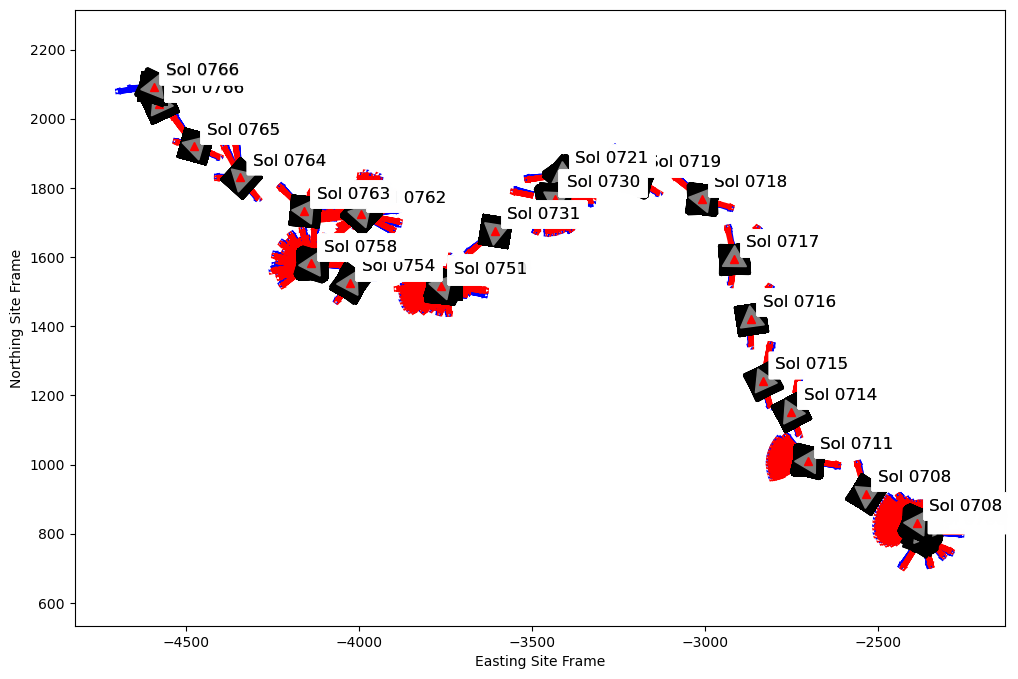

In [13]:
%%time

%run MPPP.py

image_list_process( IMG_paths, directory_output, suf )

In [7]:
def xyz_shift_offsets( site, drive ):
    
    '''
    xyz_shift_offsets finds most accurate Site-Nav offset for each site index and drive
    
    '''

    # print( site, drive )

    parent_path  = os.path.split( os.getcwd() )[0]
    waypoint_shift_path = os.path.join( parent_path, 'params/Mars2020_waypoint_shifts.csv' )

    shift_params = np.loadtxt( waypoint_shift_path, delimiter=',', skiprows=1 )

    site_shifts  = shift_params[ np.where( shift_params[:,1]==site)[0] ]
    site_drives  = site_shifts[:,2]

    if drive in site_drives:
        drive_site_shift = site_shifts[ np.where( site_shifts[:,2]==drive)[0] ][0,:]

    elif drive > site_drives.min() and drive < site_drives.max():
        drive_site_shift = interp1d( site_shifts[:,2], site_shifts, axis=0)(drive)

    elif drive >= site_drives.max():
        drive_site_shift = site_shifts[-1,:]

    else:
        drive_site_shift = np.zeros(12)

    # print( drive_site_shift )
    x_shift, y_shift, z_shift = drive_site_shift[9:]

    # x_shift, y_shift, z_shift = [ 0,0,0 ]
 
    return x_shift, y_shift, z_shift

# def xyz_shift_offsets_add( site, drive ):

In [8]:
import urllib.request, json 
waypoints_url = "https://mars.nasa.gov/mmgis-maps/M20/Layers/json/M20_waypoints.json"

with urllib.request.urlopen( waypoints_url ) as url:
    data = json.loads(url.read().decode())

In [9]:
site  = 34
drive = 0



site3_E = data['features'][0]['properties']['easting']
site3_N = data['features'][0]['properties']['northing']
site3_A = data['features'][0]['properties']['elev_geoid']


    
indexes = [] 
lines   = []

for i in range(len(data['features'])):
    
    site_i = data['features'][i]['properties']['site']
    
    if site_i == site:
        
        sol_i   =  data['features'][i]['properties']['sol']
        drive_i =  data['features'][i]['properties']['drive']
        E_i = np.float64(data['features'][i]['properties']['easting'])   - np.float64(site3_E)
        N_i = np.float64(data['features'][i]['properties']['northing'])  - np.float64(site3_N)
        A_i = np.float64(data['features'][i]['properties']['elev_geoid'])- np.float64(site3_A)
        
        line_i  =   '{}\t{}\t{}\t'.format(sol_i,site_i,drive_i)+\
                    '{:.3f}\t{:.3f}\t{:.3f}\t'.format(0,0,0)+\
                    '{:.3f}\t{:.3f}\t{:.3f}\t'.format( E_i, N_i, A_i )
           
        indexes.append( i )
        lines.append( line_i )
        
lines

['715\t34\t0\t0.000\t0.000\t0.000\t-2867.720\t1421.358\t82.962\t',
 '716\t34\t952\t0.000\t0.000\t0.000\t-2913.638\t1591.495\t86.760\t',
 '717\t34\t2098\t0.000\t0.000\t0.000\t-3005.175\t1762.912\t91.759\t',
 '718\t34\t3196\t0.000\t0.000\t0.000\t-3192.771\t1822.324\t94.970\t',
 '719\t34\t4394\t0.000\t0.000\t0.000\t-3402.497\t1838.044\t106.989\t',
 '721\t34\t5120\t0.000\t0.000\t0.000\t-3433.487\t1767.285\t110.875\t']

In [10]:
lines   = []

for i in range(len(data['features'])):
    
    sol_i   =  data['features'][i]['properties']['sol']
    site_i = data['features'][i]['properties']['site']
    drive_i =  data['features'][i]['properties']['drive']
    
    if drive_i == 0:
        
        E_i = np.float64(data['features'][i]['properties']['easting'])   - np.float64(site3_E)
        N_i = np.float64(data['features'][i]['properties']['northing'])  - np.float64(site3_N)
        A_i = np.float64(data['features'][i]['properties']['elev_geoid'])- np.float64(site3_A)
        
#         line_i  =  '{}\t{}\t{}\t'.format(sol_i,site_i,drive_i)+\
#                     '{:.3f}\t{:.3f}\t{:.3f}\t'.format(0,0,0)+\
#                     '{:.3f}\t{:.3f}\t{:.3f}\t\n'.format( E_i, N_i, A_i )
        line_i  =  [ int(sol_i), int(site_i), int(drive_i), 0, 0, 0, '{:.3f}'.format(E_i), '{:.3f}'.format(N_i),  '{:.3f}'.format(A_i) ]
        print( line_i )
        lines.append( line_i )


[13, 3, 0, 0, 0, 0, '0.000', '0.000', '0.000']
[84, 4, 0, 0, 0, 0, '78.194', '-24.177', '0.610']
[130, 5, 0, 0, 0, 0, '47.200', '-525.883', '-0.724']
[157, 6, 0, 0, 0, 0, '42.959', '-1003.669', '-15.012']
[180, 7, 0, 0, 0, 0, '-366.571', '-823.192', '-4.614']
[248, 8, 0, 0, 0, 0, '-442.276', '-632.051', '0.756']
[286, 9, 0, 0, 0, 0, '-534.830', '-709.314', '-4.528']
[359, 10, 0, 0, 0, 0, '56.611', '-233.380', '0.191']
[361, 11, 0, 0, 0, 0, '87.262', '-43.457', '1.188']
[381, 12, 0, 0, 0, 0, '193.350', '258.971', '0.154']
[382, 13, 0, 0, 0, 0, '452.860', '389.596', '-1.292']
[385, 14, 0, 0, 0, 0, '621.342', '750.545', '1.089']
[387, 15, 0, 0, 0, 0, '601.229', '1176.533', '2.169']
[389, 16, 0, 0, 0, 0, '199.910', '1403.036', '6.720']
[394, 17, 0, 0, 0, 0, '71.503', '1397.758', '7.793']
[396, 18, 0, 0, 0, 0, '-277.375', '1348.107', '12.167']
[399, 19, 0, 0, 0, 0, '-664.104', '1151.764', '12.919']
[402, 20, 0, 0, 0, 0, '-1174.414', '947.725', '17.851']
[405, 21, 0, 0, 0, 0, '-1636.261', '7

## Ignore the notes below

In [11]:
# '''
# df_refs : pandas dataframe that holds reference info for each image

# data saves in the output directory as a CSV file 'df'+output+'.csv' and as a python pickle 'df'+output+'.pkl'

# '''

# df_refs = pd.DataFrame( 
#     columns = [ 
#         'sol',           # sol number or Mars day since landing is a natural way to describe images.
#         'site',          # site index for the rover's location, site 3 is the landing site
#         'drive',         # drive index is where the rover is relative to the current site frame
#         'time',          # datetime of image capture
        
#         'xyz_enu',       # postition XYZ values in meters ENU = [xEast, yNorth, zUp ] from site 3 (note: as Metashape interprets XYZ)
#         'xyz_ned',       # postition XYZ values in meters NED = [xNorth, yEast, zDown] from site 3
#         'rot_rpy',       # rotation angles in RPY = [roll, pitch, yaw] in degrees (as Metashape interprets roll-pitch-yaw)
#         'rot_ypr',       # rotation angles in YPR = [yaw, pitch, roll] in degrees 
#         'rot_opk',       # rotation angles in OPK = [omega, phi, kappa] in degrees 
        
#         'site_wy',       # waypoint site index, same as the current site if 'site_wy' == 'site' 
#         'drive_wp',      # waypoint drive index, same as the current drive if 'drive_wy' == 'drive'      
#         'xyz_wp',        # waypoint postition XYZ values in meters NED = [xNorthing, yEasting, zElevation]
#         'xyz_site3'      # postition of site3 (OEB landing site) in meters NED = [xNorth, yEast, zDown], 'xyz_site3'=[0,0,0] if site3 is the default reference frame
#         'nee_site3'      # postition of site3 (OEB landing site) in meters NED = [xNorthing, yEasting, zElevation]
#         'lle_site3'      # postition in [longitude, latitude, elevation] Mars global coordinates        
       
#         'cahvor',        # the CAHVOR or CAHVORE camera model in rover frame [xFront, yRight, zDown]
#         'az_site',       # site-frame azimuth pointing in degrees clockwise from the North vector 
#         'el_site',       # site-frame elevation pointing in degrees positive from the horizone
#         'az_rover',      # rover-frame azimuth pointing in degrees clockwise from the rover's forward vector
#         'el_rover',      # rover-frame elevation pointing in degrees positive from the forward-right plane       
        
#         'ref',           # string that forms the image's line in the reference file for import to software (Metashape)
#         'filename',      # file name with .IMG extension
#         'filepath',      # complete file path to image at run time
# ])


# df_refs

In [12]:
# ignore the below cells

In [13]:
# For find_offset_mode = 1

# # pos_lines  = []
# # rover_xyzs = []
# # im_xyzs    = []
# # sols       = []
# # rmcs = []
sites  = [ rmcs[i][0] for i in range(len(rmcs))[::-1] ]
drives = [ rmcs[i][1] for i in range(len(rmcs))[::-1] ]
Xs     = [ rover_xyzs[i][0] for i in range(len(rover_xyzs))[::-1] ]
Ys     = [ rover_xyzs[i][1] for i in range(len(rover_xyzs))[::-1] ]
Zs     = [ rover_xyzs[i][2] for i in range(len(rover_xyzs))[::-1] ]

table = np.stack( [sols[::-1], sites, drives, Xs, Ys, Zs], axis=1)
np.round( table, 4 )

np.savetxt( directory_output+"/offsets.csv", table, delimiter="\t")

In [14]:
# Scam flatfield

path = 'C:/Users/cornell/Mastcam-Z/ws/seitah'
pre = 'L*_0510*'

RAD_paths = [] \
          + sorted( glob.glob(  path + '/' +pre+'*R*_N*.IMG' ) ) \

RAD_paths

ims = []
for i in range(len(RAD_paths))[:]:
    
    im_image = PDS3Image.open( RAD_paths[i] ).image
    ims.append( np.float64( im_image) )
    
flat = np.mean( ims, axis=0)
for i in range(3):
    flat[:,:,i] /= np.mean( flat[700:-700,700:-700,i] )
    
plt.imshow( flat/1.5 )

C:\Users\cdt59\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cdt59\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


IndexError: invalid index to scalar variable.

In [ ]:
x = np.arange(0, 2048)
y = np.arange(0, 2048)
xv, yv = np.meshgrid(x, y)

y0, x0, r0, p = [900,1000,1000,3]
dv = ( (xv-x0)**2 + (yv-y0)**2 )**(p/2)
dv /= (r0**p)*2
dv += 1

# lim = .8
# dv[ dv<lim]  =lim

dflat = flat.copy()
for i in range(3):
    dflat[:,:,i] *= dv
    
plt.imshow( dflat/2 )
plt.colorbar()

In [ ]:
dvl = np.mean( dflat[:,1000:1300], axis=1)
plt.plot(dvl)

dvl = np.mean( flat[:,1000:1300], axis=1)
plt.plot(dvl)
# flat = dflat.copy()

In [ ]:
import urllib.request, json 

'''

https://mars.nasa.gov/mmgis-maps/M20/Layers/json/M20_waypoints.json

https://docs.google.com/spreadsheets/d/1GSNJL-e5iROCaKUC4BXL_OA8hWy8vUdfCN7levRNkZA/edit#gid=1232397498

''' 
# path =  'C:/Users/cornell/Downloads/M20_waypoints.json'
# with open( path ) as f:
#     data = json.load(f)

with urllib.request.urlopen("https://mars.nasa.gov/mmgis-maps/M20/Layers/json/M20_waypoints.json") as url:
    data = json.loads(url.read().decode())

    
site3_E = data['features'][0]['properties']['easting']
site3_N = data['features'][0]['properties']['northing']
site3_A = data['features'][0]['properties']['elev_geoid']


for i in range(len(data['features']))[::-1]:
    
    print( data['features'][i]['properties']['sol'],'\t',
           data['features'][i]['properties']['site'], '\t',
           data['features'][i]['properties']['drive'],'\t',
           ''+'\t',''+'\t',''+'\t',
           np.round( np.float64(data['features'][i]['properties']['easting'])- np.float64(site3_E), 3),'\t',
           np.round( np.float64(data['features'][i]['properties']['northing'])- np.float64(site3_N), 3),'\t',
           np.round( np.float64(data['features'][i]['properties']['elev_geoid'])- np.float64(site3_A), 3),'\t',
         )